## Preprocesado de data 

In [3976]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [3977]:
df=X.copy()

In [3978]:
df=pd.read_csv("german_credit_data.txt", 
    sep=r"\s+",        # separador por espacios (uno o más)
    header=None,       # no hay encabezados
    na_values="?"      # convierte '?' en NaN
)

In [3979]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,checking_below_0,6.0,critical_account,radio_television,1169.0,no_savings_account,employed_above_7yr,4.0,male_single,none,...,foreign_worker_yes,good_client,payment_excellent,0.084,3.0,500.0,194.83,469.0,27.0,Female
1,checking_0_to_200,48.0,existing_paid_duly,radio_television,5951.0,savings_below_100,employed_1_to_4yr,2.0,female_divorced_married,none,...,foreign_worker_yes,bad_client,payment_fair,0.600,0.0,500.0,123.98,55.0,24.4,Male
2,no_checking_account,12.0,critical_account,education,2096.0,savings_below_100,employed_4_to_7yr,2.0,male_single,none,...,foreign_worker_yes,good_client,payment_excellent,0.099,3.0,500.0,174.67,269.5,27.6,Male
3,checking_below_0,42.0,existing_paid_duly,furniture_equipment,7882.0,savings_below_100,employed_4_to_7yr,2.0,male_single,guarantor,...,foreign_worker_yes,good_client,payment_fair,0.165,5.0,1050.0,187.67,247.5,NaN,Female
4,checking_below_0,24.0,delay_in_past,car_new,4870.0,savings_below_100,employed_1_to_4yr,3.0,male_single,none,...,foreign_worker_yes,bad_client,payment_excellent,0.463,1.0,500.0,202.92,132.5,24.1,Female


In [3980]:
column_names = [
    "status_account",              # ATRIBUTO 1
    "duration",                    # ATRIBUTO 2
    "credit_history",              # ATRIBUTO 3
    "purpose",                     # ATRIBUTO 4
    "credit_amount",               # ATRIBUTO 5
    "savings",                     # ATRIBUTO 6
    "employment_since",            # ATRIBUTO 7
    "installment_rate",            # ATRIBUTO 8
    "personal_status",             # ATRIBUTO 9
    "other_debtors",               # ATRIBUTO 10
    "residence_since",             # ATRIBUTO 11
    "property",                    # ATRIBUTO 12
    "age",                         # ATRIBUTO 13
    "other_installments",          # ATRIBUTO 14
    "housing",                     # ATRIBUTO 15
    "num_credits",                 # ATRIBUTO 16
    "job",                         # ATRIBUTO 17
    "num_liable",                  # ATRIBUTO 18
    "telephone",                   # ATRIBUTO 19
    "foreign_worker",              # ATRIBUTO 20
    "target",                      # ATRIBUTO 21 (variable objetivo)
    "payment_behavior",            # ATRIBUTO 22
    "debt_to_income_ratio",        # ATRIBUTO 23
    "num_previous_loans",          # ATRIBUTO 24
    "monthly_income",              # ATRIBUTO 25
    "credit_duration_ratio",       # ATRIBUTO 26
    "age_employment_interaction",  # ATRIBUTO 27
    "bmi",                         # ATRIBUTO 28
    "gender"                       # ATRIBUTO 29
]

In [3981]:
df.columns=column_names
df.tail()

,status_account,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,foreign_worker,target,payment_behavior,debt_to_income_ratio,num_previous_loans,monthly_income,credit_duration_ratio,age_employment_interaction,bmi,gender
1245,no_checking_account,35.0,existing_paid_duly,car_new,3094.0,no_savings_account,employed_1_to_4yr,4.0,male_single,none,...,foreign_worker_yes,good_client,payment_good,0.110,0.0,500.0,88.40,87.5,20.1,Male
1246,no_checking_account,35.0,critical_account,car_new,8271.0,NaN,employed_1_to_4yr,4.0,female_divorced_married,none,...,foreign_worker_yes,bad_client,payment_poor,0.567,NaN,1016.0,236.31,57.5,25.1,Female
1247,no_checking_account,12.0,critical_account,education,2993.0,savings_below_100,employed_above_7yr,2.0,female_divorced_married,none,...,foreign_worker_yes,good_client,payment_fair,0.166,8.0,500.0,249.42,385.0,21.9,Female
1248,checking_below_0,12.0,existing_paid_duly,car_used,NaN,savings_below_100,employed_above_7yr,3.0,male_single,none,...,foreign_worker_yes,bad_client,payment_poor,NaN,NaN,567.0,NaN,259.0,25.9,Female
1249,checking_0_to_200,33.0,delay_in_past,car_new,2321.0,savings_below_100,employed_above_7yr,4.0,male_single,none,...,foreign_worker_yes,bad_client,payment_fair,0.650,1.0,500.0,70.33,406.0,18.8,Male


In [3982]:
print(df.shape[1])

29


## 1. Exploración Inicial de la Estructura

### 1.1 Información General

In [3983]:
print("Informacion general del dataset")
print("=="*60)
print(f"Dimensiones generales del dataset,  {df.shape[0]} Filas X {df.shape[1]} Columnas")
print("\nTipo de datos:")
print(df.dtypes)
print("=="*60)
print("\ninformacion detallada de columnas")
print(df.info())


Informacion general del dataset
Dimensiones generales del dataset,  1250 Filas X 29 Columnas

Tipo de datos:
status_account                 object
duration                      float64
credit_history                 object
purpose                        object
credit_amount                 float64
savings                        object
employment_since               object
installment_rate              float64
personal_status                object
other_debtors                  object
residence_since                 int64
property                       object
age                           float64
other_installments             object
housing                        object
num_credits                     int64
job                            object
num_liable                      int64
telephone                      object
foreign_worker                 object
target                         object
payment_behavior               object
debt_to_income_ratio          float64
num_previous_loan

## 1. Exploración Inicial de la Estructura

### 1.2 Análisis descriptivo completo de todas las variables.

In [3984]:
# Identificar tipos de variables
numeric_cols=df.select_dtypes(include=['number']).columns.to_list()
categorical_cols=df.select_dtypes(include=["object"]).columns.to_list()

print("Clasificación de variables")
print("=="*60)
print(f"Cantidad de variables numéricas en el dataset es igual a {len(numeric_cols)}")
print(print(f"Cantidad de variables categóricas en el dataset es igual a {len(categorical_cols)}"))


Clasificación de variables
Cantidad de variables numéricas en el dataset es igual a 13
Cantidad de variables categóricas en el dataset es igual a 16
None


In [3985]:
print(numeric_cols)

['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'num_credits', 'num_liable', 'debt_to_income_ratio', 'num_previous_loans', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi']


In [3986]:
# Clasificar numéricas en continuas y discretas
discretas=["installment_rate", "num_previous_loans", "residence_since", "num_credits",  "num_liable"]
continuas=["duration","credit_amount", "debt_to_income_ratio", "monthly_income", "credit_duration_ratio", "age_employment_interaction", "bmi", "age"]
print("Clasificación de variables numéricas")
print("\nVariables Discretas")
print(f"En total tenemos ({len(discretas)}) variables discretas:")
print(f"{discretas}")
print("=="*60)
print("\nVariables Continuas")
print(f"En total tenemos ({len(continuas)}) variables continuas:")
print(f"{continuas}")

Clasificación de variables numéricas

Variables Discretas
En total tenemos (5) variables discretas:
['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']

Variables Continuas
En total tenemos (8) variables continuas:
['duration', 'credit_amount', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'age']


In [3987]:
print(categorical_cols)

['status_account', 'credit_history', 'purpose', 'savings', 'employment_since', 'personal_status', 'other_debtors', 'property', 'other_installments', 'housing', 'job', 'telephone', 'foreign_worker', 'target', 'payment_behavior', 'gender']


In [3988]:
# Clasificar categóricas en nominales y ordinales
nominales=["credit_history", "purpose","personal_status","property", "other_installments", "housing", "telephone", "foreign_worker", "target", "gender" ]
ordinales=["status_account","savings","employment_since","other_debtors", "job", "payment_behavior" ]

print("Clasificación de variables categoricas")
print("\nVariables categoricas Nominales")
print(f"En total tenemos ({len(nominales)}) variables nominales:")
print(f"{nominales}")
print("=="*60)
print("\nVariables ordinales")
print(f"En total tenemos ({len(ordinales)}) variables ordinales:")
print(f"{ordinales}")


Clasificación de variables categoricas

Variables categoricas Nominales
En total tenemos (10) variables nominales:
['credit_history', 'purpose', 'personal_status', 'property', 'other_installments', 'housing', 'telephone', 'foreign_worker', 'target', 'gender']

Variables ordinales
En total tenemos (6) variables ordinales:
['status_account', 'savings', 'employment_since', 'other_debtors', 'job', 'payment_behavior']


## 1. Exploración Inicial de la Estructura

### 1.3 estadistica descriptiva variables Numéricas.

In [3989]:
print('ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS')
print("=="*80)
df[numeric_cols].describe()
print("=="*80)
print(" Estadisticas adicionales:")
df_std=pd.DataFrame({"Minimo":df[numeric_cols].min(),
              "Media":df[numeric_cols].mean(),
              "Mediana":df[numeric_cols].median(),
              "Maximo":df[numeric_cols].max(),
              "desviacion estandar":df[numeric_cols].std(),
             "Moda":df[numeric_cols].mode().iloc[0],
             "Rango":df[numeric_cols].max()- df[numeric_cols].min(),
             'IQR': df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
             "CV": (df[numeric_cols].std()/df[numeric_cols].mean()*100).round(2)})
df_std.head(16)


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
 Estadisticas adicionales:


,Minimo,Media,Mediana,Maximo,desviacion estandar,Moda,Rango,IQR,CV
duration,1.000,21.147179,18.000,72.000,12.449883,24.00,71.000,13.00000,58.87
credit_amount,1.000,3301.497537,2307.000,19323.000,2890.797736,1169.00,19322.000,2627.00000,87.56
installment_rate,-1.710,2.996974,3.000,16.660,1.318080,4.00,18.370,2.00000,43.98
residence_since,1.000,2.835200,3.000,4.000,1.103909,4.00,3.000,2.00000,38.94
age,1.000,35.715807,33.000,304.000,14.485447,27.00,303.000,15.00000,40.56
num_credits,1.000,1.401600,1.000,4.000,0.570419,1.00,3.000,1.00000,40.70
num_liable,1.000,1.152000,1.000,2.000,0.359165,1.00,1.000,0.00000,31.18
debt_to_income_ratio,-0.466,0.268736,0.182,1.153,0.211077,0.06,1.619,0.37125,78.54
num_previous_loans,0.000,2.541495,2.000,9.000,1.726381,2.00,9.000,3.00000,67.93
monthly_income,-90.000,576.563115,500.000,1962.000,200.102308,500.00,2052.000,0.00000,34.71


In [3990]:
#Analizamos los valores de mayor a menor segun su COEFICIENTE DE VARIACION CV

df_cv_sorted=df_std.sort_values(by="CV", ascending=False)
df_cv_sorted

,Minimo,Media,Mediana,Maximo,desviacion estandar,Moda,Rango,IQR,CV
credit_duration_ratio,24.060,169.483992,130.120,3175.800,171.560431,84.67,3151.740,120.76500,101.23
credit_amount,1.000,3301.497537,2307.000,19323.000,2890.797736,1169.00,19322.000,2627.00000,87.56
age_employment_interaction,0.000,140.383200,100.000,518.000,114.192994,0.00,518.000,159.50000,81.34
debt_to_income_ratio,-0.466,0.268736,0.182,1.153,0.211077,0.06,1.619,0.37125,78.54
num_previous_loans,0.000,2.541495,2.000,9.000,1.726381,2.00,9.000,3.00000,67.93
duration,1.000,21.147179,18.000,72.000,12.449883,24.00,71.000,13.00000,58.87
installment_rate,-1.710,2.996974,3.000,16.660,1.318080,4.00,18.370,2.00000,43.98
num_credits,1.000,1.401600,1.000,4.000,0.570419,1.00,3.000,1.00000,40.70
age,1.000,35.715807,33.000,304.000,14.485447,27.00,303.000,15.00000,40.56
residence_since,1.000,2.835200,3.000,4.000,1.103909,4.00,3.000,2.00000,38.94


In [3991]:
counts=df['credit_history'].value_counts()
percentages=df['credit_history'].value_counts(normalize=True)*100
results=pd.DataFrame({"frecuencia":counts, "porcentaje":percentages})
results

,frecuencia,porcentaje
credit_history,,
existing_paid_duly,666,53.28
critical_account,367,29.36
delay_in_past,111,8.88
all_paid_this_bank,58,4.64
no_credits_all_paid,48,3.84


In [3992]:
print('ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS')
print('='*80)

for col in categorical_cols: 
    print(f"\n{col.upper()}")
    print("-"*80)
    counts=df[col].value_counts(dropna=False)
    percentages=df[col].value_counts(normalize=True, dropna=False)*100
    results=pd.DataFrame({"Frecuencia": counts, "Porcentaje":percentages})
    print(results)
    print(f"\nNúmero de categorías únicas: {df[col].nunique(dropna=False)}")
    print(f'Moda: {df[col].mode()[0]}')



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

STATUS_ACCOUNT
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
status_account                             
no_checking_account         493       39.44
checking_below_0            342       27.36
checking_0_to_200           339       27.12
checking_above_200           76        6.08

Número de categorías únicas: 4
Moda: no_checking_account

CREDIT_HISTORY
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
credit_history                             
existing_paid_duly          666       53.28
critical_account            367       29.36
delay_in_past               111        8.88
all_paid_this_bank           58        4.64
no_credits_all_paid          48        3.84

Número de categorías únicas: 5
Moda: existing_paid_duly

PURPOSE
------------------------------------------------------------

## 1. Análisis & Visualizaciión de Distribucines

### 1.4 Medidas de Forma

In [3993]:
# Analisis de Asimetría y Curtosis 

asimetria=df[numeric_cols].skew()

print(type(asimetria))
print(asimetria.shape)
print(asimetria)

<class 'pandas.core.series.Series'>
(13,)
duration                      1.057904
credit_amount                 1.925687
installment_rate              1.648830
residence_since              -0.257466
age                           6.132432
num_credits                   1.233160
num_liable                    1.940936
debt_to_income_ratio          0.754147
num_previous_loans            0.705428
monthly_income                2.982823
credit_duration_ratio         9.126657
age_employment_interaction    0.894230
bmi                           0.169586
dtype: float64


In [3994]:
#Hacemos un solo dataframe consolidando ambas series temporales de pandas skew() & kurtosis()
Curtosis=df[numeric_cols].kurtosis()
Asimetria=df[numeric_cols].skew()
lista=[]

result=pd.DataFrame({"Asimetria":Asimetria, "Curtosis":Curtosis})
print("\ninterpretación")
for col in numeric_cols:
    skew=df[col].skew()
    kurt=df[col].kurtosis().round(2)
    

    if abs(skew)<0.5:
        #print(f"La distribución de {col} es simétrica")
        Class_skew="Simetrica"
    elif skew>0:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores grandes (derecha) lo que desplaza la media hacia la derecha media> mediana")
        Class_skew="Asimetrica +"
    else:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores bajos (izquierda) lo que desplaza la media hacia la izquierda media< mediana")
        Class_skew="Asimetrica -"

    if abs(kurt)<0.5:
        #'Mesocúrtica (normal)'
        Class_Curtosis="Normal"
    elif kurt>0: 
        Class_Curtosis="Puntiaguda"
    else:
        Class_Curtosis="Aplanada"

    propiedades={
    "Atributo":col,
    "Valor skew":skew,
    "Clasificacion skew":Class_skew,
    "Valor Curtosis":kurt,
    "Clasificacion Curtosis":Class_Curtosis
    }
    lista.append(propiedades)

resultado=pd.DataFrame(lista)
resultado





interpretación


,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada
4,age,6.132432,Asimetrica +,98.74,Puntiaguda
5,num_credits,1.233160,Asimetrica +,1.37,Puntiaguda
6,num_liable,1.940936,Asimetrica +,1.77,Puntiaguda
7,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal
8,num_previous_loans,0.705428,Asimetrica +,0.34,Normal
9,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda


In [3995]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   status_account              1250 non-null   object 
 1   duration                    1223 non-null   float64
 2   credit_history              1250 non-null   object 
 3   purpose                     1250 non-null   object 
 4   credit_amount               1218 non-null   float64
 5   savings                     1207 non-null   object 
 6   employment_since            1250 non-null   object 
 7   installment_rate            1216 non-null   float64
 8   personal_status             1250 non-null   object 
 9   other_debtors               1250 non-null   object 
 10  residence_since             1250 non-null   int64  
 11  property                    1216 non-null   object 
 12  age                         1221 non-null   float64
 13  other_installments          1250 

In [3996]:
#Por medio de df.info podemos verificar que terminos generales la estructura de nuestro dataset como se puede ver el dataset consta de 1250 filas con 29 columnas
#Existen varias columnas que muestran valores faltentes como la columna de edad, por otro lado podemos confirmar que el dataset importado 
#consta de 13 columnas numericas 10 tipo floatt64 y 3 tipo int64. En total hay 16 de tipo objeto estas son las columnas de clasificación del dataset.

In [3997]:
#Identificamos las distribucion de las variables numericas 

numeric_cols=df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['duration', 'credit_amount', 'installment_rate', 'residence_since',
       'age', 'num_credits', 'num_liable', 'debt_to_income_ratio',
       'num_previous_loans', 'monthly_income', 'credit_duration_ratio',
       'age_employment_interaction', 'bmi'],
      dtype='object')

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>,
        <Axes: title={'center': 'installment_rate'}>,
        <Axes: title={'center': 'residence_since'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'num_credits'}>,
        <Axes: title={'center': 'num_liable'}>,
        <Axes: title={'center': 'debt_to_income_ratio'}>],
       [<Axes: title={'center': 'num_previous_loans'}>,
        <Axes: title={'center': 'monthly_income'}>,
        <Axes: title={'center': 'credit_duration_ratio'}>,
        <Axes: title={'center': 'age_employment_interaction'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

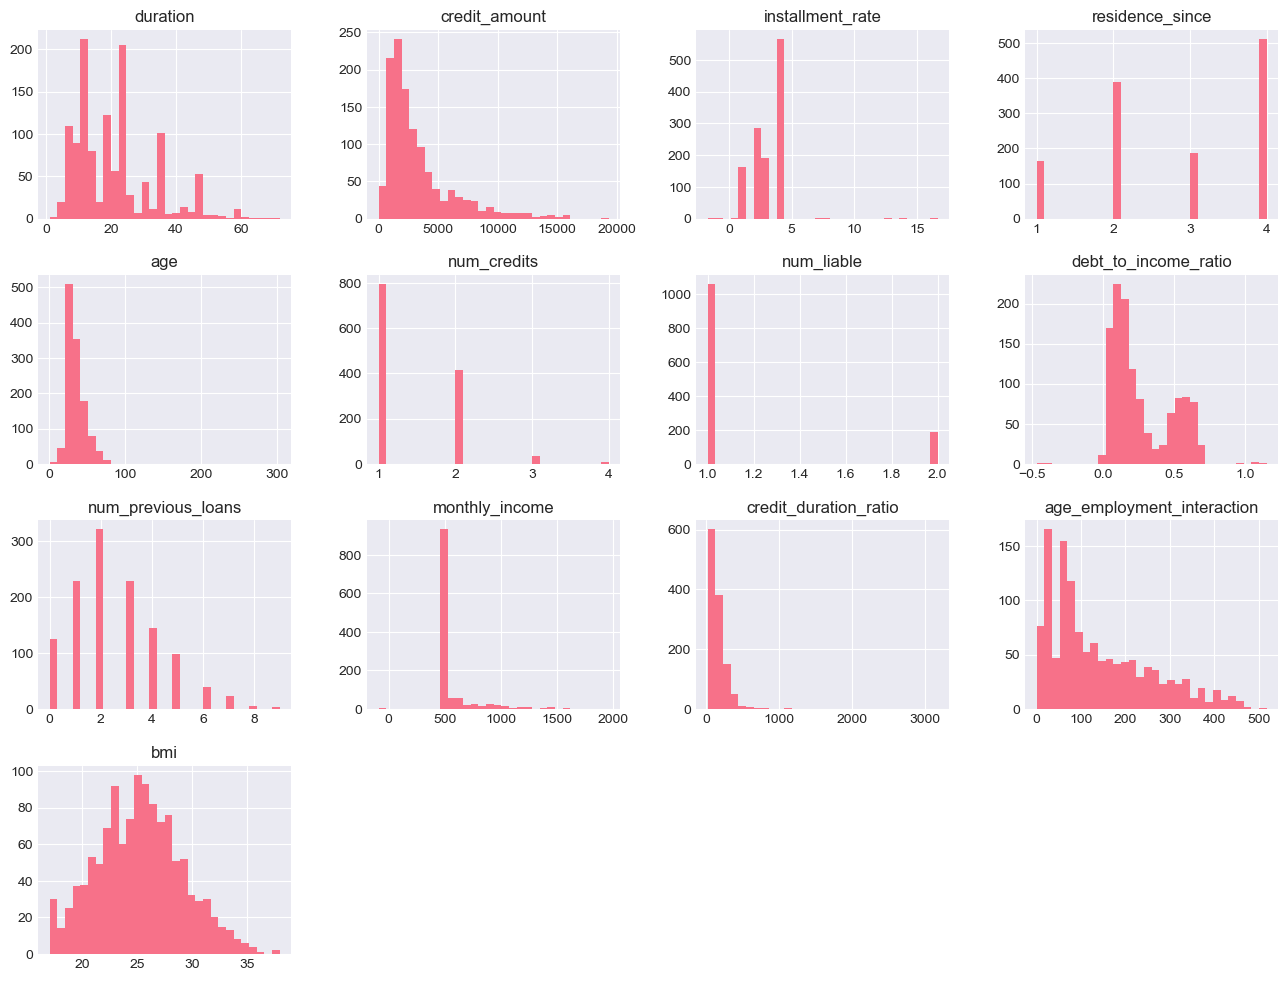

In [3998]:
df[numeric_cols].hist(figsize=(16,12), bins=30)

In [3999]:
categorical_cols=df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['status_account', 'credit_history', 'purpose', 'savings',
       'employment_since', 'personal_status', 'other_debtors', 'property',
       'other_installments', 'housing', 'job', 'telephone', 'foreign_worker',
       'target', 'payment_behavior', 'gender'],
      dtype='object')

In [4000]:
import matplotlib.pyplot as plt

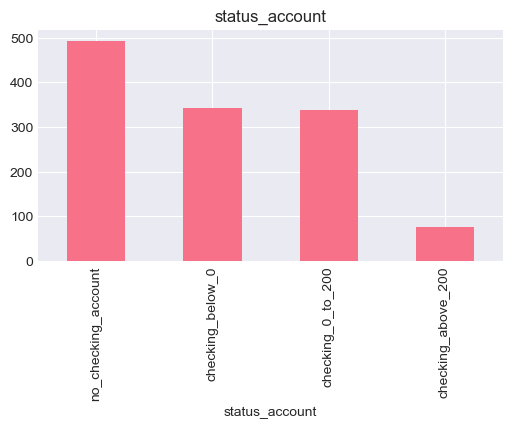

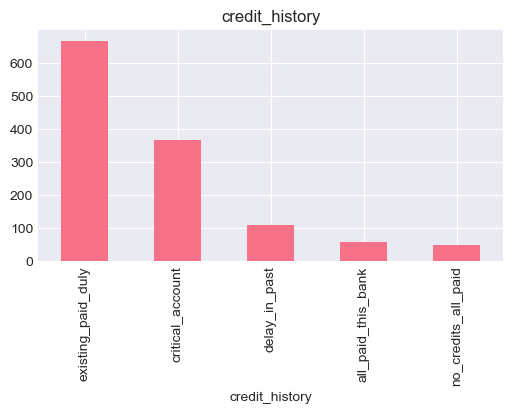

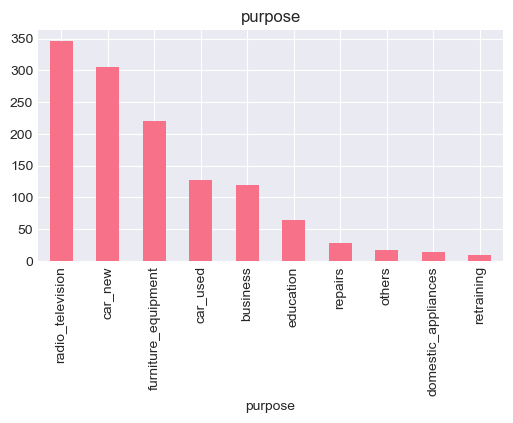

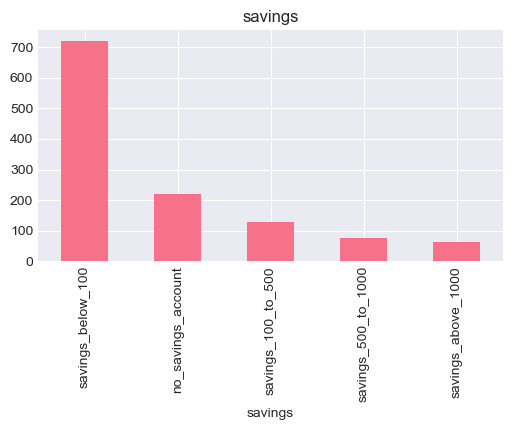

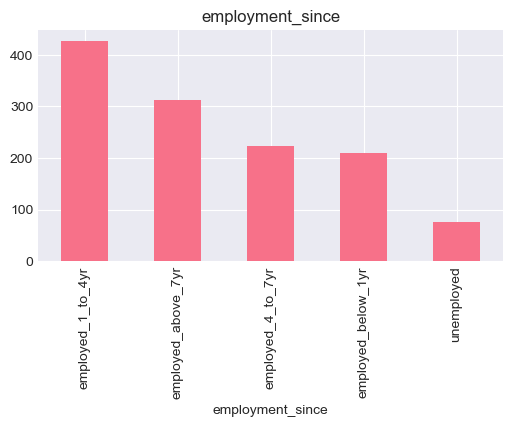

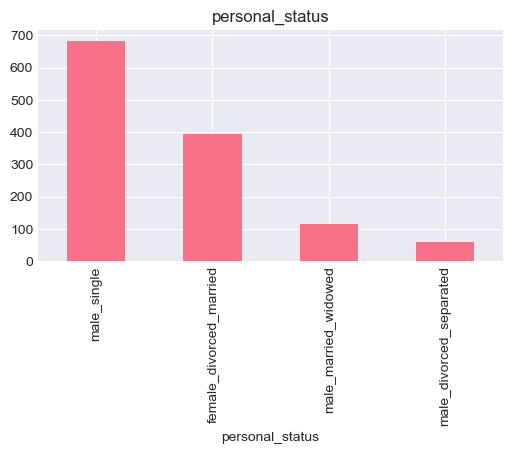

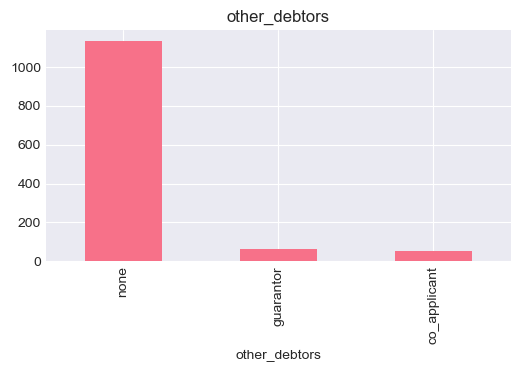

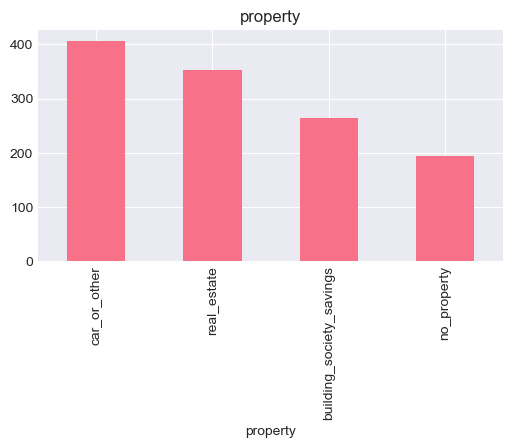

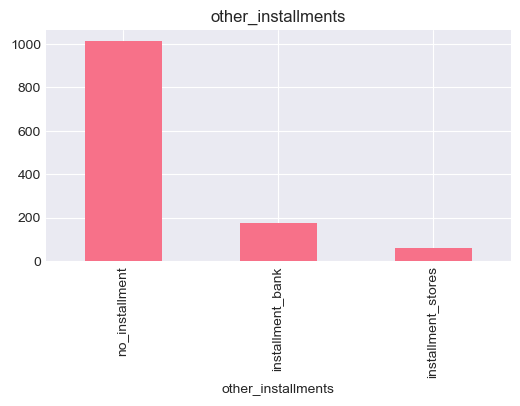

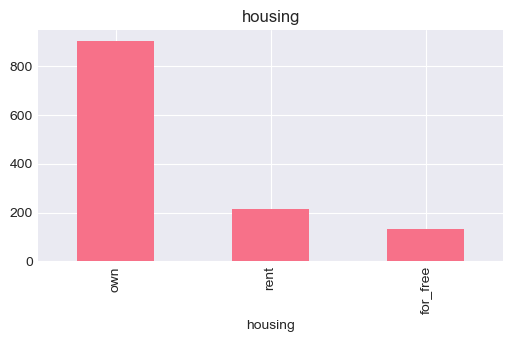

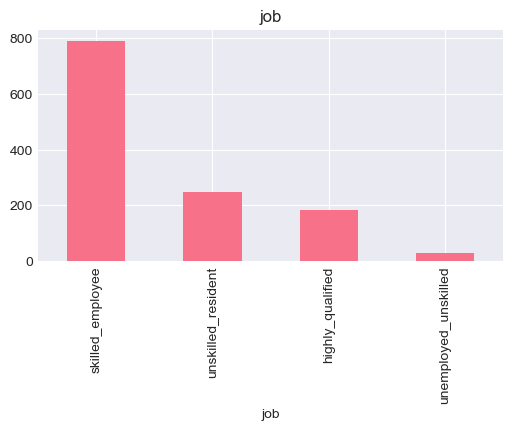

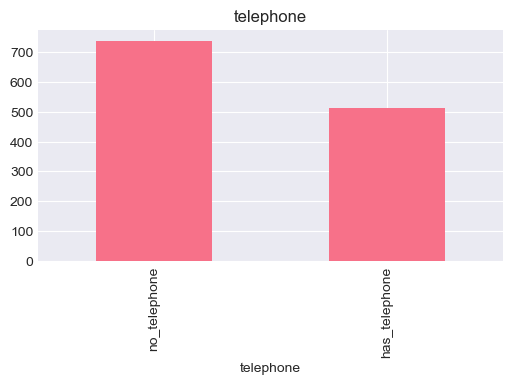

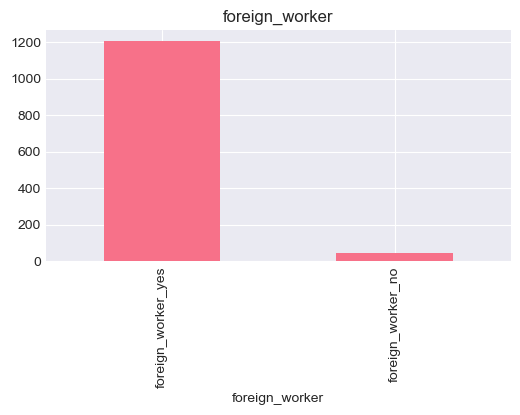

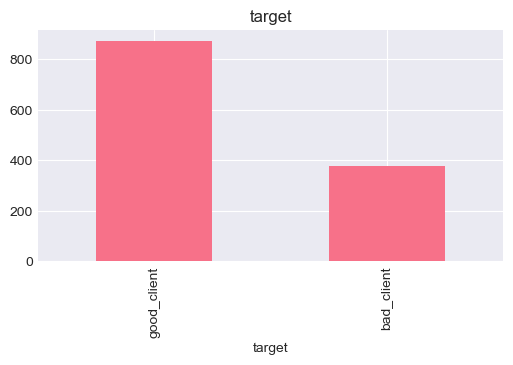

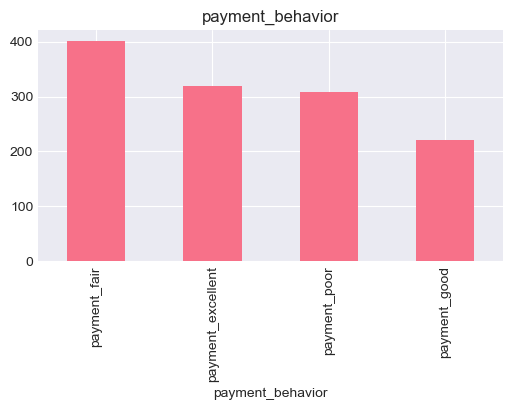

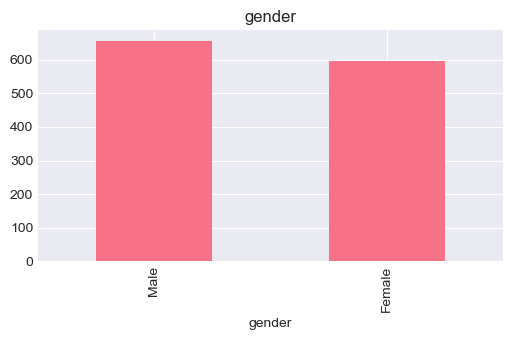

In [4001]:
for col in categorical_cols: 
    df[col].value_counts().plot(kind="bar", figsize=(6,3))
    plt.title(col)
    plt.show()

In [4002]:
# Generamos un analisis exploratorio de correlacion de variables 
import seaborn as sns

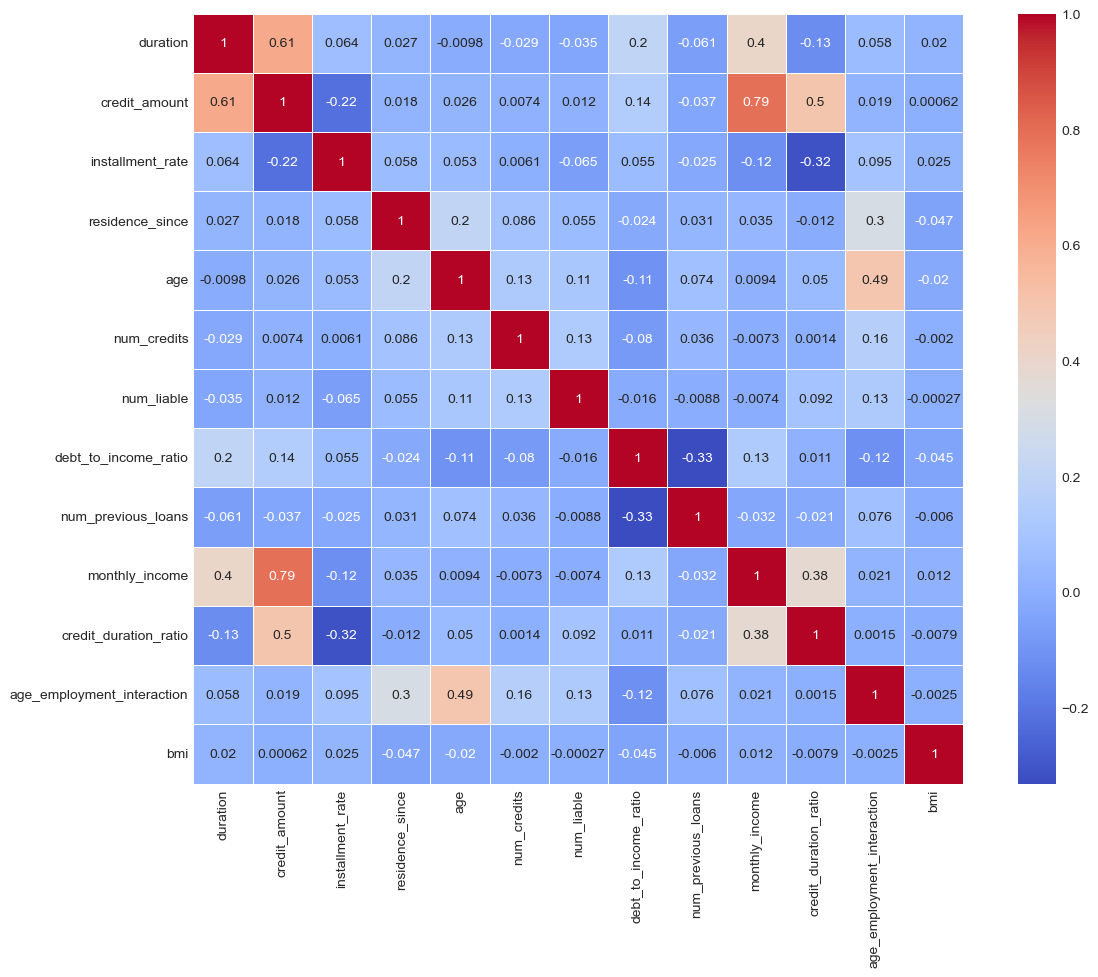

In [4003]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include="number").corr(),
            fmt='.2g',
            annot=True,
            cmap="coolwarm",
            linewidth=.5,
            square=True)
plt.show()

In [4004]:
#Como siguiente punto evaluamos/analizamos la cantidad de datos faltantes en nuestro dataset 
# Identifica,ps de manera global la cantidad de datos faltantes

df.isnull().sum()



status_account                 0
duration                      27
credit_history                 0
purpose                        0
credit_amount                 32
savings                       43
employment_since               0
installment_rate              34
personal_status                0
other_debtors                  0
residence_since                0
property                      34
age                           29
other_installments             0
housing                        0
num_credits                    0
job                            0
num_liable                     0
telephone                      0
foreign_worker                 0
target                         0
payment_behavior               0
debt_to_income_ratio          26
num_previous_loans            33
monthly_income                30
credit_duration_ratio         35
age_employment_interaction     0
bmi                           25
gender                         0
dtype: int64

In [4005]:
#Generamos una matriz general

missing_stats=pd.DataFrame({"faltantes":df.isnull().sum(), 
                            "porcentaje":((df.isnull().sum()/len(df))*100).round(2)})
missing_stats=missing_stats[missing_stats["faltantes"]>0].sort_values(by="faltantes", ascending=False)

print ("Analisis general de cantidad de valores faltantes por columna")
print("--"*80)
print(f"\nEn total hemos identificado una cantidad de ({len(missing_stats)}) columnas con datos faltantes como muestra la siguiente tabla:")
print(f"\n{missing_stats}")
print(f"\n El atributo con mayor cantidad da valores faltantes es ({missing_stats.index[0]}) con ({missing_stats.iloc[0, 0]}) equivalente a un ({missing_stats.loc["savings", "porcentaje"]}%)")

Analisis general de cantidad de valores faltantes por columna
----------------------------------------------------------------------------------------------------------------------------------------------------------------

En total hemos identificado una cantidad de (11) columnas con datos faltantes como muestra la siguiente tabla:

                       faltantes  porcentaje
savings                       43        3.44
credit_duration_ratio         35        2.80
installment_rate              34        2.72
property                      34        2.72
num_previous_loans            33        2.64
credit_amount                 32        2.56
monthly_income                30        2.40
age                           29        2.32
duration                      27        2.16
debt_to_income_ratio          26        2.08
bmi                           25        2.00

 El atributo con mayor cantidad da valores faltantes es (savings) con (43) equivalente a un (3.44%)


### Visualización con librería `missingno`

https://github.com/ResidentMario/missingno


Text(0.5, 1.0, 'Valores faltantes por columna')

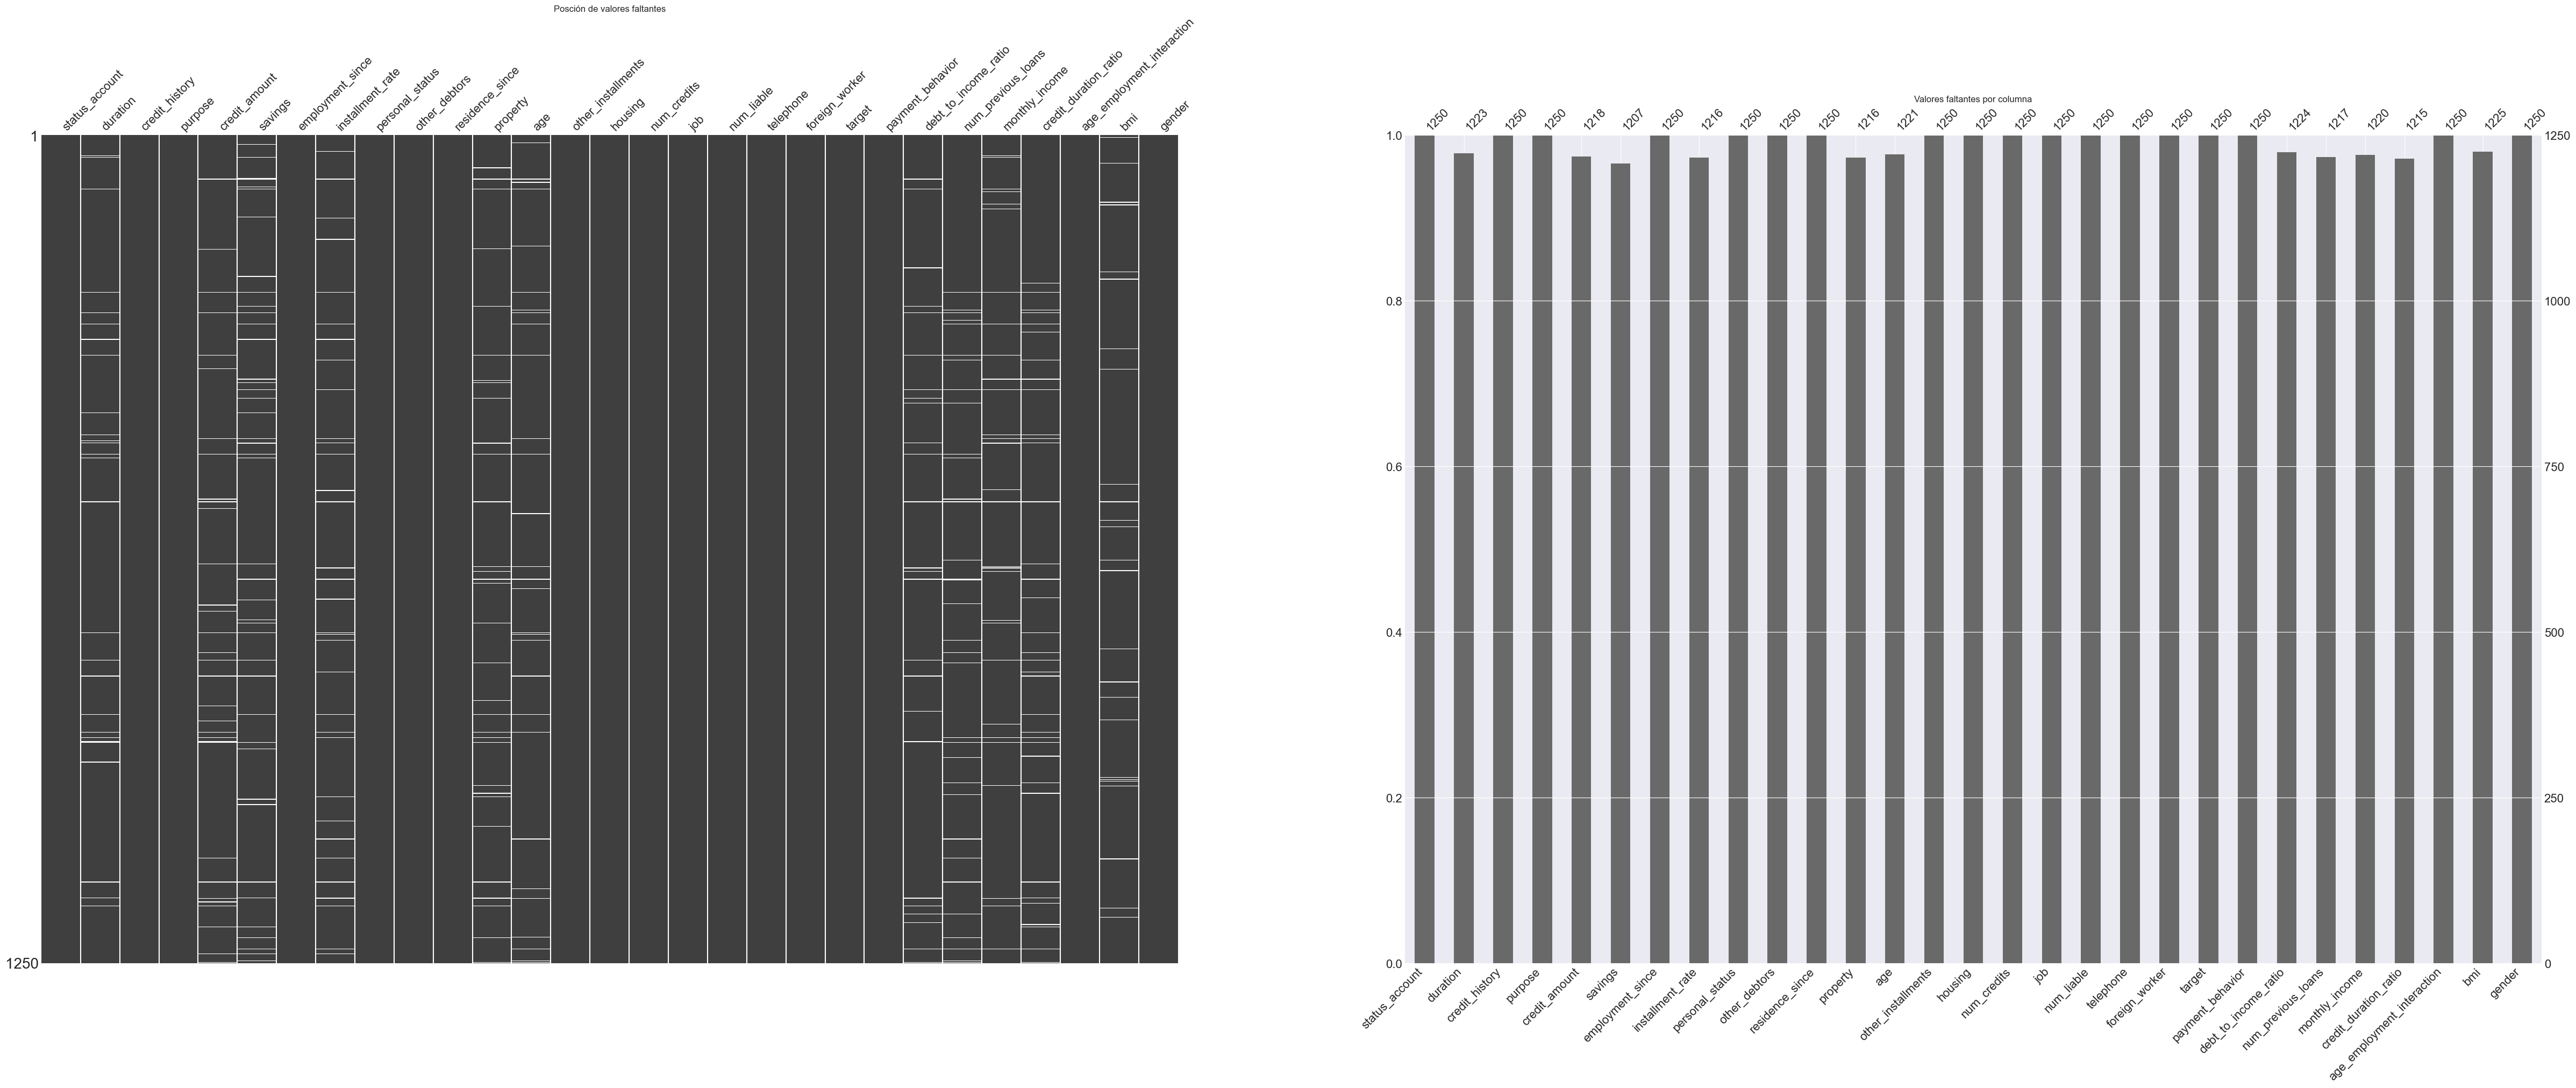

In [4006]:
#Procedemos a explorar estos valores faltantes de una manera mas visual para eso mportamos la libería de missingno
import missingno as msno

fig, axes=plt.subplots(1,2, figsize=(60,20))

plt.subplot(1,2,1)
msno.matrix(df, ax=plt.gca())
plt.title("Posción de valores faltantes")


plt.subplot(1,2,2)
msno.bar(df, ax=plt.gca())
plt.title("Valores faltantes por columna")

# plt.subplot(1,3,3)
# msno.heatmap(df, ax=plt.gca())
# plt.title("Correlación entre valores faltantes")

# # plt.subplot(2,2,4)
# missing_stats.plot(kind="barh", color="orange")
# plt.title("Grafico de barrras para columnas con valores faltantes")

# plt.tight_layout()
# plt.show()



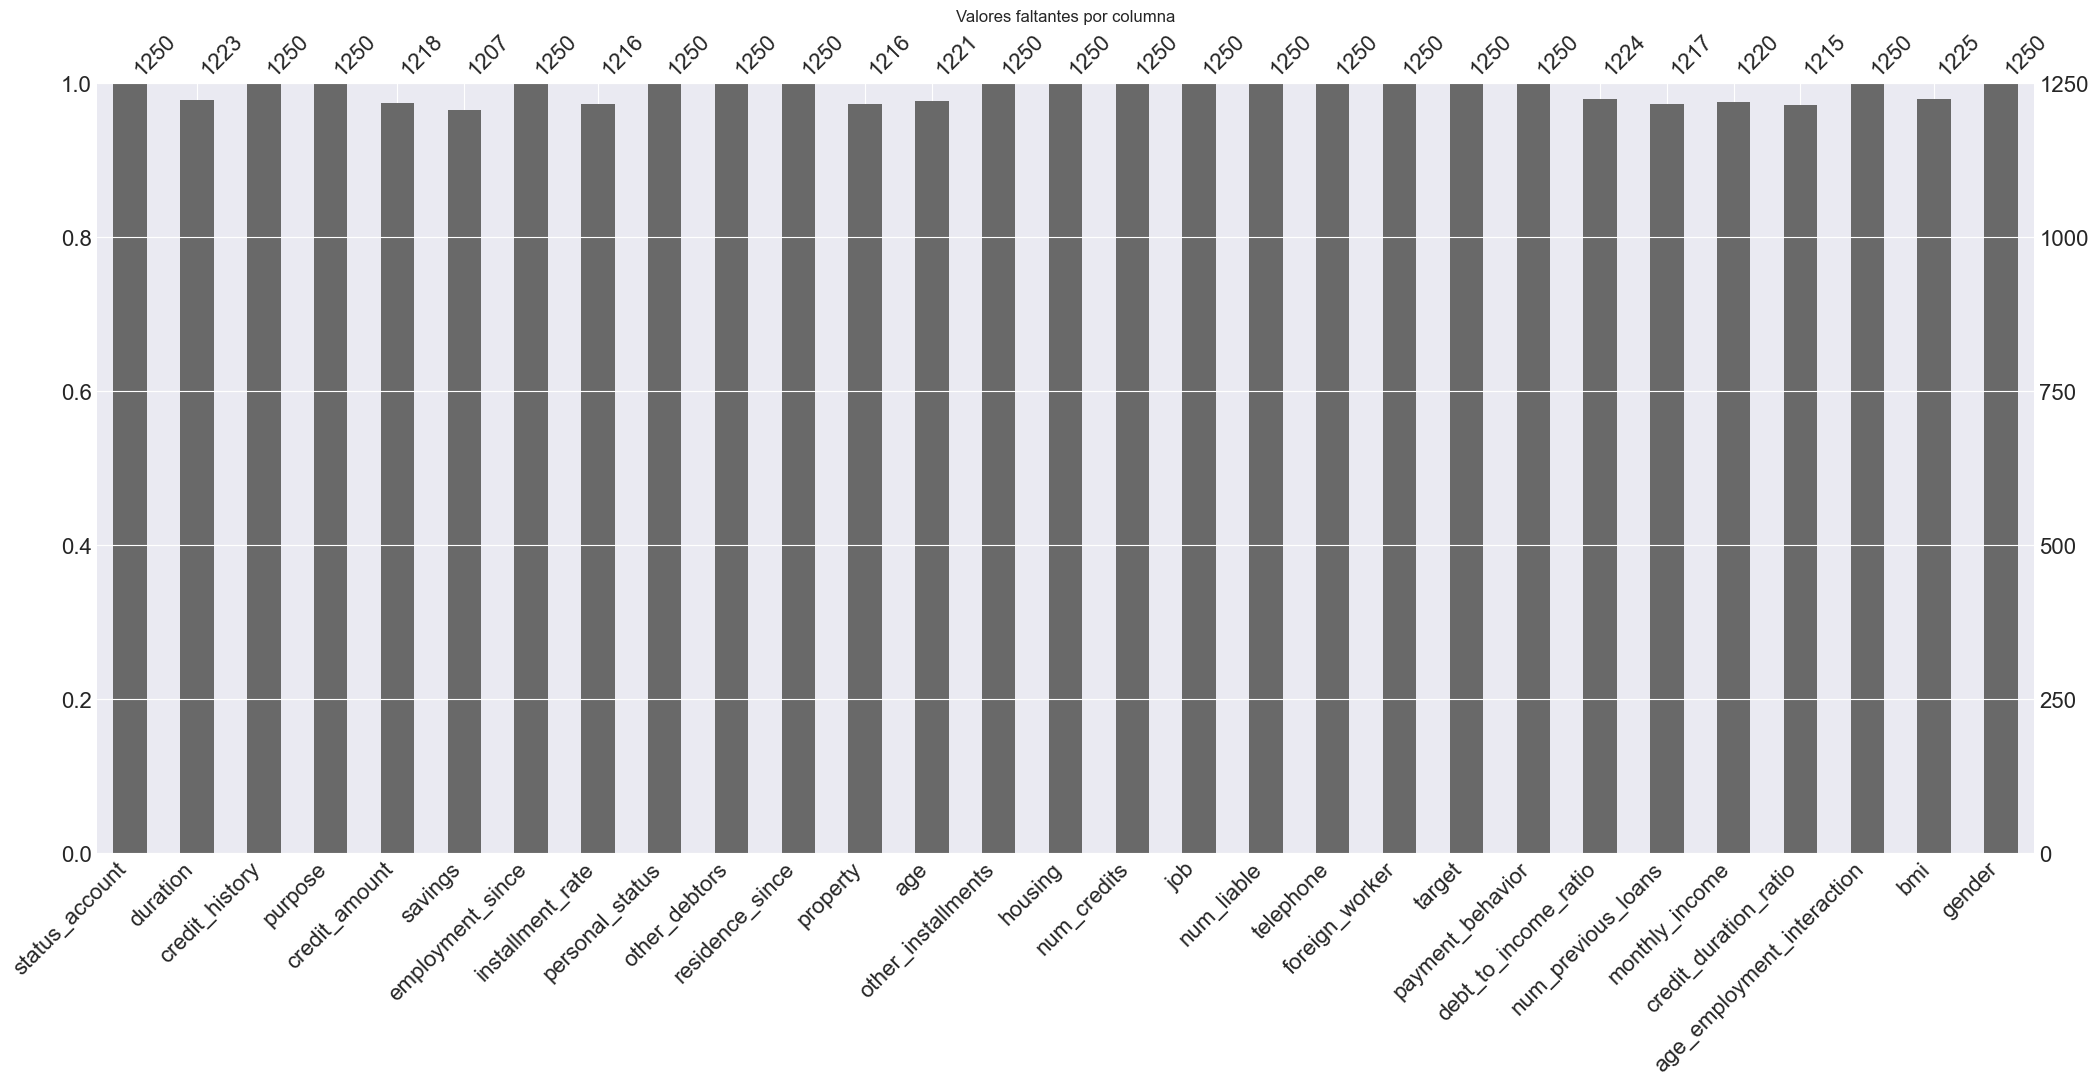

In [4007]:


msno.bar(df)
plt.title("Valores faltantes por columna")
plt.show()

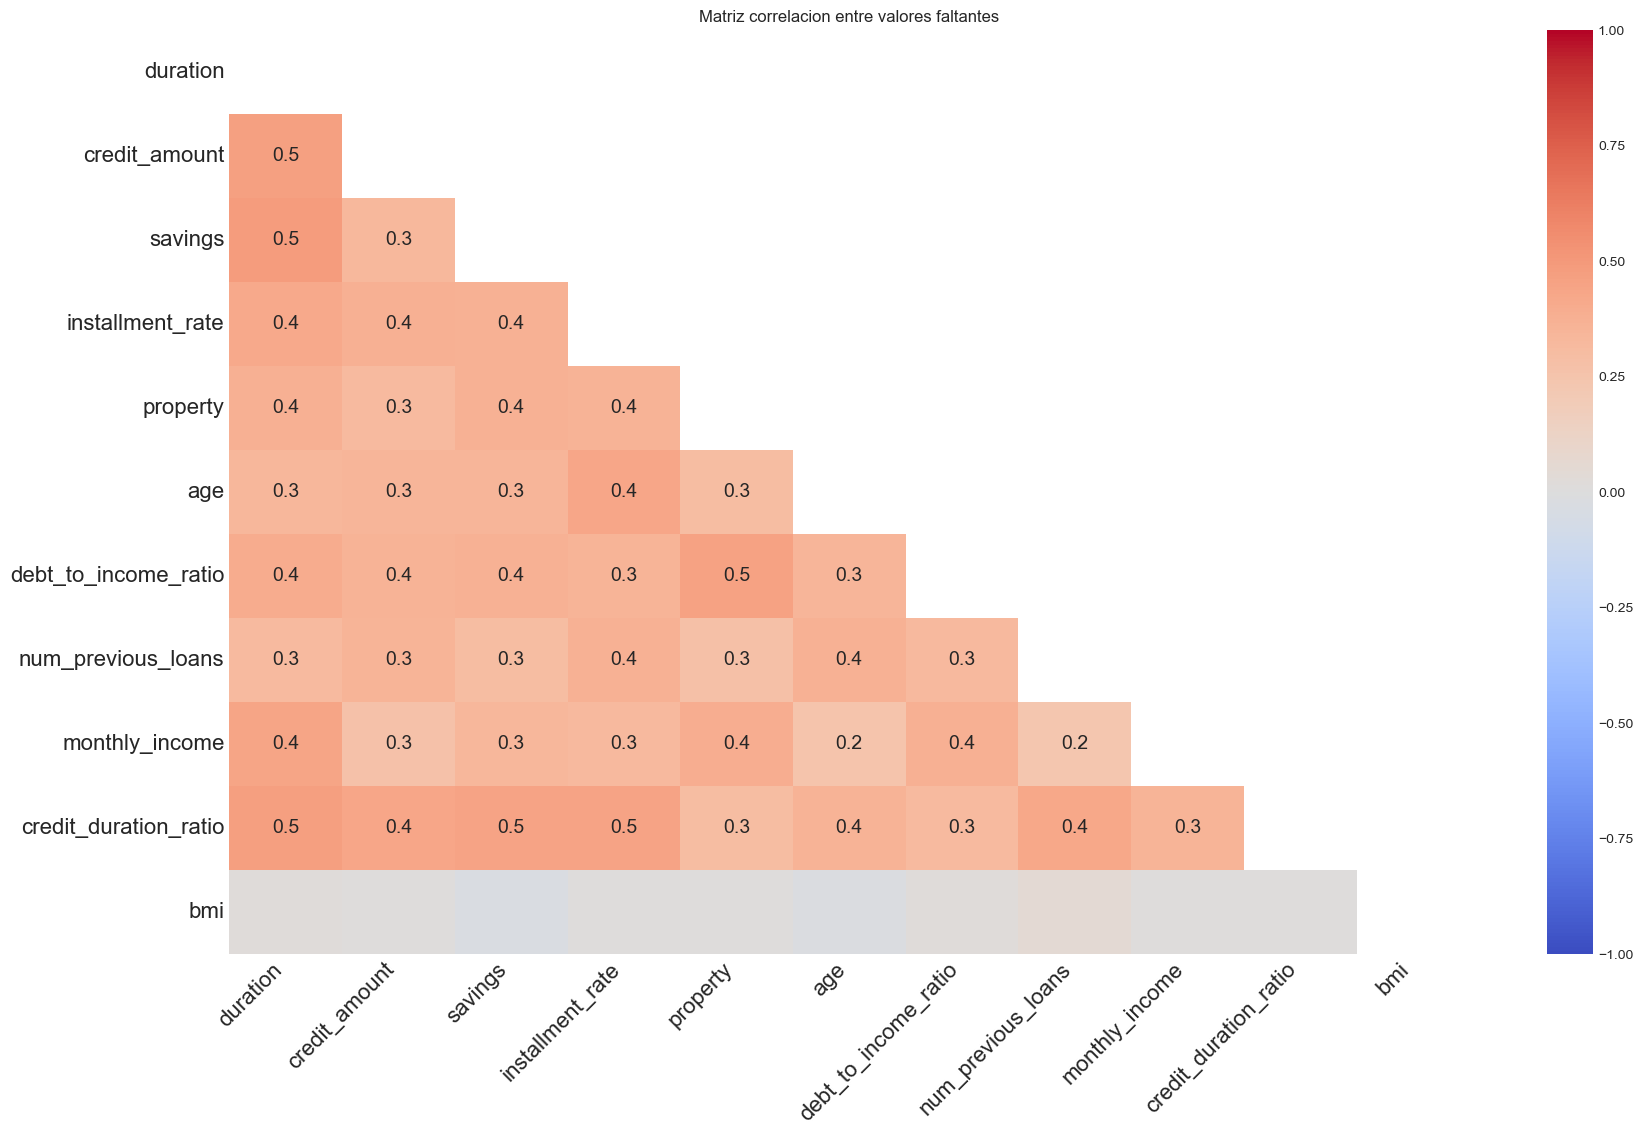

In [4008]:
#Procedemos a identificar si hay correlacion entre los valores faltantes del dataset 
msno.heatmap(df,
             cmap="coolwarm")
plt.title("Matriz correlacion entre valores faltantes")
plt.show()

##Análisis de Patrones de Missingness

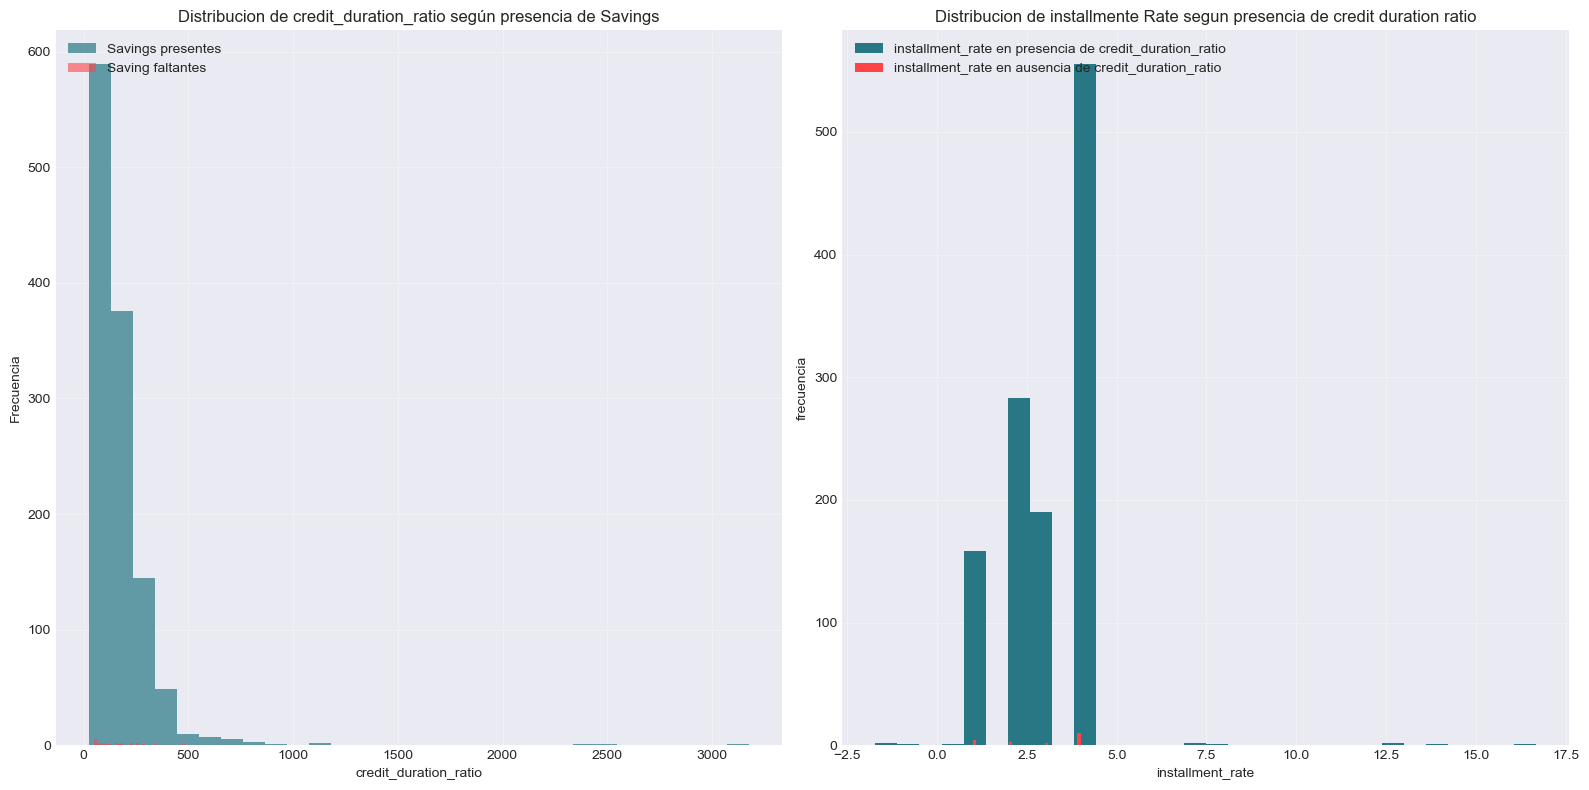

In [4009]:
# Vamos a analizar si los valores faltantes de savings dependen de credit_duration_ratio (MAR)

#Distribucion de credit_duration_ratio segun conocimiento de savings 

fig, axes= plt.subplots(1,2, figsize=(16,8))
axes[0].hist(df[df["savings"].notna()]["credit_duration_ratio"], bins=30, label="Savings presentes", alpha=0.7, color="#277884")
axes[0].hist(df[df["savings"].isna()]["credit_duration_ratio"], bins=30, label="Saving faltantes", alpha=0.6, color='#FE4447')
axes[0].set_xlabel("credit_duration_ratio")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribucion de credit_duration_ratio según presencia de Savings")
axes[0].legend(loc="upper left")
axes[0].grid(alpha=0.3)

# Analizamos la distribucion installment rate en presencia de credit_duration_ratio (MAR)
axes[1].hist(df[df["credit_duration_ratio"].notna()]["installment_rate"], bins=30, label="installment_rate en presencia de credit_duration_ratio", color="#277884")
axes[1].hist(df[df["credit_duration_ratio"].isna()]["installment_rate"], bins=30, label="installment_rate en ausencia de credit_duration_ratio", color='#FE4447')
axes[1].set_xlabel("installment_rate")
axes[1].set_ylabel("frecuencia")
axes[1].set_title("Distribucion de installmente Rate segun presencia de credit duration ratio")
axes[1].legend(loc="upper left")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


# 4. Técnicas de Eliminación
# Procedemos a tratar los valores faltantes con diferentes tecnicas de imputación y ver cual nos conviene antes de definir


In [4010]:
# Listwise deletion
df_listwise=df.dropna()
print("Comprobamos que la eliminacion se ha realizado correctamente")
print(df_listwise.info())
por_eliminado=100*((len(df)-len(df_listwise))/len(df))
print(f"\n En Total se eliminaron {len(df)-len(df_listwise)} registros lo que corresponde al ({por_eliminado:.2f})% de la muestral original")

Comprobamos que la eliminacion se ha realizado correctamente
<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 0 to 1249
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   status_account              1105 non-null   object 
 1   duration                    1105 non-null   float64
 2   credit_history              1105 non-null   object 
 3   purpose                     1105 non-null   object 
 4   credit_amount               1105 non-null   float64
 5   savings                     1105 non-null   object 
 6   employment_since            1105 non-null   object 
 7   installment_rate            1105 non-null   float64
 8   personal_status             1105 non-null   object 
 9   other_debtors               1105 non-null   object 
 10  residence_since             1105 non-null   int64  
 11  property                    1105 non-null   object 
 12  age                         1105 n

In [4011]:
# evaluamos como se vieron afectadas las propiedades estadisicas de cada variable al realizar esta eliminacion

for col in df[numeric_cols]:
    print("--"*80)
    print(f"\nComparación estadistico ({col})")
    print(f"\nmedia original para {col}: {df[col].mean():.2f}")
    print(f"media df_listwise para {col}: {df_listwise[col].mean():.2f}")
    print(f"\nmediana original para {col}: {df[col].median():.2f}")
    print(f"mediana df_listwise para {col}: {df_listwise[col].median():.2f}")
    print(f"\nVariacion estandar original para {col}: {df[col].std():.2f}")
    print(f"mediana df_listwise para {col}: {df_listwise[col].std():.2f}")


----------------------------------------------------------------------------------------------------------------------------------------------------------------

Comparación estadistico (duration)

media original para duration: 21.15
media df_listwise para duration: 21.00

mediana original para duration: 18.00
mediana df_listwise para duration: 18.00

Variacion estandar original para duration: 12.45
mediana df_listwise para duration: 12.35
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Comparación estadistico (credit_amount)

media original para credit_amount: 3301.50
media df_listwise para credit_amount: 3253.78

mediana original para credit_amount: 2307.00
mediana df_listwise para credit_amount: 2302.00

Variacion estandar original para credit_amount: 2890.80
mediana df_listwise para credit_amount: 2815.51
-----------------------------------------------------------------


###5.1 Imputación por Media/Mediana/Moda

In [4012]:
from sklearn.impute import SimpleImputer
#Antes de proceder con la tecnica de imputación simple analizamos la distribucion de las variables para definir que tecnica de imputacion es la mas 
#adecuada

resultado.head()

,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada
4,age,6.132432,Asimetrica +,98.74,Puntiaguda


In [4013]:
mapeo = {
    "Simetrica": "media",
    "Asimetrica +": "mediana",
    "Asimetrica -": "mediana"
}

resultado["imputacion_simple_sugerida"] = resultado["Clasificacion skew"].map(mapeo)
resultado



,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis,imputacion_simple_sugerida
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda,mediana
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda,mediana
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda,mediana
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada,media
4,age,6.132432,Asimetrica +,98.74,Puntiaguda,mediana
5,num_credits,1.233160,Asimetrica +,1.37,Puntiaguda,mediana
6,num_liable,1.940936,Asimetrica +,1.77,Puntiaguda,mediana
7,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal,mediana
8,num_previous_loans,0.705428,Asimetrica +,0.34,Normal,mediana
9,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda,mediana


In [4014]:
mapeo_faltentas={'savings':"si",
 'credit_duration_ratio':"si",
 'installment_rate':"si",
 'property':"si",
 'num_previous_loans':"si",
 'credit_amount':"si",
 'monthly_income':"si",
 'age':"si",
 'duration':"si",
 'debt_to_income_ratio':"si",
 'bmi':"si"}

In [4015]:
resultado["Valores_faltantes_num"]=resultado["Atributo"].map(mapeo_faltentas)
resultado

,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis,imputacion_simple_sugerida,Valores_faltantes_num
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda,mediana,si
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda,mediana,si
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda,mediana,si
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada,media,NaN
4,age,6.132432,Asimetrica +,98.74,Puntiaguda,mediana,si
5,num_credits,1.233160,Asimetrica +,1.37,Puntiaguda,mediana,NaN
6,num_liable,1.940936,Asimetrica +,1.77,Puntiaguda,mediana,NaN
7,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal,mediana,si
8,num_previous_loans,0.705428,Asimetrica +,0.34,Normal,mediana,si
9,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda,mediana,si


In [4016]:
# Conclsiones para aplicación de imputación simple según el tipo de distribución de las variables numericas
list_num_imputacion=resultado[resultado["Valores_faltantes_num"]=="si"]["Atributo"].tolist()
print(f"Cantidad de variables numéricas del dataset es igual a ({len(resultado)})")
print(f"Cantidad de variables numéricas con datos faltantes igual ({resultado["Valores_faltantes_num"].notna().sum()})")
print(f"Lista de variables numericas con valores faltantes es la siguiente:")
print(f"{list_num_imputacion}")

#Creacion de lista de columnas numericas con imuptacion por mediana y media 
list_num_imputacion_media=resultado[(resultado["imputacion_simple_sugerida"]=="media")& (resultado["Valores_faltantes_num"]=="si")]["Atributo"].tolist()
list_num_imputacion_mediana=resultado[(resultado["imputacion_simple_sugerida"]=="mediana")& (resultado["Valores_faltantes_num"]=="si")]["Atributo"].tolist()
print(f"\nVariables numericas con valores faltantes & distribucion (Simetrica), aplicar una imputacion simple por MEDIA. Son en total ({len(list_num_imputacion_media)})")
print(f"Corresponde al siguiente listado: {list_num_imputacion_media}")
print("--"*80)
print(f"Variables numericas con valores & distribucion (Asimetrica) aplicar una imputacion simple por MEDIANA. Son en total ({len(list_num_imputacion_mediana)})")
print(f"{list_num_imputacion_mediana}")

Cantidad de variables numéricas del dataset es igual a (13)
Cantidad de variables numéricas con datos faltantes igual (9)
Lista de variables numericas con valores faltantes es la siguiente:
['duration', 'credit_amount', 'installment_rate', 'age', 'debt_to_income_ratio', 'num_previous_loans', 'monthly_income', 'credit_duration_ratio', 'bmi']

Variables numericas con valores faltantes & distribucion (Simetrica), aplicar una imputacion simple por MEDIA. Son en total (1)
Corresponde al siguiente listado: ['bmi']
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Variables numericas con valores & distribucion (Asimetrica) aplicar una imputacion simple por MEDIANA. Son en total (8)
['duration', 'credit_amount', 'installment_rate', 'age', 'debt_to_income_ratio', 'num_previous_loans', 'monthly_income', 'credit_duration_ratio']


In [4017]:
# Aplicamos una imputacion simple por media o por mediana segun lo definido anteriormente 
from sklearn.impute import SimpleImputer

#Imputacion por media a lista de columnas numericas con dist simetrica & valores faltantes
df_simple_imputer=df.copy()
mean_imputer=SimpleImputer(strategy="mean")
df_simple_imputer[list_num_imputacion_media]=mean_imputer.fit_transform(df[list_num_imputacion_media])

median_imputer=SimpleImputer(strategy="median")
df_simple_imputer[list_num_imputacion_mediana]=median_imputer.fit_transform(df[list_num_imputacion_mediana])

print("EVALUACION DE RESULTADOS")
for col in list_num_imputacion:
    print("--"*80)
    print(f"\nAnalisis estadistico de {col}")
    print(f"Media de {col} original: {df[col].mean():.2f}")
    print(f"Media de {col} con imputación simple: {df_simple_imputer[col].mean():.2f}")
    print(f"\nMediana de {col} original: {df[col].median():.2f}")
    print(f"Mediana de {col} con imputación simple: {df_simple_imputer[col].median():.2f}")
    print(f"\nDesv. Estandar de {col} original: {df[col].std():.2f}")
    print(f"Desv. Estandar de {col} con imputación simple: {df_simple_imputer[col].std():.2f}")



EVALUACION DE RESULTADOS
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis estadistico de duration
Media de duration original: 21.15
Media de duration con imputación simple: 21.08

Mediana de duration original: 18.00
Mediana de duration con imputación simple: 18.00

Desv. Estandar de duration original: 12.45
Desv. Estandar de duration con imputación simple: 12.32
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis estadistico de credit_amount
Media de credit_amount original: 3301.50
Media de credit_amount con imputación simple: 3276.04

Mediana de credit_amount original: 2307.00
Mediana de credit_amount con imputación simple: 2307.00

Desv. Estandar de credit_amount original: 2890.80
Desv. Estandar de credit_amount con imputación simple: 2857.85
----

In [4018]:
#Comprobamos que ninguna columna numerica con valores faltantes presente valores faltantes

df_simple_imputer[list_num_imputacion].isna().sum()

duration                 0
credit_amount            0
installment_rate         0
age                      0
debt_to_income_ratio     0
num_previous_loans       0
monthly_income           0
credit_duration_ratio    0
bmi                      0
dtype: int64

In [4019]:
#Todavía existen columnas categoricas con valores faltantes procedemos a identificarlas primero y posteriormente aplicar una imputacion simple por moda
df[categorical_cols].isna().sum()

status_account         0
credit_history         0
purpose                0
savings               43
employment_since       0
personal_status        0
other_debtors          0
property              34
other_installments     0
housing                0
job                    0
telephone              0
foreign_worker         0
target                 0
payment_behavior       0
gender                 0
dtype: int64

In [4020]:
# Iteramos col categoricas para identificar que columnas tiene valores faltantes y crear la lista de col_categorias con valores faltantes
list_col_catg_imput=[]
for col in df[categorical_cols]:
    if df[col].isna().sum()>0:
        list_col_catg_imput.append(col)
print(f"En total tenemos ({len(list_col_catg_imput)}) columnas categoricas con valores faltantes:")
print(list_col_catg_imput)


En total tenemos (2) columnas categoricas con valores faltantes:
['savings', 'property']


In [4021]:
#Procedemos a realizar una imputacion simple por moda en las columnas con valores faltantes categoricos
from sklearn.impute import SimpleImputer

mode_imputer=SimpleImputer(strategy="most_frequent")
df_simple_imputer[list_col_catg_imput]=mode_imputer.fit_transform(df[list_col_catg_imput])

print("EVALUACION IMPUTACION")
print("evaluamos que ninguna columna presente valores faltantes")
print(f"Valores faltantes de df_simple_imputer ({df_simple_imputer.isna().sum().sum()})")
print("--"*80)
print("Evaluación frecuencia de las variables categoricas antes y despues de la imputación:")
for col in list_col_catg_imput:
    print("--"*80)
    print(f"\nAnalisis de {col}")
    tabla=pd.DataFrame({"original":df[col].value_counts(), "imputacion simple":df_simple_imputer[col].value_counts()})
    print(tabla)




EVALUACION IMPUTACION
evaluamos que ninguna columna presente valores faltantes
Valores faltantes de df_simple_imputer (0)
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluación frecuencia de las variables categoricas antes y despues de la imputación:
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis de savings
                     original  imputacion simple
savings                                         
savings_below_100         719                762
no_savings_account        221                221
savings_100_to_500        127                127
savings_500_to_1000        76                 76
savings_above_1000         64                 64
-----------------------------------------------------------------------------------------------------------

<Axes: >

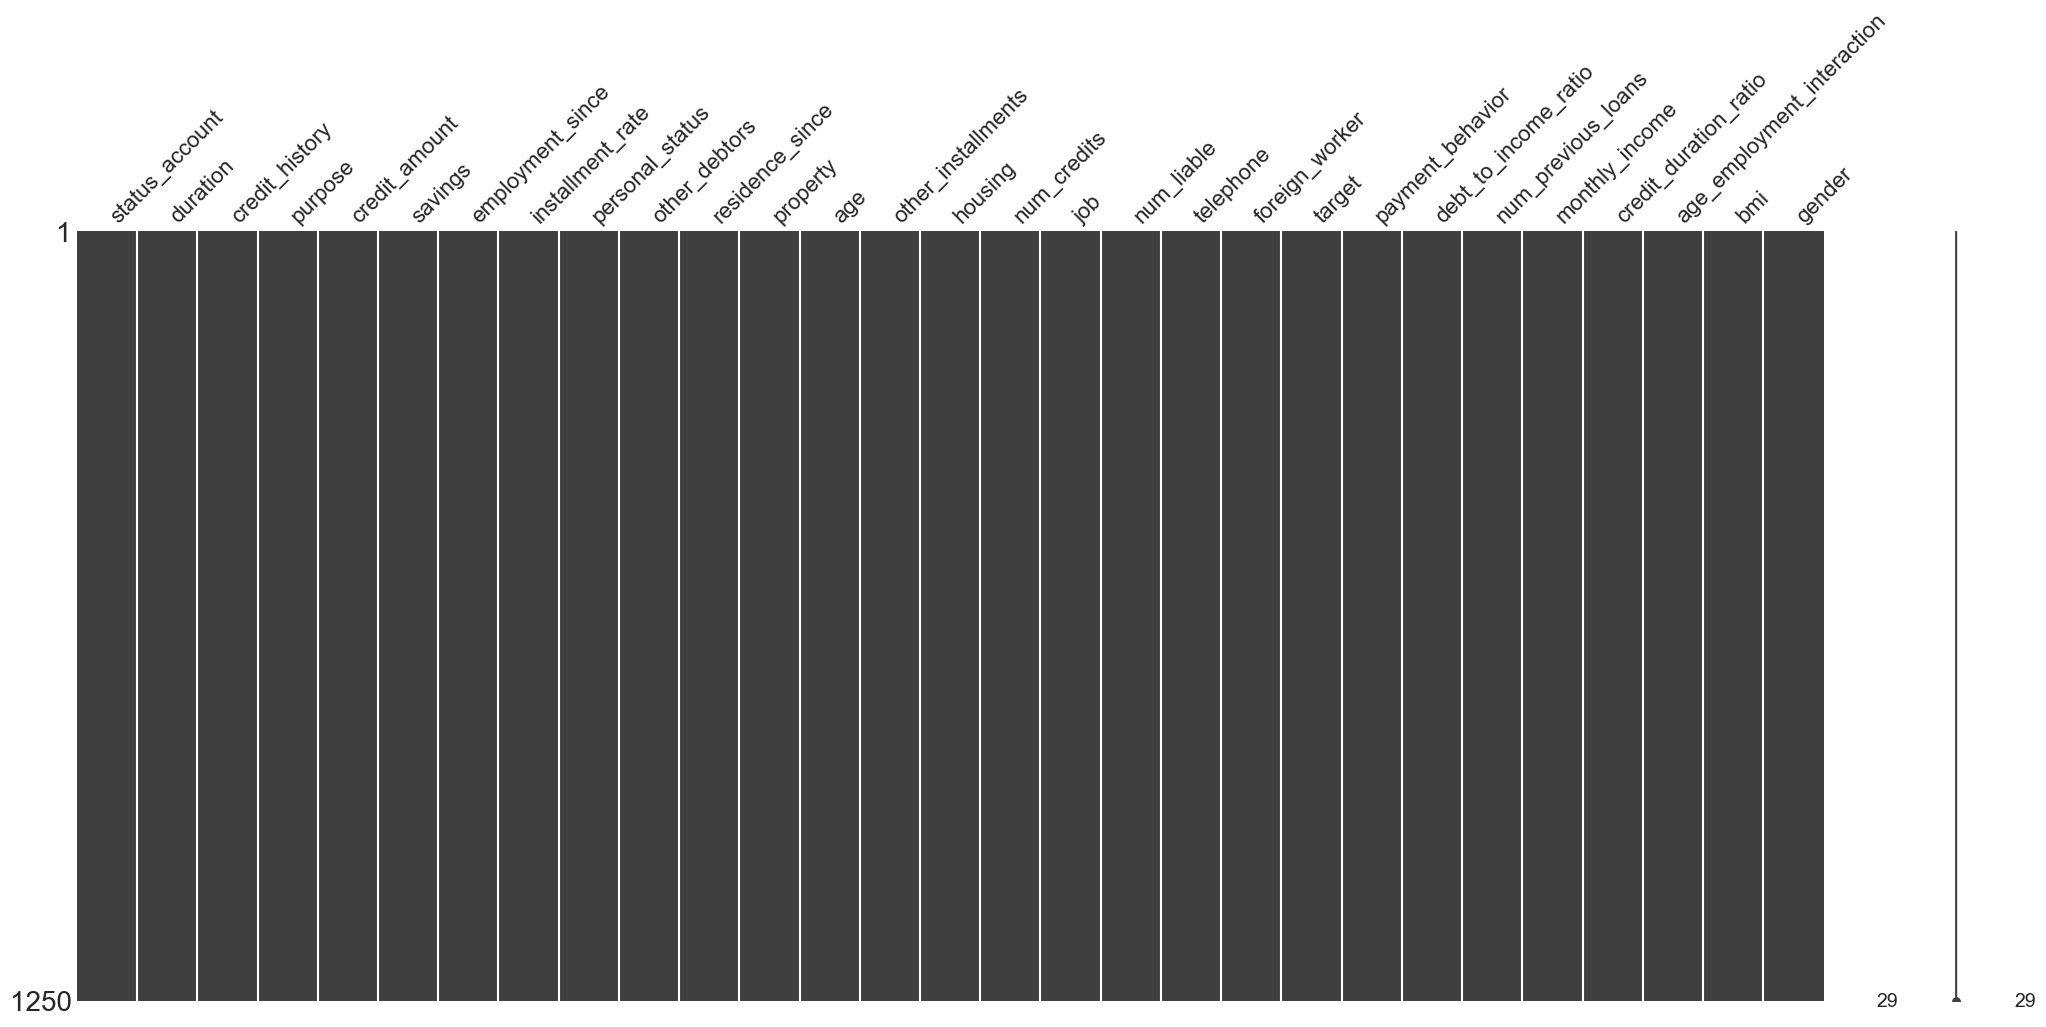

In [4022]:
#Ahora procedemos a hacer una ultima prueba de que no hay valores faltantes en la matriz de imputacion simple

msno.matrix(df_simple_imputer)

In [4023]:
#Como ultima variante aplicaremos la imputación por K-N vecinos para tratar los valores faltantes
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

df_knn_imputer=df.copy()
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_knn_imputer[numeric_cols])

knn_imputer=KNNImputer(n_neighbors=5, weights="distance")
df_knn_scaled=knn_imputer.fit_transform(df_scaled)

df_knn_imputer[numeric_cols]=scaler.inverse_transform(df_knn_scaled)

print("✅ KNN Imputation completada (k=5)")
print(f"Datos numericos faltantes: {df_knn_imputer[numeric_cols].isnull().sum().sum()}")

# Comparar resultados
print("\n📊 Comparación KNN vs Media (para variable 'duration'):")
print(f"Original - Media: {df['duration'].mean():.2f}, Std: {df['duration'].std():.2f}")
print(f"Imputación simple - Media: {df_simple_imputer['duration'].mean():.2f}, Std: {df_simple_imputer['duration'].std():.2f}")
print(f"Imputación KNN - Media: {df_knn_imputer['duration'].mean():.2f}, Std: {df_knn_imputer['duration'].std():.2f}")

✅ KNN Imputation completada (k=5)
Datos numericos faltantes: 0

📊 Comparación KNN vs Media (para variable 'duration'):
Original - Media: 21.15, Std: 12.45
Imputación simple - Media: 21.08, Std: 12.32
Imputación KNN - Media: 21.10, Std: 12.35


##  MICE (Multiple Imputation by Chained Equations)

In [4024]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Mice con random Forrest
df_mice=df.copy()

#iterative imputer
imputer_mice=IterativeImputer(
    RandomForestRegressor(n_estimators=10, random_state=10),
    max_iter=10,
    random_state=42)

df_mice[numeric_cols]=imputer_mice.fit_transform(df[numeric_cols])

print("imputacion por MICE concluida")
print("--"*80)
print(f"Evaluacion del modelo: numero de valores faltantes es igual a {df_mice[numeric_cols].isna().sum().sum()}")

# Comparación de resultados
print("\nComparación de Métodos Avanzados (para 'DURATION'):")
print(f"Original - Media: {df['duration'].mean():.2f}, Std: {df['duration'].std():.2f}")
print(f"KNN - Media: {df_knn_imputer['duration'].mean():.2f}, Std: {df_knn_imputer['duration'].std():.2f}")
print(f"MICE - Media: {df_mice['duration'].mean():.2f}, Std: {df_mice['duration'].std():.2f}")

imputacion por MICE concluida
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluacion del modelo: numero de valores faltantes es igual a 0

Comparación de Métodos Avanzados (para 'DURATION'):
Original - Media: 21.15, Std: 12.45
KNN - Media: 21.10, Std: 12.35
MICE - Media: 21.18, Std: 12.42


##  Comparación Global de Todos los Métodos

In [4025]:
print("Comparación global de métodos")
metodos=["original",
         "Listwise_deletion",
         "Imputacion_simpe",
         "KNN",
         "MICE"]
n=[len(df), len(df_listwise), len(df_simple_imputer), len(df_knn_imputer), len(df_mice)]
df_list=[df.copy(), df_listwise.copy(), df_simple_imputer.copy(), df_knn_imputer.copy(), df_mice.copy()]

for col in numeric_cols:
    i=0
    result_list=[]
    print("=="*80)
    print(f"Variable: {col}")
    print("=="*80)
    while i < len(metodos):
        result_list.append({"metodo":metodos[i], "N":n[i], "media":round(df_list[i][col].mean(),2), "std":round(df_list[i][col].std(),2)})
        i=i+1
    final_result=pd.DataFrame(result_list)
    print(final_result)


Comparación global de métodos
Variable: duration
              metodo     N  media    std
0           original  1250  21.15  12.45
1  Listwise_deletion  1105  21.00  12.35
2   Imputacion_simpe  1250  21.08  12.32
3                KNN  1250  21.10  12.35
4               MICE  1250  21.18  12.42
Variable: credit_amount
              metodo     N    media      std
0           original  1250  3301.50  2890.80
1  Listwise_deletion  1105  3253.78  2815.51
2   Imputacion_simpe  1250  3276.04  2857.85
3                KNN  1250  3303.99  2880.50
4               MICE  1250  3328.27  2905.73
Variable: installment_rate
              metodo     N  media   std
0           original  1250   3.00  1.32
1  Listwise_deletion  1105   3.01  1.33
2   Imputacion_simpe  1250   3.00  1.30
3                KNN  1250   2.99  1.31
4               MICE  1250   2.99  1.31
Variable: residence_since
              metodo     N  media  std
0           original  1250   2.84  1.1
1  Listwise_deletion  1105   2.84  1.1
2

In [4026]:
print("Procedemos con la imputación simple para los siguientes ejercicios en el tratamiento de outliers")

Procedemos con la imputación simple para los siguientes ejercicios en el tratamiento de outliers


## Identificación & Tratamiento de outliers

In [4027]:
#Como primer punto de partida definimos las variables numericas a tratar:
for idx, col in enumerate (df[numeric_cols]):
    print(idx, col)

0 duration
1 credit_amount
2 installment_rate
3 residence_since
4 age
5 num_credits
6 num_liable
7 debt_to_income_ratio
8 num_previous_loans
9 monthly_income
10 credit_duration_ratio
11 age_employment_interaction
12 bmi


In [4028]:
print(numeric_cols)
print(f"Cantidad de variables numericas {len(numeric_cols)}")

Index(['duration', 'credit_amount', 'installment_rate', 'residence_since',
       'age', 'num_credits', 'num_liable', 'debt_to_income_ratio',
       'num_previous_loans', 'monthly_income', 'credit_duration_ratio',
       'age_employment_interaction', 'bmi'],
      dtype='object')
Cantidad de variables numericas 13


In [4029]:
# A pesar de tener 13 variables numericas en nuestro dataset. Los metodos de Outliers son tienen sentido en variables numercias continuas
# Por lo que el tratamiento de Outliers se limitara unicamente a las variables continuas 
print("Existen 13 variables númericas en el df original pero no todas son continuas. " \
"Solo en variables continuas se aplicara el analisis y tratamiento de Outliers")
print("=="*80)
print("\nLISTADO VARIABLES NUM. CONTINUAS")
print("=="*17)
print(f"Listado de variables numercias continuas para analisis y tratamiento de outliers son ({len(continuas)}):")
print(f"\n{continuas}")
print("=="*80)
print("\nLISTADO VARIABLES NUM. DISCRETAS")
print("=="*17)
print(f"Listado de variables numercias DISCRETAS CATEGORICAS ({len(discretas)}):")
print(f"\n{discretas}")

Existen 13 variables númericas en el df original pero no todas son continuas. Solo en variables continuas se aplicara el analisis y tratamiento de Outliers

LISTADO VARIABLES NUM. CONTINUAS
Listado de variables numercias continuas para analisis y tratamiento de outliers son (8):

['duration', 'credit_amount', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'age']

LISTADO VARIABLES NUM. DISCRETAS
Listado de variables numercias DISCRETAS CATEGORICAS (5):

['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']


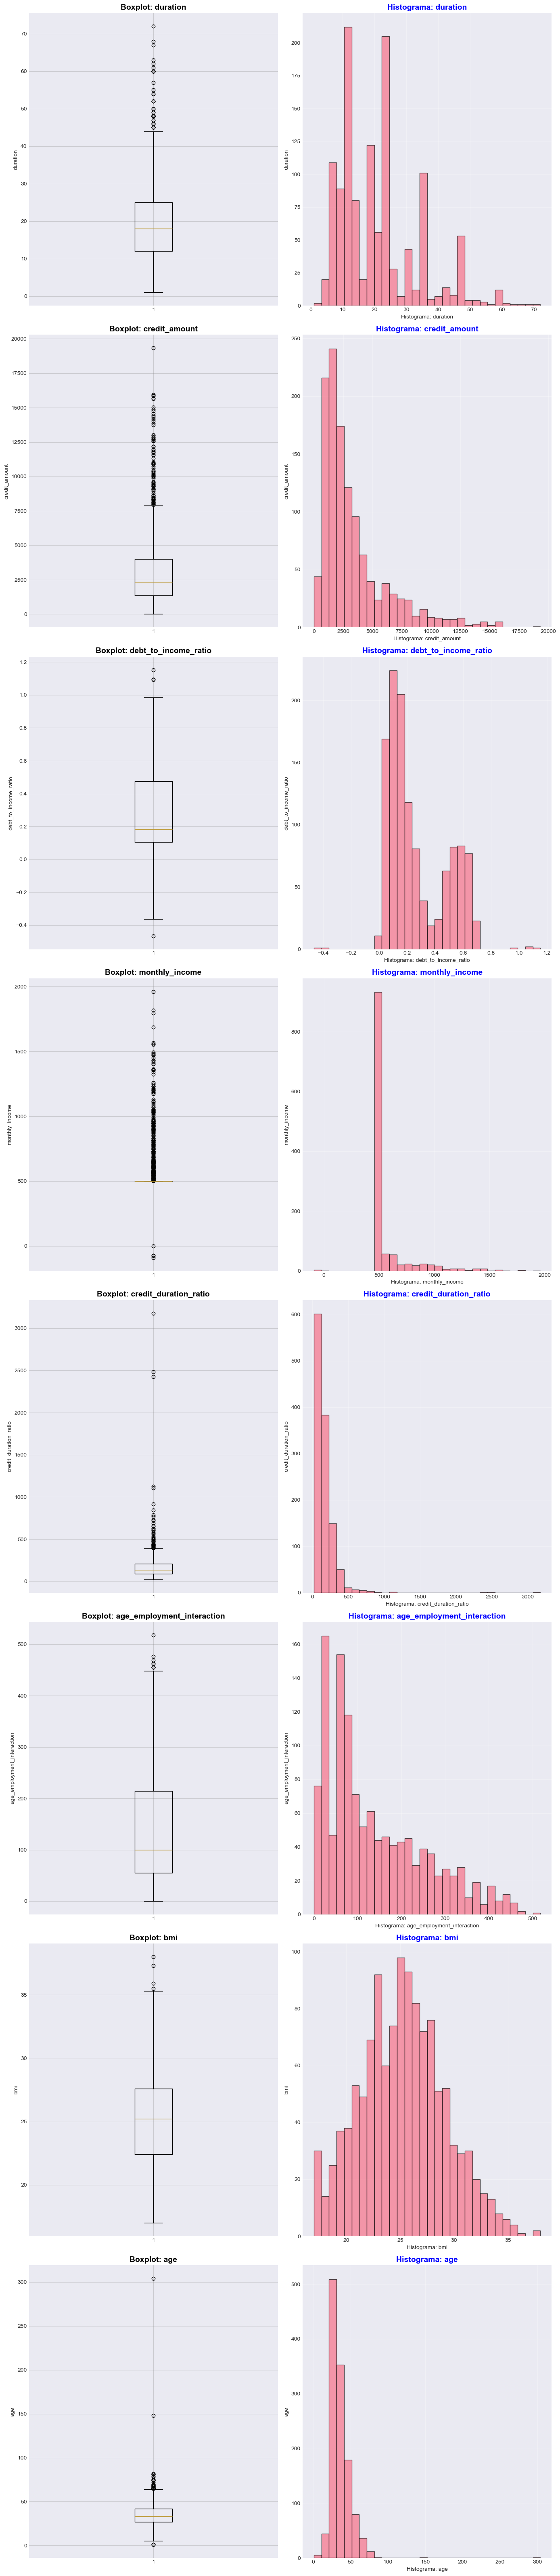

In [4030]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings

ancho_individual=7
alto_individual=8
nrows=len(continuas)
ncols=2
ancho_global=ancho_individual*ncols
alto_golbal=alto_individual*nrows

fig, axes=plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ancho_global, alto_golbal),
    constrained_layout=True
)

#Ploteamos primero el boxplot en la primera fila 

for idx, col in enumerate (continuas):
    axes[idx, 0].boxplot(df[col].dropna())
    axes[idx, 0].set_title(f"Boxplot: {col}", fontsize=14, fontweight="bold", c="black")
    axes[idx, 0].set_ylabel(f"{col}")
    axes[idx, 0].grid(alpha=0.3, c="grey")

#Ahora ploteamos en la segunda fila un histogrma para la misma variable justo debajo
    axes[idx, 1].hist(df[col], bins=30, edgecolor="black", alpha=0.7)
    axes[idx, 1].set_title(f"Histograma: {col}", fontsize=14, fontweight="bold", color="Blue")
    axes[idx,1].set_ylabel(f"{col}")
    axes[idx,1].set_xlabel(f"Histograma: {col}")
    axes[idx,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Analisis Outliers

In [4031]:
#Antes de proceder con el analisis de outliers actualizamos nuestro df con la imputación realizada anteriormente
df=df_simple_imputer.copy()
print(F"comprobamos suma de valores faltantes DESP. de la imputación: {df.isna().sum().sum()}")

outliers={}

comprobamos suma de valores faltantes DESP. de la imputación: 0


In [4032]:
## Z-Score

def detect_outliers_z_score(data, threshold):
    Z_score=np.abs(stats.zscore(data))
    return Z_score > threshold

outliers_zscore={}

for col in (df[continuas]):
    outliers_zscore[col]=detect_outliers_z_score(df[col], 3)
    # n_outliers=(outliers_zscore[col]==True).sum()
    # l=len(df)
    #print(f"Atributo:{col}, presenta {n_outliers}, que corresponde a un porcentaje de {round((n_outliers/l)*10,2)}")
zscore_results=[]
for col in continuas:
    num_outliers=outliers_zscore[col].sum()
    l=len(df[continuas])
    zscore_results.append({"Atributo":col,"Num_Outliers":num_outliers, "Porcentaje":round((num_outliers/l)*10,2)  })

df_outliers_zscore=pd.DataFrame(zscore_results).sort_values(by="Num_Outliers", ascending=False)
df_outliers_zscore.head(10)




,Atributo,Num_Outliers,Porcentaje
3,monthly_income,44,0.35
1,credit_amount,30,0.24
0,duration,18,0.14
4,credit_duration_ratio,12,0.10
7,age,7,0.06
2,debt_to_income_ratio,6,0.05
6,bmi,2,0.02
5,age_employment_interaction,1,0.01


In [4033]:
#Guardamos los resultados globales del analisis individual por atributo de outliers con el metodo z-score
Total_outliers_zscore=df_outliers_zscore["Num_Outliers"].sum()
Total_perc_zscore=round(Total_outliers_zscore/len(df)*100,2)
results_zscore={"N Outliers":Total_outliers_zscore, "Porcentaje":Total_perc_zscore} 

print(f"Z-score detectó {Total_outliers_zscore} outliers")
print(f"Porcentaje: {Total_perc_zscore}%")



Z-score detectó 120 outliers
Porcentaje: 9.6%


## IQR (Rango Intercuartílico)

In [4034]:
def detect_outliers_iqr(data, multiplier):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    return (data < lower_bound) | (data > upper_bound)

outliers_iqr={}

for col in continuas:
    outliers_iqr[col]=detect_outliers_iqr(df[col], 1.5)

results_outliers_iqr=[]
for col in continuas:
    n_outliers=outliers_iqr[col].sum()
    l=len(df[continuas])
    porcentaje=round((n_outliers/l)*100,2)
    results_outliers_iqr.append({"Atributo":col,"Num_Outliers":n_outliers, "Porcentaje":porcentaje})

df_outliers_iqr=pd.DataFrame(results_outliers_iqr).sort_values(by="Num_Outliers", ascending=False)
df_outliers_iqr

,Atributo,Num_Outliers,Porcentaje
3,monthly_income,308,24.64
1,credit_amount,102,8.16
0,duration,91,7.28
4,credit_duration_ratio,55,4.40
7,age,53,4.24
5,age_employment_interaction,10,0.80
6,bmi,6,0.48
2,debt_to_income_ratio,4,0.32


In [4035]:
#Guardamos los resultados globales del analisis individual por atributo de outliers con el metodo IQR
Total_outliers_iqr=df_outliers_iqr["Num_Outliers"].sum()
Total_perc_iqr=round(Total_outliers_iqr/len(df)*100,2)
results_iqr={"N Outliers":Total_outliers_iqr, "Porcentaje":Total_perc_iqr} 

print(f"IQR detectó {Total_outliers_iqr} outliers")
print(f"Porcentaje: {Total_perc_iqr}%")

IQR detectó 629 outliers
Porcentaje: 50.32%


## Isolation Forest (isolation forest)

In [4036]:
## Tratamiento de Outliers Basados en Modelos
#A diferencia de los métodos estadísticos univariados, los modelos LOF e Isolation Forest identifican anomalías a nivel de observación completa, evaluando la combinación multivariada de atributos. Por tanto, el outlier detectado corresponde a la fila completa y no a un atributo individual.

#detecta observaciones “raras” en conjunto

#no te dice qué variable causó el outlier
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_iso = iso_forest.fit_predict(df[continuas])


#Identifica con -1 los outliers
outliers['outlier_iso'] = outliers_iso == -1

Total_outliers_iso=outliers['outlier_iso'].sum()
Total_perc_iso=round(Total_outliers_iso/len(df)*100,2)
results_iso={"N Outliers":Total_outliers_iso, "Porcentaje":Total_perc_iso}

print(f"Isolation Forest detectó {Total_outliers_iso} outliers")
print(f"Porcentaje: {Total_perc_iso}%")

Isolation Forest detectó 63 outliers
Porcentaje: 5.04%


In [4037]:
### Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

#Escalado variables continuas numericas
scaler=StandardScaler()
continuas_scaled=scaler.fit_transform(df[continuas])

#Definicion lof
lof=LocalOutlierFactor(n_neighbors=5, contamination=0.05, metric="euclidean")
outliers_lof=lof.fit_predict(continuas_scaled)

outliers["outlier_LOF"]= outliers_lof == -1

Total_outliers_lof=outliers["outlier_LOF"].sum()
Total_perc_lof=round(Total_outliers_lof/len(df)*100,2)
results_lof={"N Outliers":Total_outliers_lof, "Porcentaje":Total_perc_lof}


print("Predicion modelo LOF concluido")
print(f"Local Outlier Factor detectó {Total_outliers_lof} outliers")
print(f"Porcentaje: {Total_perc_lof}%")

Predicion modelo LOF concluido
Local Outlier Factor detectó 63 outliers
Porcentaje: 5.04%


## DBSCAN


In [4038]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[continuas])

dbscan = DBSCAN(eps=1.2, min_samples=2, metric="euclidean")
clusters = dbscan.fit_predict(df_scaled)
outliers['outlier_dbscan'] = clusters == -1

Total_outliers_dbscan=outliers['outlier_dbscan'].sum()
Total_perc_dbscan=round(Total_outliers_dbscan/len(df)*100,2)
results_dbscan={"N Outliers":Total_outliers_dbscan, "Porcentaje":Total_perc_dbscan}

print(f"DBSCAN detectó {Total_outliers_dbscan} outliers")
print(f"Porcentaje: {Total_perc_dbscan}%")

DBSCAN detectó 185 outliers
Porcentaje: 14.8%


## Comparación global distintos Métodos 

In [4039]:
#. Comparación de Métodos 

Metodo=["Z-score",
        "IQR",
        "ISO",
        "LOF",
        "DBSCAN"]
results=[results_zscore, results_iqr, results_iso, results_lof, results_dbscan]
print(results[0]["N Outliers"])

outliers_list_results=[]
i=0
while i < len(Metodo):
        outliers_list_results.append({"metodo":Metodo[i], "N Outliers":results[i]["N Outliers"], "porcentaje": results[i]["Porcentaje"] })
        i=i+1
df_outliers_results=pd.DataFrame(outliers_list_results).sort_values(by="N Outliers", ascending=False)
df_outliers_results.head()



120


,metodo,N Outliers,porcentaje
1,IQR,629,50.32
4,DBSCAN,185,14.80
0,Z-score,120,9.60
2,ISO,63,5.04
3,LOF,63,5.04


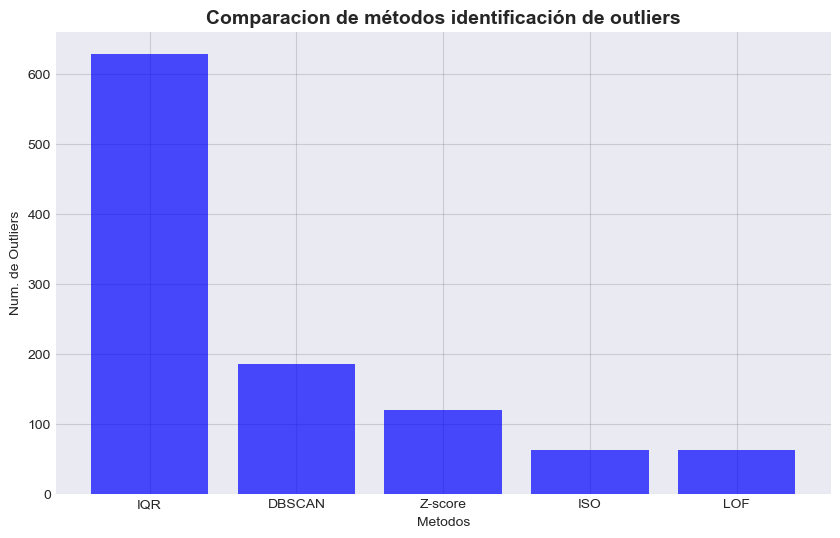

In [4040]:
plt.figure(figsize=(10,6))
plt.bar(df_outliers_results["metodo"], df_outliers_results["N Outliers"], color="blue", alpha=.7)
plt.title("Comparacion de métodos identificación de outliers", fontweight="bold", fontsize=14)
plt.xlabel("Metodos")
plt.ylabel("Num. de Outliers")
plt.grid(True, alpha=0.3, c="grey")
plt.show()

In [4041]:
df["monthly_income"]

0        500.0
1        500.0
2        500.0
3       1050.0
4        500.0
         ...  
1245     500.0
1246    1016.0
1247     500.0
1248     567.0
1249     500.0
Name: monthly_income, Length: 1250, dtype: float64

La variable monthly_income presenta una alta concentración de observaciones en un valor único (500), lo que provoca un IQR nulo. En este contexto, el método IQR deja de ser adecuado para la detección de valores atípicos, por lo que se optó por un enfoque alternativo basado en percentiles / análisis de la cola de la distribución.

## Tratamiento de Outliers 

In [4042]:
## Tratamiento de Outliers 


procedimientos=["hard constraints", "hard constraints + log + IQR + capping", "hard constraints + logit","Tratamiento SOLO para la cola (>500) log + IQR + Capping", "log + IQR + Capping","log + IQR + Capping","Z-Score", "log + IQR + Capping", "hard constraints + log + IQR + capping"]
criterios=["valores inferiores al mínimo del rango permitido (<4)", "Valores fuera de rango y asimetría positiva fuerte (cola larga a la derecha)", "violaciones del rango permitido (0 a 1)", "censurar el valor 500 del tratamiento de monthly_income","Asimetria altamente positiva hay que transf.", "Asimetria altamente positiva hay que transf.", "distrb. Simetrica skew_value<0.5", "Valores fuera del rango, distb. Asimétrica" ]
list=[]
print(len(continuas))
i=0
while i < len(continuas):
    col=continuas[i]
    metodo=procedimientos[i]
    criterio=criterios[i]
    list.append({"Variable":col, "procedimiento":metodo, "criterios":criterio})
    i=i+1
df_tratamiento_outliers=pd.DataFrame(list)
df_tratamiento_outliers.head(10)

8


,Variable,procedimiento,criterios
0,duration,hard constraints,valores inferiores al mínimo del rango permiti...
1,credit_amount,hard constraints + log + IQR + capping,Valores fuera de rango y asimetría positiva fu...
2,debt_to_income_ratio,hard constraints + logit,violaciones del rango permitido (0 a 1)
3,monthly_income,Tratamiento SOLO para la cola (>500) log + IQR...,censurar el valor 500 del tratamiento de month...
4,credit_duration_ratio,log + IQR + Capping,Asimetria altamente positiva hay que transf.
5,age_employment_interaction,log + IQR + Capping,Asimetria altamente positiva hay que transf.
6,bmi,Z-Score,distrb. Simetrica skew_value<0.5
7,age,log + IQR + Capping,"Valores fuera del rango, distb. Asimétrica"


### Tratamiento de valores fuera de rango en variables numericas


#### Evaluación limites Duration

In [4043]:
# Tratamiento Duration, primero identificar valores fuera del rango permitido.
mask_invalid=(df["duration"] < 4) | (df["duration"] > 72)
Qty_valores_incorrectos_duration=mask_invalid.sum()

In [4044]:
porcentaje_valores_incorrectos=round(Qty_valores_incorrectos_duration/len(df["duration"])*100,2)
print(f"Cantidad de valores fuera del rango permitido {Qty_valores_incorrectos_duration}")
print(f"Porcentaje de valores incorrectos: {porcentaje_valores_incorrectos}%")
print("procedemos a eliminar los valores fuera del rango permitido ya que son incorrectos y pueden confundir al modelo")

Cantidad de valores fuera del rango permitido 2
Porcentaje de valores incorrectos: 0.16%
procedemos a eliminar los valores fuera del rango permitido ya que son incorrectos y pueden confundir al modelo


In [4045]:
df=df.loc[~mask_invalid].copy()
print("En total solo eliminamos 2 valores que no eran Outliers, eran errores de data")
print("En este caso no aplicamos winsorizado ya que los extremos son variables validas que contienen informacion importante")

En total solo eliminamos 2 valores que no eran Outliers, eran errores de data
En este caso no aplicamos winsorizado ya que los extremos son variables validas que contienen informacion importante


In [4046]:
print(f"Despues de esta eliminacion por analisis de limites en duration tenemos un dataframe de : {df.shape}")

Despues de esta eliminacion por analisis de limites en duration tenemos un dataframe de : (1248, 29)


#### Evaluacion limites Credit_Amount

In [4047]:
#Rango valido segun literatura Rango: 250 a 18.424 DM
df["credit_amount"].describe()

count     1248.000000
mean      3279.877404
std       2858.525794
min          1.000000
25%       1376.750000
50%       2307.000000
75%       3960.500000
max      19323.000000
Name: credit_amount, dtype: float64

In [4048]:
#Antes de realizar transformacion eliminamos valores fueras del rango permitido 250 a 18.424 DM
mask_invalid_credit_amount=(df["credit_amount"] < 250) | (df["credit_amount"] > 18424)
Qty_valores_incorrectos_credit_amount=mask_invalid_credit_amount.sum()
print(f"Cantidad de valores en Credit_amount fuera del Rango (250 a 18.424 DM) :{Qty_valores_incorrectos_credit_amount}")

Cantidad de valores en Credit_amount fuera del Rango (250 a 18.424 DM) :4


In [4049]:
#Eliminamos esos valores fuera del rango:
df=df.loc[~mask_invalid_credit_amount].copy()
print(f"En total solo eliminamos {Qty_valores_incorrectos_credit_amount} valores que no eran Outliers, eran errores de data por estar fuera del rango establecido")
print(f"Despues de esta eliminacion por analisis de limites en credit_amount tenemos un dataframe de : {df.shape}")

En total solo eliminamos 4 valores que no eran Outliers, eran errores de data por estar fuera del rango establecido
Despues de esta eliminacion por analisis de limites en credit_amount tenemos un dataframe de : (1244, 29)


#### Evaluacion limites Debt_to_income_ratio

In [4050]:
#Antes de realizar transformacion eliminamos valores fueras del rango permitido Ratio (0.0 a 1.0)
mask_invalid_debt_to_income=(df["debt_to_income_ratio"] < 0) | (df["debt_to_income_ratio"] > 1)
Qty_valores_incorrectos_debt_to_income=mask_invalid_debt_to_income.sum()
print(f"Cantidad de valores en debt_to_income_ratio fuera del Rango (0.0 a 1.0) :{Qty_valores_incorrectos_debt_to_income}")

Cantidad de valores en debt_to_income_ratio fuera del Rango (0.0 a 1.0) :4


In [4051]:
#Eliminamos esos valores fuera del rango:
df=df.loc[~mask_invalid_debt_to_income].copy()

print(f"En total solo eliminamos {Qty_valores_incorrectos_debt_to_income} valores que no eran Outliers, eran errores de data por estar fuera del rango establecido")
print(f"Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : {df.shape}")

En total solo eliminamos 4 valores que no eran Outliers, eran errores de data por estar fuera del rango establecido
Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : (1240, 29)


#### limites Monthly_income

In [4052]:
df["monthly_income"].describe()

count    1240.000000
mean      573.894355
std       194.669197
min       -90.000000
25%       500.000000
50%       500.000000
75%       500.000000
max      1818.000000
Name: monthly_income, dtype: float64

In [4053]:
# Eliminamos los valores que este fuera del rango permitido Rango: 500 a 15.000 DM
mask_invalid_monthly_income=(df["monthly_income"] < 500) | (df["monthly_income"] > 15000)
Qty_valores_incorrectos_monthly_income=mask_invalid_monthly_income.sum()
print(f"Cantidad de valores en monthly_income fuera del Rango (500 a 15.000 DM) :{Qty_valores_incorrectos_monthly_income}")

Cantidad de valores en monthly_income fuera del Rango (500 a 15.000 DM) :4


In [4054]:
df=df.loc[~mask_invalid_monthly_income].copy()
len(df)
print(f"En total solo eliminamos {Qty_valores_incorrectos_monthly_income} valores que no eran Outliers, eran errores de data por estar fuera del rango establecido")
print(f"Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : {df.shape}")

En total solo eliminamos 4 valores que no eran Outliers, eran errores de data por estar fuera del rango establecido
Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : (1236, 29)


In [4055]:
df["monthly_income"].describe()

count    1236.000000
mean      575.944175
std       191.602150
min       500.000000
25%       500.000000
50%       500.000000
75%       500.000000
max      1818.000000
Name: monthly_income, dtype: float64

#### limites credit_duration_ratio

In [4056]:

df["credit_duration_ratio"].describe()

count    1236.000000
mean      168.776246
std       169.828617
min        24.060000
25%        90.947500
50%       130.120000
75%       206.042500
max      3175.800000
Name: credit_duration_ratio, dtype: float64

#credit_duration_ratio representa el pago mensual promedio parece ser que todos los valores estan en un rango real no realizamos eliminacion por valores erroneos (hard constraints)

#### limites age_employment_interaction

In [4057]:
df["age_employment_interaction"].describe()

count    1236.000000
mean      140.593447
std       114.523950
min         0.000000
25%        55.000000
50%       100.000000
75%       214.500000
max       518.000000
Name: age_employment_interaction, dtype: float64

age_employment_interaction Combina información de edad y estabilidad laboral. En este caso el valor 0 puede ser real en caso no tenga ningun año de trabajar. por lo que no eliminamos esos minimos y 37 × 14 = 518 si es posible.

#### Evaluacion limites BMI

In [4058]:
df["bmi"].describe()

count    1236.000000
mean       25.164634
std         3.862152
min        17.000000
25%        22.500000
50%        25.179510
75%        27.600000
max        38.000000
Name: bmi, dtype: float64

#parece ser que todos los valores estan en un rango real. No eliminamos ningun valor por estar fuera del rango

#### Evaluacion limites age

In [4059]:
## Age

df["age"].describe()

count    1236.000000
mean       35.629450
std        13.991099
min         1.000000
25%        27.000000
50%        33.000000
75%        41.250000
max       304.000000
Name: age, dtype: float64

In [4060]:
# Presenta valores errones que no tienen sentido como 1. Procedemos a eliminar valores fuera del rango permitido Rango: 19 a 75 años 
# Hard constraints Rango: 19 a 75 años
#Antes de realizar transformacion eliminamos valores fueras del Rango permitido: 19 a 75 años
mask_invalid_age=(df["age"] < 19) | (df["age"] > 75)
Qty_valores_incorrectos_age=mask_invalid_age.sum()
print(f"Cantidad de valores age fuera del Rango permitido (19 a 75 años) es igual a ({Qty_valores_incorrectos_age})")

Cantidad de valores age fuera del Rango permitido (19 a 75 años) es igual a (13)


In [4061]:
#Eliminamos esos valores fuera del rango:
df=df.loc[~mask_invalid_age].copy()
print(f"En total hemos eliminado {Qty_valores_incorrectos_age} valores que no eran Outliers. Son errores de data por estar fuera del rango establecido")
print(f"Cantidad de valores despues de eliminación en dataframe df: {len(df)}")

En total hemos eliminado 13 valores que no eran Outliers. Son errores de data por estar fuera del rango establecido
Cantidad de valores despues de eliminación en dataframe df: 1223


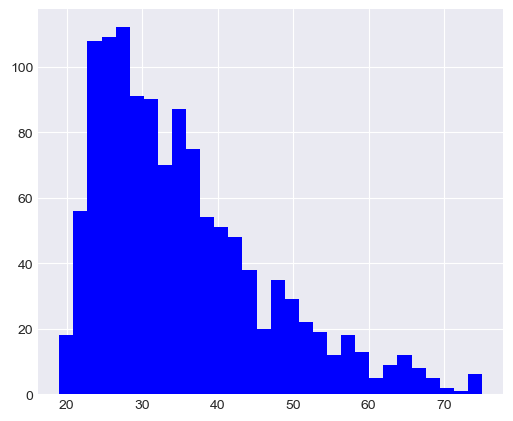

In [4062]:
plt.figure(figsize=(6,5))
plt.hist(df["age"], bins=30, color="blue")
plt.show()

### Transformacion duration

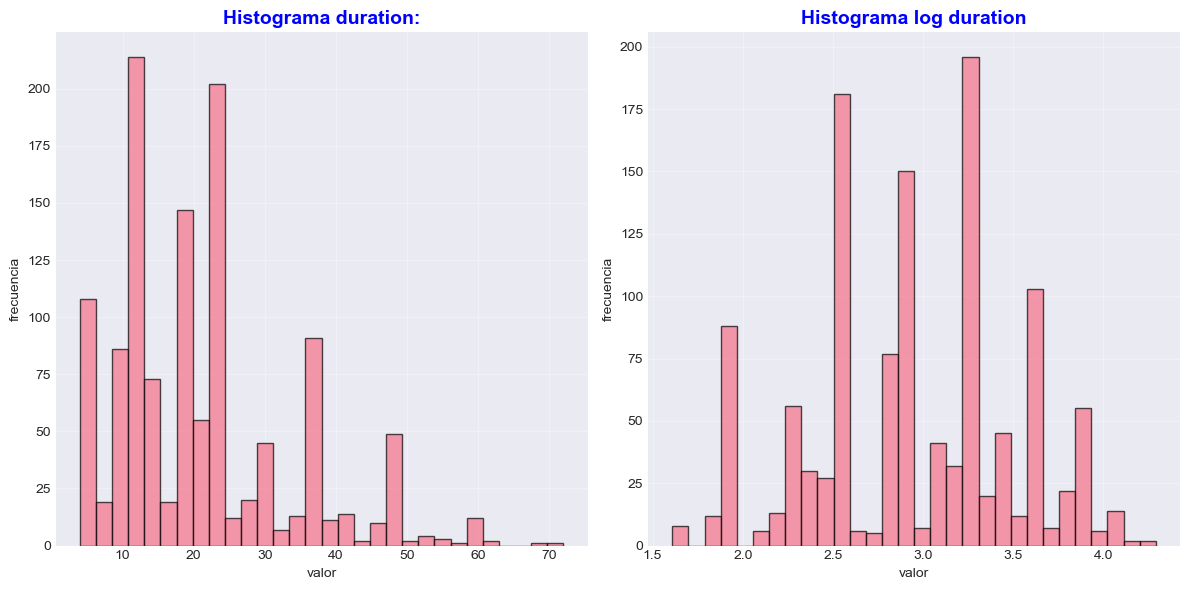

In [4063]:
#Ahora si aplicamos la transformación
df_log=df.copy()
df_log["log_duration"]=np.log1p(df_log["duration"])

fig, axes=plt.subplots(1,2, figsize=(12,6))

axes[0].hist(df["duration"], bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Histograma duration:", fontsize=14, fontweight="bold", color="Blue")
axes[0].set_ylabel("frecuencia")
axes[0].set_xlabel("valor")
axes[0].grid(alpha=0.3)

axes[1].hist(df_log["log_duration"], bins=30, edgecolor="black", alpha=0.7)
axes[1].set_title("Histograma log duration", fontsize=14, fontweight="bold", color="Blue")
axes[1].set_ylabel("frecuencia")
axes[1].set_xlabel(f"valor")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [4064]:
print(f"Valor de skew original de duration: {df["duration"].skew():.2f}")
print(f"Valor de skew logaritmico de duration: {df_log["log_duration"].skew():.2f}")
print("Hemos reducido la asimetría por medio de la transf. logaritmica acercando la distribucion de duration a una distribución normal")

Valor de skew original de duration: 1.07
Valor de skew logaritmico de duration: -0.11
Hemos reducido la asimetría por medio de la transf. logaritmica acercando la distribucion de duration a una distribución normal


##  Transformación variables numericas


### Transformacion Credit_Amount


presenta asimetría positiva fuerte por lo que antes de hacer un tratamiento de outliers generamos una transf. logaritmica

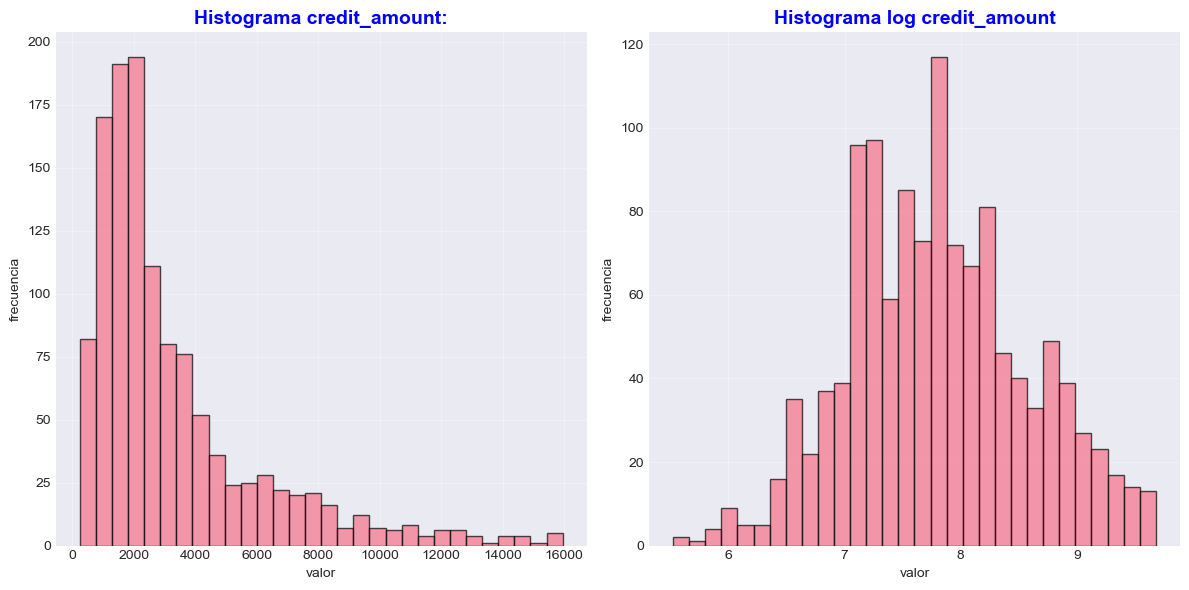

In [4065]:
#Ahora si aplicamos la transformación

df_log["log_credit_amount"]=np.log1p(df["credit_amount"])

fig, axes=plt.subplots(1,2, figsize=(12,6))

axes[0].hist(df["credit_amount"], bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Histograma credit_amount:", fontsize=14, fontweight="bold", color="Blue")
axes[0].set_ylabel("frecuencia")
axes[0].set_xlabel("valor")
axes[0].grid(alpha=0.3)

axes[1].hist(df_log["log_credit_amount"], bins=30, edgecolor="black", alpha=0.7)
axes[1].set_title("Histograma log credit_amount", fontsize=14, fontweight="bold", color="Blue")
axes[1].set_ylabel("frecuencia")
axes[1].set_xlabel(f"valor")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [4066]:
print(f"Valor de skew original de credit_amount: {df["credit_amount"].skew():.2f}")
print(f"Valor de skew logaritmico de credit_amount: {df_log["log_credit_amount"].skew():.2f}")
print("Hemos reducido la asimetría por medio de la transf. logaritmica acercando la distribucion de credit_amount a una distribución normal")

Valor de skew original de credit_amount: 1.90
Valor de skew logaritmico de credit_amount: 0.15
Hemos reducido la asimetría por medio de la transf. logaritmica acercando la distribucion de credit_amount a una distribución normal


### Transformacion Debt_to_income_ratio


In [4067]:
# Realizar transformacón 

df_log["dti_logit"] = np.log(
    df["debt_to_income_ratio"] /
    (1 - df["debt_to_income_ratio"])
)

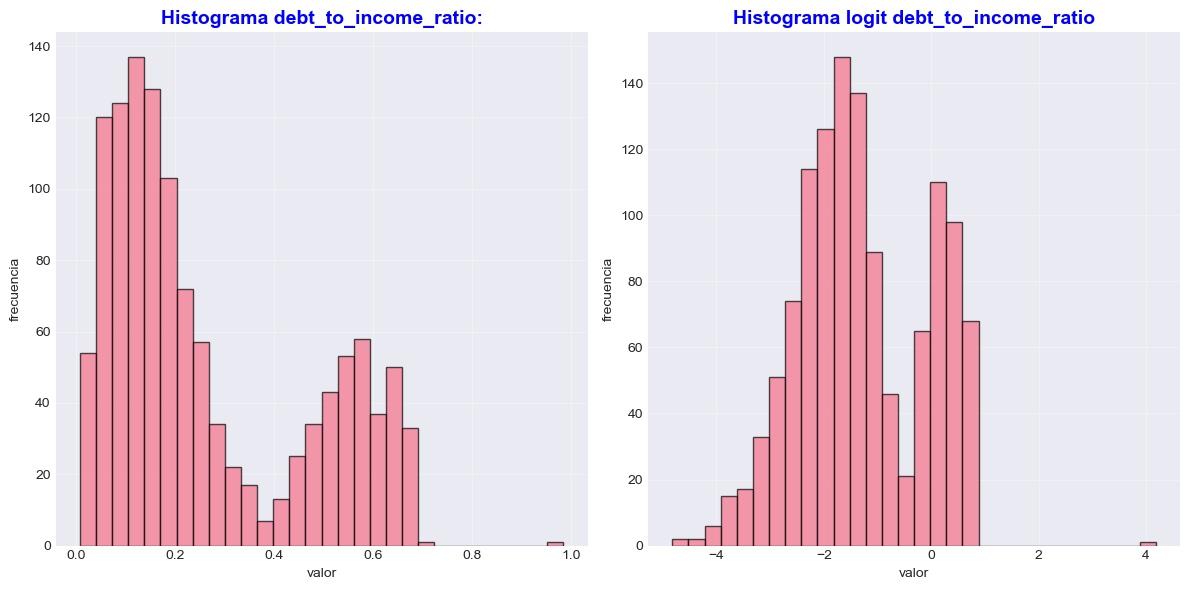

In [4068]:
#Visualizar efecto de transformación realizada 

fig, axes=plt.subplots(1,2, figsize=(12,6))

axes[0].hist(df["debt_to_income_ratio"], bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Histograma debt_to_income_ratio:", fontsize=14, fontweight="bold", color="Blue")
axes[0].set_ylabel("frecuencia")
axes[0].set_xlabel("valor")
axes[0].grid(alpha=0.3)

axes[1].hist(df_log["dti_logit"], bins=30, edgecolor="black", alpha=0.7)
axes[1].set_title("Histograma logit debt_to_income_ratio", fontsize=14, fontweight="bold", color="Blue")
axes[1].set_ylabel("frecuencia")
axes[1].set_xlabel(f"valor")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Como se puede ver la transfromacion logit no aporta valor tangible a la distribucion seguimos teniendo una bimodalidad (dos picos claros) solo hemos perdido interpretacion. Lo mejor sería mantener la variable en su escala original y no eliminar valores cercanos a los extremos.En este caso valores altos son señales de riesgo, no ruido. 

### Transformacion Monthly_income

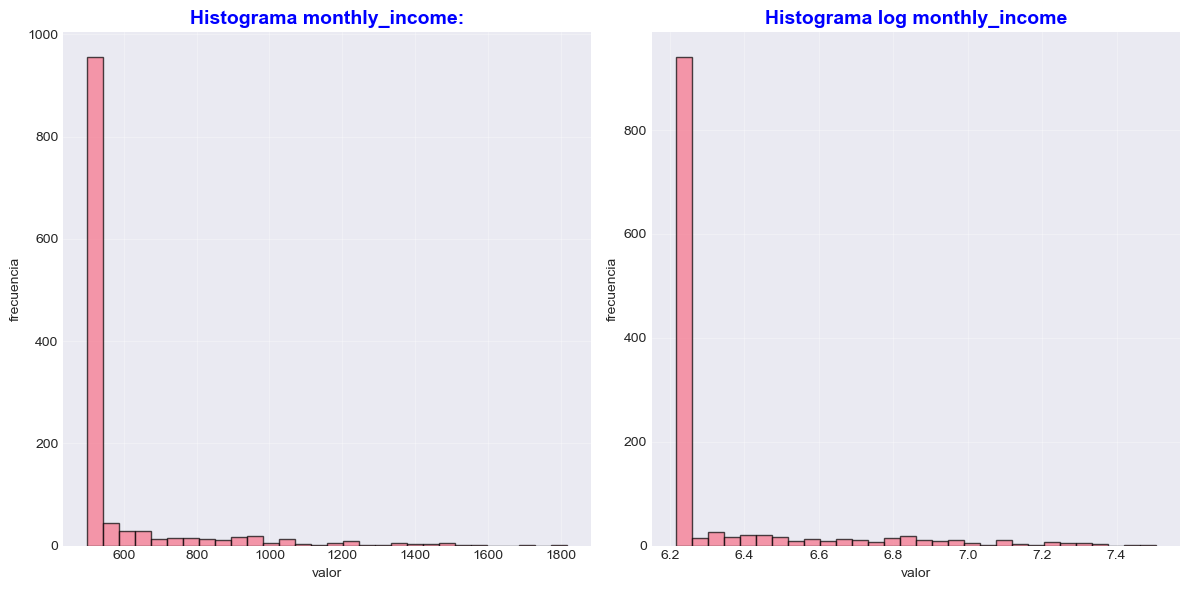

In [4069]:
#Trataremos el valor 500 como estado especial ya que la mayoria de los casos estan concentrados en ese valor y analizaremos la 
#distribucion del resto de los casos


df_log["log_monthly_income"]=np.log1p(df["monthly_income"])

fig, axes=plt.subplots(1,2, figsize=(12,6))

axes[0].hist(df["monthly_income"], bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Histograma monthly_income:", fontsize=14, fontweight="bold", color="Blue")
axes[0].set_ylabel("frecuencia")
axes[0].set_xlabel("valor")
axes[0].grid(alpha=0.3)

axes[1].hist(df_log["log_monthly_income"], bins=30, edgecolor="black", alpha=0.7)
axes[1].set_title("Histograma log monthly_income", fontsize=14, fontweight="bold", color="Blue")
axes[1].set_ylabel("frecuencia")
axes[1].set_xlabel(f"valor")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [4070]:
print(f"Valor de skew original de monthly_income: {df["monthly_income"].skew():.2f}")
print(f"Valor de skew logaritmico de credit_amount: {df_log["log_monthly_income"].skew():.2f}")
print("Hemos reducido la asimetría por medio de la transf. logaritmica acercando la distribucion de monthly_income a una distribución normal")

Valor de skew original de monthly_income: 3.11
Valor de skew logaritmico de credit_amount: 2.50
Hemos reducido la asimetría por medio de la transf. logaritmica acercando la distribucion de monthly_income a una distribución normal


In [4071]:
# #Separamos la cola positiva del valor 500 (cuando sea mayor a 500 =True):
# mask_tail = df["monthly_income"] > 500

# #Aplicar la transformación SOLO a la cola
# df["monthly_income_log"] = np.nan

# df.loc[mask_tail, "monthly_income_log"] = np.log1p(
#     df.loc[mask_tail, "monthly_income"]
# )

# #Visualizamos la distribucion de monthly income sin tomar en consideracion los valores donde es igual a 500

# # Cola: monthly_income > 500
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# axes[0].hist(df.loc[mask_tail, "monthly_income"],
#     bins=30,
#     edgecolor="black",
#     alpha=0.7
# )
# axes[0].set_title("Histograma monthly_income, valores ~500", fontsize=14, fontweight="bold", color="Blue")
# axes[0].set_ylabel("Frecuencia")
# axes[0].set_xlabel("Valor")
# axes[0].grid(alpha=0.3)

# # Log de la cola
# axes[1].hist(
#     df.loc[mask_tail, "monthly_income_log"],
#     bins=30,
#     edgecolor="black",
#     alpha=0.7
# )
# axes[1].set_title("Histograma log_monthly_income, valores ~500", fontsize=14, fontweight="bold", color="Blue")
# axes[1].set_ylabel("Frecuencia")
# axes[1].set_xlabel("Valor log")
# axes[1].grid(alpha=0.3)

# plt.show()


In [4072]:
# #Evaluamos el impacto de la transformacion en la asimetria de la distribucion 
# print(f"Valor de asimetría de la cola monthly_income  antes de la transf. {df.loc[mask_tail, "monthly_income"].skew():.2f}")
# print(f"Valor de asimetría de la cola monthly_income desp de la transf. {df.loc[mask_tail, "monthly_income_log"].skew():.2f}")

### Tratamiento credit_duration_ratio

In [4073]:
## credit_duration_ratio presenta una fuerte asimetria positiva por lo que procedemos con una transformación logaritmica 
df_log["log_credit_duration_ratio"]=np.log1p(df["credit_duration_ratio"])
df_log.head()

,status_account,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,monthly_income,credit_duration_ratio,age_employment_interaction,bmi,gender,log_duration,log_credit_amount,dti_logit,log_monthly_income,log_credit_duration_ratio
0,checking_below_0,6.0,critical_account,radio_television,1169.0,no_savings_account,employed_above_7yr,4.0,male_single,none,...,500.0,194.83,469.0,27.00000,Female,1.945910,7.064759,-2.389200,6.216606,5.277247
1,checking_0_to_200,48.0,existing_paid_duly,radio_television,5951.0,savings_below_100,employed_1_to_4yr,2.0,female_divorced_married,none,...,500.0,123.98,55.0,24.40000,Male,3.891820,8.691483,0.405465,6.216606,4.828154
2,no_checking_account,12.0,critical_account,education,2096.0,savings_below_100,employed_4_to_7yr,2.0,male_single,none,...,500.0,174.67,269.5,27.60000,Male,2.564949,7.648263,-2.208385,6.216606,5.168607
3,checking_below_0,42.0,existing_paid_duly,furniture_equipment,7882.0,savings_below_100,employed_4_to_7yr,2.0,male_single,guarantor,...,1050.0,187.67,247.5,25.17951,Female,3.761200,8.972464,-1.621486,6.957497,5.239999
4,checking_below_0,24.0,delay_in_past,car_new,4870.0,savings_below_100,employed_1_to_4yr,3.0,male_single,none,...,500.0,202.92,132.5,24.10000,Female,3.218876,8.491055,-0.148271,6.216606,5.317728


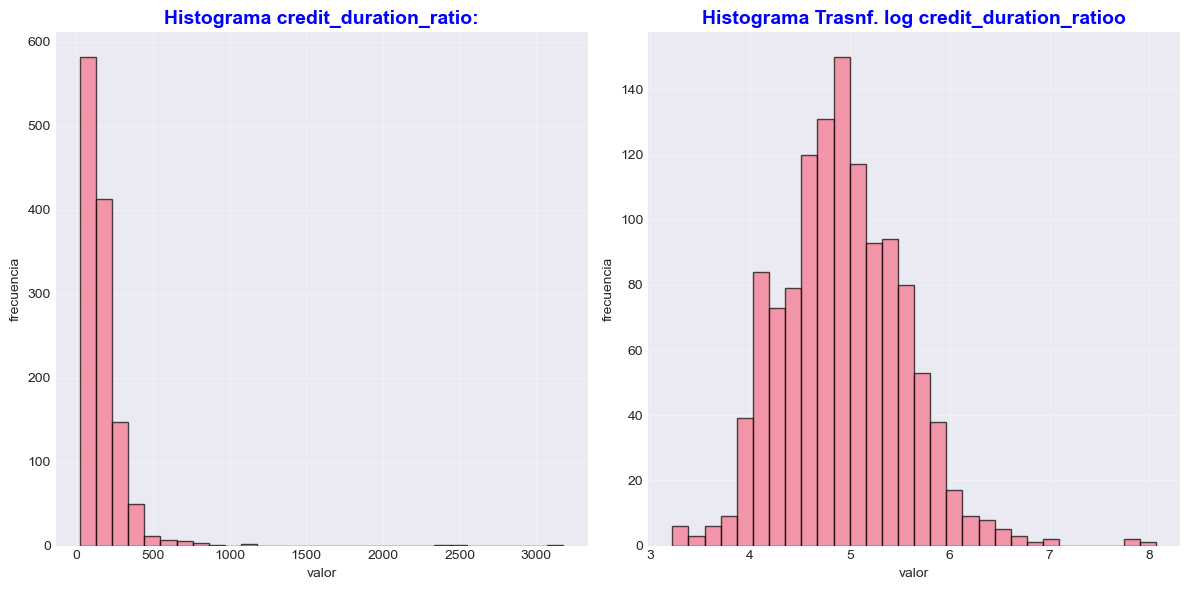

In [4074]:
#Procedemos a comparar visualmente la transf. log de credit_duration_ratio respecto a su valor original

fig, axes=plt.subplots(1,2, figsize=(12,6))

axes[0].hist(df["credit_duration_ratio"], bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Histograma credit_duration_ratio:", fontsize=14, fontweight="bold", color="Blue")
axes[0].set_ylabel("frecuencia")
axes[0].set_xlabel("valor")
axes[0].grid(alpha=0.3)

axes[1].hist(df_log["log_credit_duration_ratio"], bins=30, edgecolor="black", alpha=0.7)
axes[1].set_title("Histograma Trasnf. log credit_duration_ratioo", fontsize=14, fontweight="bold", color="Blue")
axes[1].set_ylabel("frecuencia")
axes[1].set_xlabel(f"valor")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [4075]:
print("conclusiones de transf. log para variable (credit_duration_ratio)")
print("=="*80)
print("La distribución después de la transf. log ha tomado una forma mas parecida a la distribución simétrica. Comprobamos ésta observación realizando una comparción del valor de skew antes y después de la transformación: ")
print(f"\nValor de skew original para credit_duration_ratio: {df["credit_duration_ratio"].skew():.2f}")
print(f"Valor de skew para Transf. Log de credit_duration_ratio: {df_log["log_credit_duration_ratio"].skew():.2f}")


conclusiones de transf. log para variable (credit_duration_ratio)
La distribución después de la transf. log ha tomado una forma mas parecida a la distribución simétrica. Comprobamos ésta observación realizando una comparción del valor de skew antes y después de la transformación: 

Valor de skew original para credit_duration_ratio: 9.23
Valor de skew para Transf. Log de credit_duration_ratio: 0.46


### Tratamiento age_employment_interaction

In [4076]:
## age_employment_interaction presenta una fuerte asimetria positiva y alta frecuencias en valores cercanos a 0 por lo que procedemos con una transformación por raiz cuadrada
df_log["sqrt_age_employment_interaction"]=np.sqrt(df["age_employment_interaction"])
df_log.head()

,status_account,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,credit_duration_ratio,age_employment_interaction,bmi,gender,log_duration,log_credit_amount,dti_logit,log_monthly_income,log_credit_duration_ratio,sqrt_age_employment_interaction
0,checking_below_0,6.0,critical_account,radio_television,1169.0,no_savings_account,employed_above_7yr,4.0,male_single,none,...,194.83,469.0,27.00000,Female,1.945910,7.064759,-2.389200,6.216606,5.277247,21.656408
1,checking_0_to_200,48.0,existing_paid_duly,radio_television,5951.0,savings_below_100,employed_1_to_4yr,2.0,female_divorced_married,none,...,123.98,55.0,24.40000,Male,3.891820,8.691483,0.405465,6.216606,4.828154,7.416198
2,no_checking_account,12.0,critical_account,education,2096.0,savings_below_100,employed_4_to_7yr,2.0,male_single,none,...,174.67,269.5,27.60000,Male,2.564949,7.648263,-2.208385,6.216606,5.168607,16.416455
3,checking_below_0,42.0,existing_paid_duly,furniture_equipment,7882.0,savings_below_100,employed_4_to_7yr,2.0,male_single,guarantor,...,187.67,247.5,25.17951,Female,3.761200,8.972464,-1.621486,6.957497,5.239999,15.732133
4,checking_below_0,24.0,delay_in_past,car_new,4870.0,savings_below_100,employed_1_to_4yr,3.0,male_single,none,...,202.92,132.5,24.10000,Female,3.218876,8.491055,-0.148271,6.216606,5.317728,11.510864


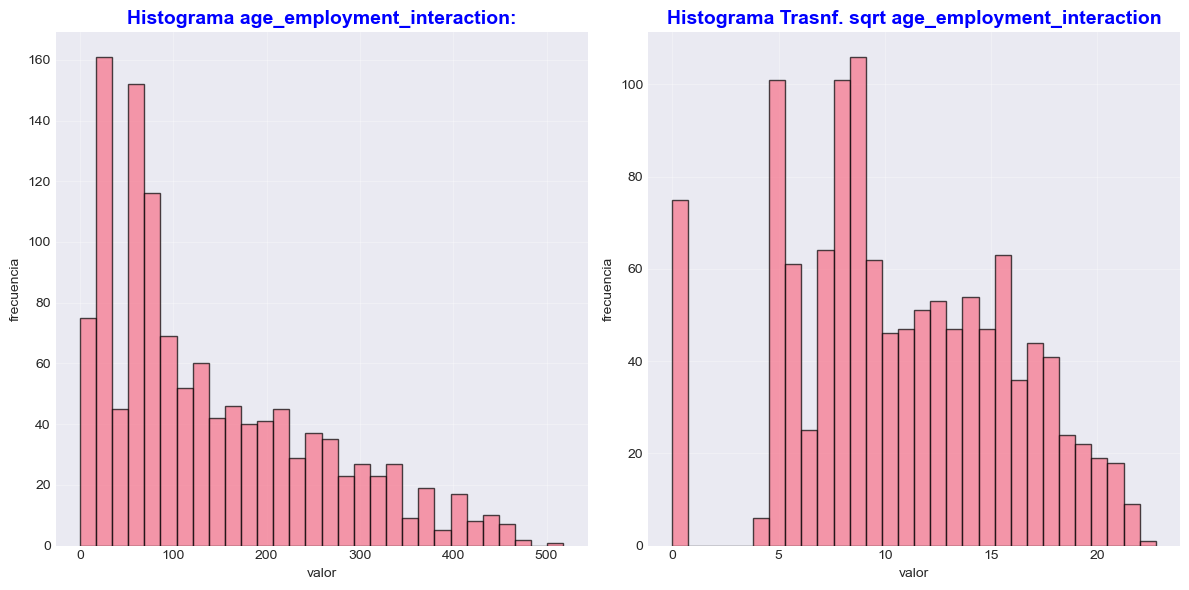

In [4077]:
#Procedemos a comparar visualmente la transf. log de credit_duration_ratio respecto a su valor original

fig, axes=plt.subplots(1,2, figsize=(12,6))

axes[0].hist(df["age_employment_interaction"], bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Histograma age_employment_interaction:", fontsize=14, fontweight="bold", color="Blue")
axes[0].set_ylabel("frecuencia")
axes[0].set_xlabel("valor")
axes[0].grid(alpha=0.3)

axes[1].hist(df_log["sqrt_age_employment_interaction"], bins=30, edgecolor="black", alpha=0.7)
axes[1].set_title("Histograma Trasnf. sqrt age_employment_interaction", fontsize=14, fontweight="bold", color="Blue")
axes[1].set_ylabel("frecuencia")
axes[1].set_xlabel(f"valor")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [4078]:
print("conclusiones de transf. sqrt para variable (age_employment_interaction)")
print("=="*80)
print("La distribución después de la transf. sqrt ha tomado una forma mas parecida a la distribución simétrica. Comprobamos ésta observación realizando una comparción del valor de skew antes y después de la transformación: ")
print(f"\nValor de skew original para age_employment_interaction: {df["age_employment_interaction"].skew():.2f}")
print(f"Valor de skew para Transf. sqrt de age_employment_interaction: {df_log["sqrt_age_employment_interaction"].skew():.2f}")


conclusiones de transf. sqrt para variable (age_employment_interaction)
La distribución después de la transf. sqrt ha tomado una forma mas parecida a la distribución simétrica. Comprobamos ésta observación realizando una comparción del valor de skew antes y después de la transformación: 

Valor de skew original para age_employment_interaction: 0.90
Valor de skew para Transf. sqrt de age_employment_interaction: -0.02


### Tratamiento bmi

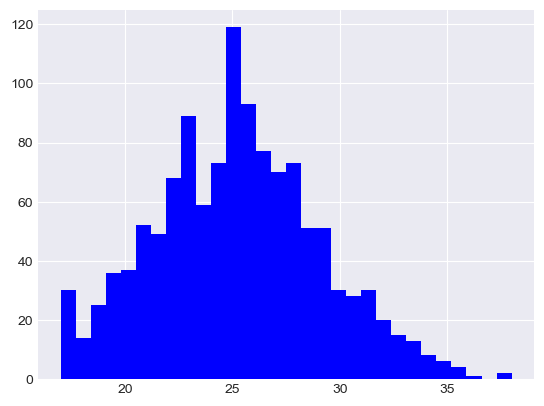

In [4079]:
plt.hist(df["bmi"], bins=30, color="blue")
plt.show()

In [4080]:
print(f"bmi presenta una distribucion normal con un valor de skew igual a: {df["bmi"].skew():.2f} por lo que no aplicamos ninguna transf.")

bmi presenta una distribucion normal con un valor de skew igual a: 0.18 por lo que no aplicamos ninguna transf.


In [4081]:
df=df_log.copy()

### Tratansformacion age

In [4082]:
#Una vez eliminados los valores fuera del rango (Rango: 19 a 75 años) no vale la pena aplicar un winsorizado ya que los extremos son valores reales y relevantes.
df["age"].describe()

count    1223.000000
mean       35.322159
std        11.189378
min        19.000000
25%        27.000000
50%        33.000000
75%        41.000000
max        75.000000
Name: age, dtype: float64

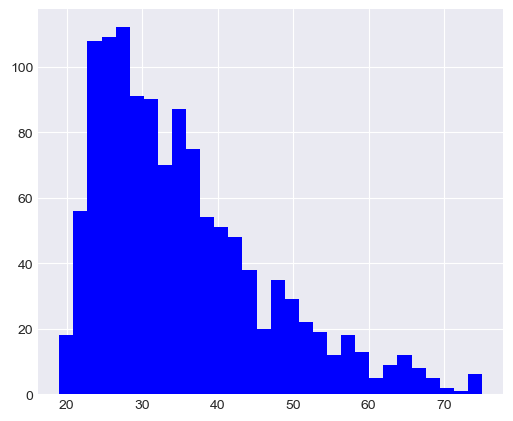

In [4083]:
plt.figure(figsize=(6,5))
plt.hist(df["age"], bins=30, color="blue")
plt.show()

Equal Width Binning aplicado a age

Distribución por bins:
age_bin_width
Muy Joven    494
Joven        427
Adulto       192
Maduro        76
Senior        34
Name: count, dtype: int64


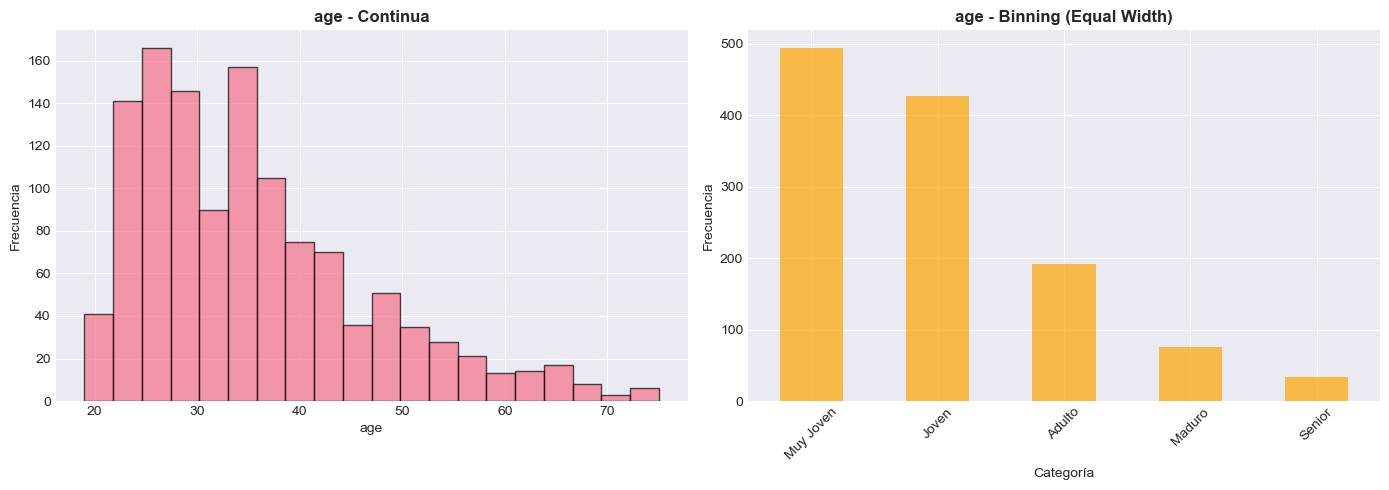

In [4084]:
# Procedemos Haciendo mejor una transformacion grupal para edad 5 grupos de edad

# Binning: convertir variable continua en categórica
# Equal width: intervalos de mismo tamaño
df_binned = df.copy()
df_binned['age_bin_width'] = pd.cut(df['age'], bins=5, labels=['Muy Joven', 'Joven', 'Adulto', 'Maduro', 'Senior'])

print('Equal Width Binning aplicado a age')
print('\nDistribución por bins:')
print(df_binned['age_bin_width'].value_counts().sort_index())

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['age'], bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title('age - Continua', fontweight='bold')
axes[0].set_xlabel('age')
axes[0].set_ylabel('Frecuencia')

df_binned['age_bin_width'].value_counts().sort_index().plot(kind='bar', ax=axes[1], alpha=0.7, color='orange')
axes[1].set_title('age - Binning (Equal Width)', fontweight='bold')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [4085]:
df=df_binned.copy()

In [4086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, 0 to 1249
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   status_account                   1223 non-null   object  
 1   duration                         1223 non-null   float64 
 2   credit_history                   1223 non-null   object  
 3   purpose                          1223 non-null   object  
 4   credit_amount                    1223 non-null   float64 
 5   savings                          1223 non-null   object  
 6   employment_since                 1223 non-null   object  
 7   installment_rate                 1223 non-null   float64 
 8   personal_status                  1223 non-null   object  
 9   other_debtors                    1223 non-null   object  
 10  residence_since                  1223 non-null   int64   
 11  property                         1223 non-null   object  
 12  age        

## Evaluacion variables discretas Feature engineering

In [4087]:
#Ahora evaluo si hay algun tratamiento que hacer para variables númericas discretas:
print(discretas)

['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']


## installment_rate

In [4088]:
df["installment_rate"].describe()

count    1223.000000
mean        2.998913
std         1.295827
min        -1.710000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.660000
Name: installment_rate, dtype: float64

In [4089]:
df["installment_rate"].value_counts()

installment_rate
 4.00     551
 2.00     280
 3.00     221
 1.00     160
 7.29       2
 3.03       1
 16.66      1
 0.85       1
-1.71       1
 7.82       1
 12.82      1
 12.42      1
 0.44       1
 13.76      1
Name: count, dtype: int64

In [4090]:
#Hay variables en installment_rate fuera del rango permitido, Rango: 1 a 4. Procedemos a eliminarlas
#Antes de realizar transformacion eliminamos valores fueras del rango permitido
mask_invalid_installment_rate=((df["installment_rate"] < 1) | (df["installment_rate"] > 4) | (df["installment_rate"]==3.03))
Qty_valores_incorrectos_installment_rate=mask_invalid_installment_rate.sum()
print(f"Cantidad de valores en installment_rate fuera del Rango (1 a 4) :{Qty_valores_incorrectos_installment_rate}")

Cantidad de valores en installment_rate fuera del Rango (1 a 4) :11


In [4091]:
#Eliminamos esos valores fuera del rango:
df=df.loc[~mask_invalid_installment_rate].copy()
print(f"En total hemos eliminado {Qty_valores_incorrectos_installment_rate} valores que no eran Outliers. Son errores de data por estar fuera del rango establecido")
print(f"Cantidad de valores despues de eliminación en dataframe df: {len(df)}")

En total hemos eliminado 11 valores que no eran Outliers. Son errores de data por estar fuera del rango establecido
Cantidad de valores despues de eliminación en dataframe df: 1212


In [4092]:
df["installment_rate"].value_counts()


installment_rate
4.0    551
2.0    280
3.0    221
1.0    160
Name: count, dtype: int64

## num_previous_loans

#Evaluamos si hay variables fuera del rango permitido Rango 0 a 10:


In [4093]:
df["num_previous_loans"].describe()

count    1212.000000
mean        2.510726
std         1.687096
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: num_previous_loans, dtype: float64

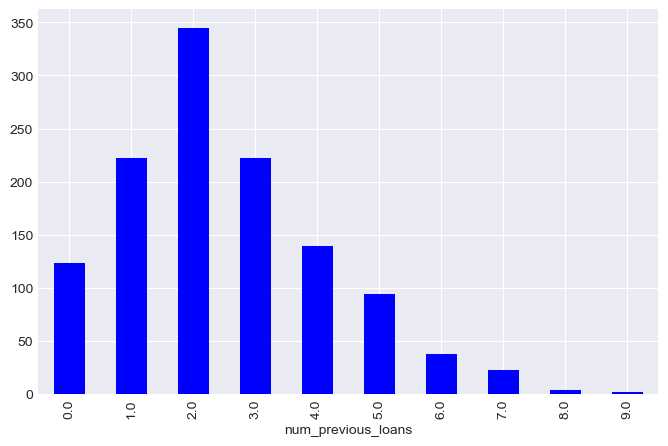

In [4094]:
df["num_previous_loans"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(8,5),
    color="blue"
)
plt.show()

## residence_since


In [4095]:
#Evaluamos que todos los valores esten en el rango permitido
df["residence_since"].describe()

count    1212.000000
mean        2.836634
std         1.102378
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: residence_since, dtype: float64

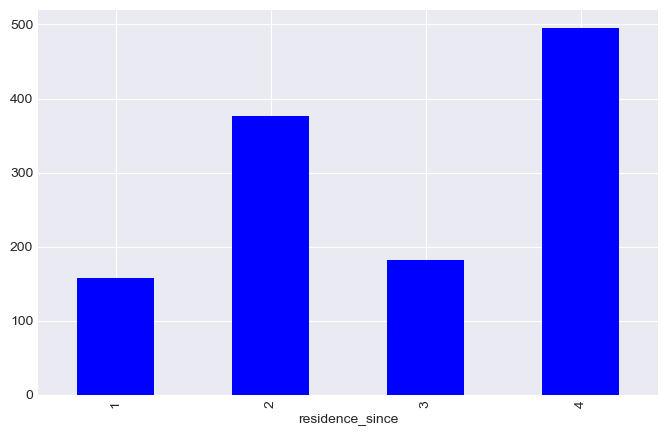

In [4096]:
df["residence_since"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(8,5),
    color="blue"
)
plt.show()

Como se puede ver todos los valores estan en el rango permitido

## num_credits


In [4097]:
df["num_credits"].describe()

count    1212.000000
mean        1.403465
std         0.571629
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: num_credits, dtype: float64

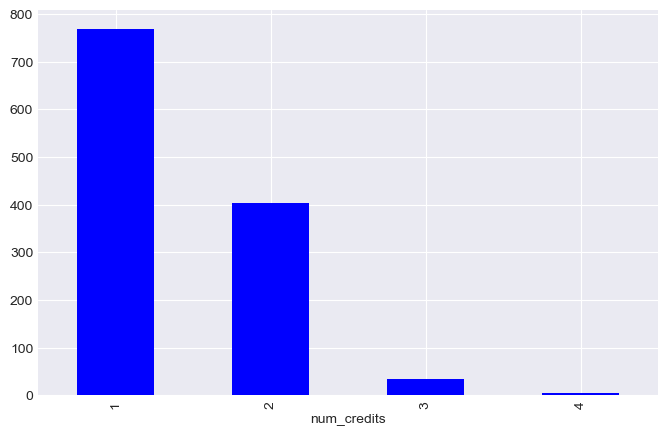

In [4098]:
df["num_credits"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(8,5),
    color="blue"
)
plt.show()

Todos los valores en el rango permitido

## num_liable

In [4099]:
df["num_liable"].describe()

count    1212.000000
mean        1.154290
std         0.361376
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: num_liable, dtype: float64

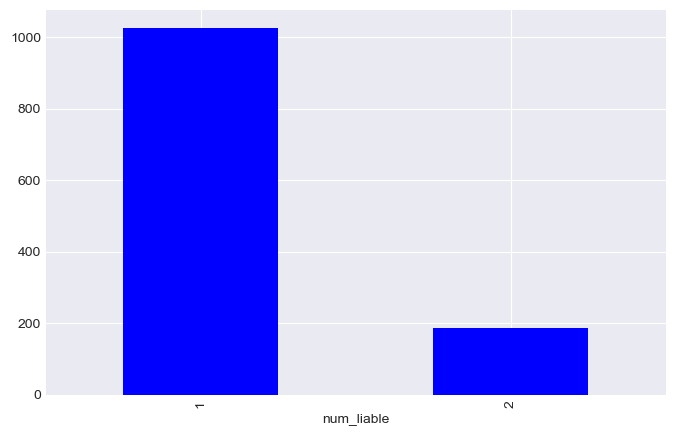

In [4100]:
df["num_liable"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(8,5),
    color="blue"
)
plt.show()

Todos los valores en el rango permitido

In [4101]:
#Tratamiento variables categoricas
print("\n" + "=" * 60)
print("VARIABLES CATEGORICAS")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"  - Numero de categorias unicas: {df[col].nunique()}")
    print(f"  - Missing values: {df[col].isna().sum()} ({df[col].isna().sum()/len(df)*100:.1f}%)")
    print(f"  - Distribucion:")
    print(df[col].value_counts())
    print(f"Cantidad de variables categoricas {len(categorical_cols)}")



VARIABLES CATEGORICAS

STATUS_ACCOUNT:
  - Numero de categorias unicas: 4
  - Missing values: 0 (0.0%)
  - Distribucion:
status_account
no_checking_account    478
checking_below_0       333
checking_0_to_200      326
checking_above_200      75
Name: count, dtype: int64
Cantidad de variables categoricas 16

CREDIT_HISTORY:
  - Numero de categorias unicas: 5
  - Missing values: 0 (0.0%)
  - Distribucion:
credit_history
existing_paid_duly     646
critical_account       358
delay_in_past          107
all_paid_this_bank      56
no_credits_all_paid     45
Name: count, dtype: int64
Cantidad de variables categoricas 16

PURPOSE:
  - Numero de categorias unicas: 10
  - Missing values: 0 (0.0%)
  - Distribucion:
purpose
radio_television       336
car_new                298
furniture_equipment    215
car_used               124
business               117
education               58
repairs                 27
others                  15
domestic_appliances     13
retraining               9
Name: cou

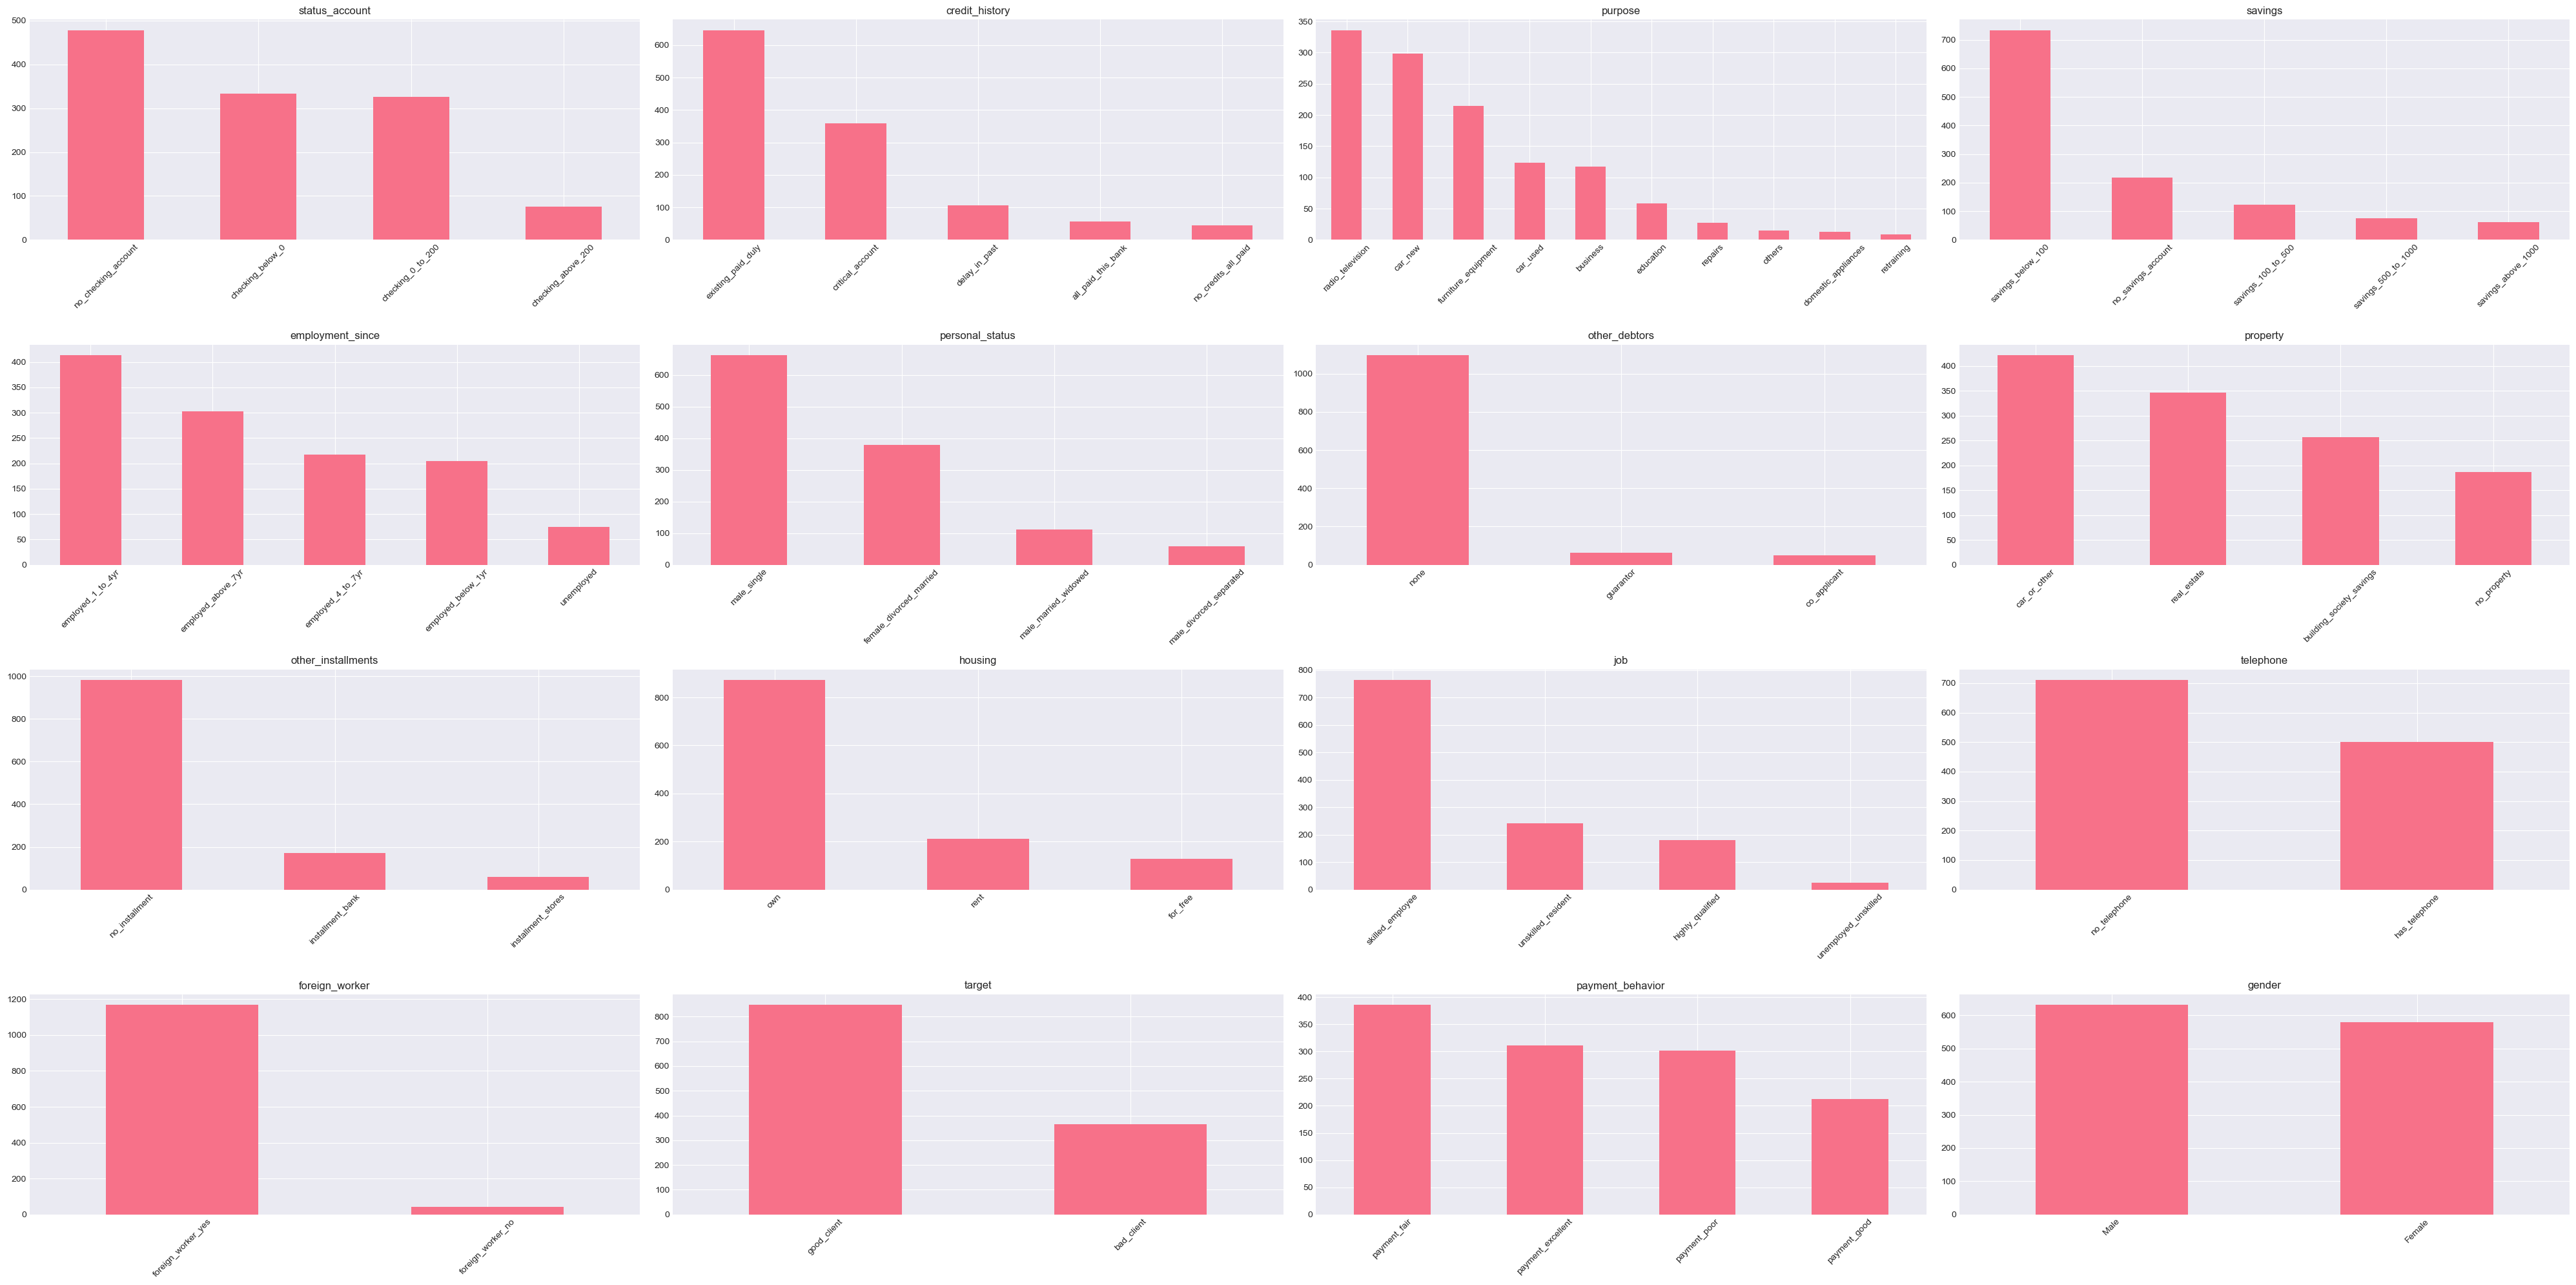

In [4102]:
# Visualización de variables categóricas
fig, axes = plt.subplots(4, 4, figsize=(40, 20))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < 16:
        data = df[col].value_counts()
        if len(data) > 10:  # Si hay muchas categorías, mostrar solo top 10
            data = data.head(10)
            axes[idx].set_title(f'{col} (Top 10)')
        else:
            axes[idx].set_title(col)

        data.plot(kind='bar', ax=axes[idx])
        axes[idx].set_xlabel('')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [4103]:

# 1) Un solo dataframe de trabajo
df_model = df.copy()

# 2) Binary encoding (columnas con 2 categorías)
binary_mappings = {
    "gender": {"Male": 1, "Female": 0},
    "telephone": {"has_telephone": 1, "no_telephone": 0},
    "foreign_worker": {"foreign_worker_yes": 1, "foreign_worker_no": 0},
    "target": {"good_client": 1, "bad_client": 0},
}

for col, mapping in binary_mappings.items():
    df_model[col] = df_model[col].map(mapping)



# 3) One-hot encoding (nominales)
nominal_cols = [
    "status_account",
    "credit_history", "personal_status",
    "other_debtors", "property", "other_installments", "housing"
]

df_model = pd.get_dummies(df_model, columns=nominal_cols, drop_first=True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, 0 to 1249
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   duration                                 1212 non-null   float64 
 1   purpose                                  1212 non-null   object  
 2   credit_amount                            1212 non-null   float64 
 3   savings                                  1212 non-null   object  
 4   employment_since                         1212 non-null   object  
 5   installment_rate                         1212 non-null   float64 
 6   residence_since                          1212 non-null   int64   
 7   age                                      1212 non-null   float64 
 8   num_credits                              1212 non-null   int64   
 9   job                                      1212 non-null   object  
 10  num_liable                               

In [4104]:
#Todavia tenemos que realizar la transformacion de 5 variables categoricas. Estas son variables categoricas
#ordinales por lo que procedemos a utilizar un definir un orden concreto para cada una
# Iniciamos con status account 


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# Aplicar Ordinal Encoding a variables con orden natural
df_ordinal = df_model.copy()

# Definir el orden de las categorías
savings_orden = ['no_savings_account', 'savings_below_100', 'savings_100_to_500', 'savings_500_to_1000', 'savings_above_1000']


# Crear el encoder
ordinal_encoder = OrdinalEncoder(categories=[savings_orden])

# Transformar
df_ordinal['savings_orden_encoded'] = ordinal_encoder.fit_transform(df_ordinal[['savings']])

# Mostrar mapeo
print("ORDINAL ENCODING - Variable: educacion")
print("=" * 50)
print("\nMapeo con orden respetado:")
for i, categoria in enumerate(savings_orden):
    print(f"  {i} <- {categoria:15s} (nivel {i})")

print("\nEjemplo de transformacion:")
print(df_ordinal[['savings', 'savings_orden_encoded']].head(10))


ORDINAL ENCODING - Variable: educacion

Mapeo con orden respetado:
  0 <- no_savings_account (nivel 0)
  1 <- savings_below_100 (nivel 1)
  2 <- savings_100_to_500 (nivel 2)
  3 <- savings_500_to_1000 (nivel 3)
  4 <- savings_above_1000 (nivel 4)

Ejemplo de transformacion:
               savings  savings_orden_encoded
0   no_savings_account                    0.0
1    savings_below_100                    1.0
2    savings_below_100                    1.0
3    savings_below_100                    1.0
4    savings_below_100                    1.0
5   no_savings_account                    0.0
6  savings_500_to_1000                    3.0
7    savings_below_100                    1.0
8   savings_above_1000                    4.0
9    savings_below_100                    1.0


In [4105]:
#Ahora transformamos "Employment_since"


# Definir el orden de las categorías
employment_orden = ['unemployed', 'employed_below_1yr', 'employed_1_to_4yr', 'employed_4_to_7yr', 'employed_above_7yr']


# Crear el encoder
ordinal_encoder = OrdinalEncoder(categories=[employment_orden])

# Transformar
df_ordinal['employment_orden_encoded'] = ordinal_encoder.fit_transform(df_ordinal[['employment_since']])

# Mostrar mapeo
print("ORDINAL ENCODING - Variable: educacion")
print("=" * 50)
print("\nMapeo con orden respetado:")
for i, categoria in enumerate(employment_orden):
    print(f"  {i} <- {categoria:15s} (nivel {i})")

print("\nEjemplo de transformacion:")
print(df_ordinal[['employment_since', 'employment_orden_encoded']].head(10))

ORDINAL ENCODING - Variable: educacion

Mapeo con orden respetado:
  0 <- unemployed      (nivel 0)
  1 <- employed_below_1yr (nivel 1)
  2 <- employed_1_to_4yr (nivel 2)
  3 <- employed_4_to_7yr (nivel 3)
  4 <- employed_above_7yr (nivel 4)

Ejemplo de transformacion:
     employment_since  employment_orden_encoded
0  employed_above_7yr                       4.0
1   employed_1_to_4yr                       2.0
2   employed_4_to_7yr                       3.0
3   employed_4_to_7yr                       3.0
4   employed_1_to_4yr                       2.0
5   employed_1_to_4yr                       2.0
6  employed_above_7yr                       4.0
7   employed_1_to_4yr                       2.0
8   employed_4_to_7yr                       3.0
9          unemployed                       0.0


In [4106]:


# Definir el orden de las categorías
job_orden = ['unemployed_unskilled', 'unskilled_resident', 'skilled_employee', 'highly_qualified']


# Crear el encoder
ordinal_encoder = OrdinalEncoder(categories=[job_orden])

# Transformar
df_ordinal['job_orden_encoded'] = ordinal_encoder.fit_transform(df_ordinal[['job']])

# Mostrar mapeo
print("ORDINAL ENCODING - Variable: educacion")
print("=" * 50)
print("\nMapeo con orden respetado:")
for i, categoria in enumerate(job_orden):
    print(f"  {i} <- {categoria:15s} (nivel {i})")

print("\nEjemplo de transformacion:")
print(df_ordinal[['job', 'job_orden_encoded']].head(10))

ORDINAL ENCODING - Variable: educacion

Mapeo con orden respetado:
  0 <- unemployed_unskilled (nivel 0)
  1 <- unskilled_resident (nivel 1)
  2 <- skilled_employee (nivel 2)
  3 <- highly_qualified (nivel 3)

Ejemplo de transformacion:
                  job  job_orden_encoded
0    skilled_employee                2.0
1    skilled_employee                2.0
2  unskilled_resident                1.0
3    skilled_employee                2.0
4    skilled_employee                2.0
5  unskilled_resident                1.0
6    skilled_employee                2.0
7    highly_qualified                3.0
8  unskilled_resident                1.0
9    highly_qualified                3.0


In [4107]:


# Definir el orden de las categorías (de peor a mejor o viceversa, pero consistente)
payment_orden = [
    'payment_poor',
    'payment_fair',
    'payment_good',
    'payment_excellent'
]

# Crear el encoder
ordinal_encoder = OrdinalEncoder(categories=[payment_orden])

# Transformar
df_ordinal['payment_orden_encoded'] = ordinal_encoder.fit_transform(
    df_ordinal[['payment_behavior']]
)

# Mostrar mapeo
print("ORDINAL ENCODING - Variable: payment_behavior")
print("=" * 60)
print("\nMapeo con orden respetado:")
for i, categoria in enumerate(payment_orden):
    print(f"  {i} <- {categoria:20s} (nivel {i})")

print("\nEjemplo de transformación:")
print(df_ordinal[['payment_behavior', 'payment_orden_encoded']].head(10))

ORDINAL ENCODING - Variable: payment_behavior

Mapeo con orden respetado:
  0 <- payment_poor         (nivel 0)
  1 <- payment_fair         (nivel 1)
  2 <- payment_good         (nivel 2)
  3 <- payment_excellent    (nivel 3)

Ejemplo de transformación:
    payment_behavior  payment_orden_encoded
0  payment_excellent                    3.0
1       payment_fair                    1.0
2  payment_excellent                    3.0
3       payment_fair                    1.0
4  payment_excellent                    3.0
5  payment_excellent                    3.0
6       payment_fair                    1.0
7  payment_excellent                    3.0
8       payment_fair                    1.0
9       payment_fair                    1.0


In [4108]:

# Definir el orden de las categorías (de peor a mejor o viceversa, pero consistente)
age_orden= ["Muy Joven", "Joven", "Adulto", "Maduro", "Senior"]

# Crear el encoder
ordinal_encoder = OrdinalEncoder(categories=[age_orden])

# Transformar
df_ordinal['age_bin_width_orden_encoded'] = ordinal_encoder.fit_transform(
    df_ordinal[['age_bin_width']]
)

# Mostrar mapeo
print("ORDINAL ENCODING - Variable: age_bin_width")
print("=" * 60)
print("\nMapeo con orden respetado:")
for i, categoria in enumerate(age_orden):
    print(f"  {i} <- {categoria:20s} (nivel {i})")

print("\nEjemplo de transformación:")
print(df_ordinal[['age_bin_width', 'age_bin_width_orden_encoded']].head(10))



age_orden= ["Muy Joven", "Joven", "Adulto", "Maduro", "Senior"]

df_model["age_bin_width_orden_encoded"] = df_model["age_bin_width"].map({
    "Muy Joven": 0,
    "Joven": 1,
    "Adulto": 2,
    "Maduro": 3,
    "Senior": 4
})

ORDINAL ENCODING - Variable: age_bin_width

Mapeo con orden respetado:
  0 <- Muy Joven            (nivel 0)
  1 <- Joven                (nivel 1)
  2 <- Adulto               (nivel 2)
  3 <- Maduro               (nivel 3)
  4 <- Senior               (nivel 4)

Ejemplo de transformación:
  age_bin_width  age_bin_width_orden_encoded
0        Senior                          4.0
1     Muy Joven                          0.0
2        Adulto                          2.0
3        Adulto                          2.0
4        Maduro                          3.0
5         Joven                          1.0
6        Maduro                          3.0
7         Joven                          1.0
8        Maduro                          3.0
9     Muy Joven                          0.0


In [4109]:
### Aplicamos Target encoding a purpose por su alta cardinalidad

In [4110]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, 0 to 1249
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   duration                                 1212 non-null   float64 
 1   purpose                                  1212 non-null   object  
 2   credit_amount                            1212 non-null   float64 
 3   savings                                  1212 non-null   object  
 4   employment_since                         1212 non-null   object  
 5   installment_rate                         1212 non-null   float64 
 6   residence_since                          1212 non-null   int64   
 7   age                                      1212 non-null   float64 
 8   num_credits                              1212 non-null   int64   
 9   job                                      1212 non-null   object  
 10  num_liable                               

In [4111]:
from sklearn.model_selection import train_test_split

# Target Encoding para 'purpose' usando category_encoders
df_target = df_ordinal.copy()

# Dividir en train y test ANTES de hacer el encoding
X = df_target.drop('target', axis=1)
y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

train_idx = X_train.index
test_idx  = X_test.index

print("TARGET ENCODING - Variable: ciudad")
print("=" * 50)

# Calcular manualmente para entender el concepto
print("\nCalculo manual de Target Encoding:")
print("-" * 50)

train_data = pd.concat([X_train[['purpose']], y_train], axis=1)
target_means = train_data.groupby('purpose')['target'].agg(['mean', 'count'])
print("\nMedia del target por purpose (solo en training):")
print(target_means)

# Media global
global_mean = y_train.mean()
print(f"\nMedia global del target: {global_mean:.4f}")

print("\nInterpretacion:")
print("  - retraining  tiene la mayor tasa de targets positivos")
print("  - El encoding reemplazará 'retraining' con ~0.83")
print("  - car_new  tiene la menor tasa, se reemplazará con ~0.59")

TARGET ENCODING - Variable: ciudad

Calculo manual de Target Encoding:
--------------------------------------------------

Media del target por purpose (solo en training):
                         mean  count
purpose                             
business             0.670886     79
car_new              0.591928    223
car_used             0.867470     83
domestic_appliances  0.666667      9
education            0.619048     42
furniture_equipment  0.647059    153
others               0.666667      6
radio_television     0.802632    228
repairs              0.684211     19
retraining           0.833333      6

Media global del target: 0.6993

Interpretacion:
  - retraining  tiene la mayor tasa de targets positivos
  - El encoding reemplazará 'retraining' con ~0.83
  - car_new  tiene la menor tasa, se reemplazará con ~0.59


In [4112]:
# Instalar bibliotecas adicionales si es necesario
!pip install category_encoders -q

In [4113]:
X_train.head()

,duration,purpose,credit_amount,savings,employment_since,installment_rate,residence_since,age,num_credits,job,...,property_real_estate,other_installments_installment_stores,other_installments_no_installment,housing_own,housing_rent,savings_orden_encoded,employment_orden_encoded,job_orden_encoded,payment_orden_encoded,age_bin_width_orden_encoded
950,18.0,business,3590.0,savings_below_100,unemployed,3.0,3,40.0,3,unemployed_unskilled,...,False,False,True,True,False,1.0,0.0,0.0,1.0,1.0
1177,23.0,car_new,1339.0,no_savings_account,employed_4_to_7yr,4.0,2,37.0,2,unskilled_resident,...,True,False,False,True,False,0.0,3.0,1.0,0.0,1.0
868,36.0,business,7409.0,no_savings_account,employed_above_7yr,3.0,2,37.0,2,skilled_employee,...,False,False,True,True,False,0.0,4.0,2.0,3.0,1.0
1202,18.0,radio_television,3099.0,savings_above_1000,employed_below_1yr,4.0,2,28.0,1,skilled_employee,...,False,False,False,True,False,4.0,1.0,2.0,3.0,0.0
557,21.0,car_new,5003.0,no_savings_account,employed_1_to_4yr,1.0,4,29.0,2,skilled_employee,...,False,False,False,True,False,0.0,2.0,2.0,3.0,0.0


In [4114]:
# Category Encoders
import category_encoders as ce
# Aplicar Target Encoding usando category_encoders
target_encoder = ce.TargetEncoder(cols=['purpose'])

# Fit solo en training
target_encoder.fit(X_train[['purpose']], y_train)

# Transform en train y test
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded['purpose_target_enc'] = target_encoder.transform(X_train[['purpose']])
X_test_encoded['purpose_target_enc'] = target_encoder.transform(X_test[['purpose']])

print("\nRESULTADO DEL TARGET ENCODING:")
print("=" * 50)
print("\nTraining set:")
print(X_train_encoded[['purpose', 'purpose_target_enc']].head(10))

print("\nTest set:")
print(X_test_encoded[['purpose', 'purpose_target_enc']].head(10))

print("\nNOTA IMPORTANTE:")
print("  - El encoding se calculó SOLO con datos de training")
print("  - Se aplicó el mismo mapeo a test")
print("  - Esto evita data leakage")


RESULTADO DEL TARGET ENCODING:

Training set:
                  purpose  purpose_target_enc
950              business            0.670964
1177              car_new            0.591928
868              business            0.670964
1202     radio_television            0.802632
557               car_new            0.591928
1151     radio_television            0.802632
874   furniture_equipment            0.647059
1080              car_new            0.591928
199   furniture_equipment            0.647059
838              car_used            0.867162

Test set:
                  purpose  purpose_target_enc
159      radio_television            0.802632
394   furniture_equipment            0.647059
1001              car_new            0.591928
537   furniture_equipment            0.647059
145              business            0.670964
695              car_used            0.867162
78               car_used            0.867162
380   furniture_equipment            0.647059
131             educat

In [4115]:
X_train_encoded['purpose_target_enc'].value_counts()

purpose_target_enc
0.802632    228
0.591928    223
0.647059    153
0.867162     83
0.670964     79
0.627052     42
0.692128     19
0.691144      9
0.725808      6
0.692839      6
Name: count, dtype: int64

In [4116]:
X_full_encoded = pd.concat([X_train_encoded, X_test_encoded], axis=0).sort_index()
y_full = pd.concat([y_train, y_test], axis=0).sort_index()

df_full_encoded = pd.concat([X_full_encoded, y_full], axis=1)

In [4117]:
df_full_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, 0 to 1249
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   duration                                 1212 non-null   float64 
 1   purpose                                  1212 non-null   object  
 2   credit_amount                            1212 non-null   float64 
 3   savings                                  1212 non-null   object  
 4   employment_since                         1212 non-null   object  
 5   installment_rate                         1212 non-null   float64 
 6   residence_since                          1212 non-null   int64   
 7   age                                      1212 non-null   float64 
 8   num_credits                              1212 non-null   int64   
 9   job                                      1212 non-null   object  
 10  num_liable                               

In [4118]:
df_full_encoded.columns

Index(['duration', 'purpose', 'credit_amount', 'savings', 'employment_since',
       'installment_rate', 'residence_since', 'age', 'num_credits', 'job',
       'num_liable', 'telephone', 'foreign_worker', 'payment_behavior',
       'debt_to_income_ratio', 'num_previous_loans', 'monthly_income',
       'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'gender',
       'log_duration', 'log_credit_amount', 'dti_logit', 'log_monthly_income',
       'log_credit_duration_ratio', 'sqrt_age_employment_interaction',
       'age_bin_width', 'status_account_checking_above_200',
       'status_account_checking_below_0', 'status_account_no_checking_account',
       'credit_history_critical_account', 'credit_history_delay_in_past',
       'credit_history_existing_paid_duly',
       'credit_history_no_credits_all_paid',
       'personal_status_male_divorced_separated',
       'personal_status_male_married_widowed', 'personal_status_male_single',
       'other_debtors_guarantor', 'other_de

In [4119]:
continuas

['duration',
 'credit_amount',
 'debt_to_income_ratio',
 'monthly_income',
 'credit_duration_ratio',
 'age_employment_interaction',
 'bmi',
 'age']

In [4120]:
df_model_encoded=df_full_encoded[['log_duration', #Transformacion logaritmica de duration
                          'log_credit_amount', #Transformacion logaritmica 
                          'debt_to_income_ratio', 
                          'monthly_income', #
                          'credit_amount', #
                          'log_monthly_income', 
                          'log_credit_duration_ratio', 
                          'sqrt_age_employment_interaction',
                          'bmi', 
                          'age_bin_width_orden_encoded', 
                          'installment_rate', 
                          'num_previous_loans', 
                          'residence_since', 
                          'num_credits', 
                          'num_liable', 
                          'status_account_checking_above_200','status_account_checking_below_0', 'status_account_no_checking_account',
                          'credit_history_critical_account', 'credit_history_delay_in_past','credit_history_existing_paid_duly','credit_history_no_credits_all_paid', 
                          'purpose_target_enc',
                          'savings_orden_encoded',
                          'employment_orden_encoded',
                          'personal_status_male_divorced_separated','personal_status_male_married_widowed', 'personal_status_male_single',
                          'other_debtors_guarantor', 'other_debtors_none',
                          'property_car_or_other', 'property_no_property', 'property_real_estate',
                          'other_installments_installment_stores','other_installments_no_installment',
                          'housing_own', 'housing_rent',
                          'job_orden_encoded',
                          'telephone',
                          'foreign_worker',
                          'payment_orden_encoded',
                          'gender',
                          'target'
]]

In [4121]:
###Feature Interaccion
# Carga financiera por responsable, cuantas personas dependen del ingreso
df_model_encoded['income_per_liable'] = df_model_encoded['monthly_income'] / (df_model_encoded['num_liable'] + 1)


#Crédito “pesado” vs ingreso
#(No solo cuánto debe, sino qué tan pesado es el crédito)
df_model_encoded['credit_to_income'] = df_model_encoded['credit_amount'] / df_model_encoded['monthly_income']
df_model_encoded['credit_to_income_log'] = np.log1p(df_model_encoded['credit_to_income'])

#Estabilidad total (vida + trabajo)
df_model_encoded['overall_stability'] = (df_model_encoded['residence_since'] + df_model_encoded['employment_orden_encoded'])

#Presion financiera se puede consolidar en una columna
df_model_encoded['financial_pressure'] = (df_model_encoded['installment_rate'] * df_model_encoded['debt_to_income_ratio'])

# Indicadores de alto riesgo binario
df_model_encoded["high_risk_profile"]=((df_model_encoded['payment_orden_encoded']<= 1) & (df_model_encoded['installment_rate'] >= 3)).astype(int)

#Indicador de experiencia crediticia binario
df_model_encoded['credit_experience'] = (df_model_encoded['num_previous_loans'] >= 1).astype(int)

In [4122]:
df_model_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, 0 to 1249
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   log_duration                             1212 non-null   float64
 1   log_credit_amount                        1212 non-null   float64
 2   debt_to_income_ratio                     1212 non-null   float64
 3   monthly_income                           1212 non-null   float64
 4   credit_amount                            1212 non-null   float64
 5   log_monthly_income                       1212 non-null   float64
 6   log_credit_duration_ratio                1212 non-null   float64
 7   sqrt_age_employment_interaction          1212 non-null   float64
 8   bmi                                      1212 non-null   float64
 9   age_bin_width_orden_encoded              1212 non-null   float64
 10  installment_rate                         1212 non-nul

In [4123]:
# Preparacion de daos para seleccion 
df_model_encoded = df_model_encoded.drop(
    columns=['monthly_income', 'credit_amount']
)

print(f'Dataset después de encoding: {df_model_encoded}')
print(f'Total de features: {df_model_encoded.shape[1] - 1} (excluyendo target)')

# Separar features y target
X = df_model_encoded.drop('target', axis=1)
y = df_model_encoded['target']

print(f'\nX shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'\nDistribución de clases:')
print(y.value_counts())

Dataset después de encoding:       log_duration  log_credit_amount  debt_to_income_ratio  \
0         1.945910           7.064759                 0.084   
1         3.891820           8.691483                 0.600   
2         2.564949           7.648263                 0.099   
3         3.761200           8.972464                 0.165   
4         3.218876           8.491055                 0.463   
...            ...                ...                   ...   
1244      3.931826           9.297435                 0.323   
1245      3.583519           8.037543                 0.110   
1246      3.583519           9.020632                 0.567   
1248      2.564949           7.744137                 0.182   
1249      3.526361           7.750184                 0.650   

      log_monthly_income  log_credit_duration_ratio  \
0               6.216606                   5.277247   
1               6.216606                   4.828154   
2               6.216606                   5.1686

In [4124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, 0 to 1249
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   log_duration                             1212 non-null   float64
 1   log_credit_amount                        1212 non-null   float64
 2   debt_to_income_ratio                     1212 non-null   float64
 3   log_monthly_income                       1212 non-null   float64
 4   log_credit_duration_ratio                1212 non-null   float64
 5   sqrt_age_employment_interaction          1212 non-null   float64
 6   bmi                                      1212 non-null   float64
 7   age_bin_width_orden_encoded              1212 non-null   float64
 8   installment_rate                         1212 non-null   float64
 9   num_previous_loans                       1212 non-null   float64
 10  residence_since                          1212 non-nul

In [4125]:
##Separamos los datos de entrenamiento en datos Train split data con la misma separacion anteriormente realizada para el target encoding

In [4126]:
X_train = X.loc[train_idx]
X_test= X.loc[test_idx]

y_train= y.loc[train_idx]
y_test= y.loc[test_idx]

print(f'Train set: {X_train.shape}')
print(f'Test set: {X_test.shape}')
print(f'\nTarget en train: {y_train.mean()*100:.1f}%')
print(f'Target en test: {y_test.mean()*100:.1f}%')

Train set: (848, 47)
Test set: (364, 47)

Target en train: 69.9%
Target en test: 70.1%


In [4153]:
print(X_train.shape)
print(type(X_train))

(848, 47)
<class 'pandas.core.frame.DataFrame'>


In [4127]:

### 5.1 Baseline: Modelo con Todas las Features

In [4128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import (
    SelectKBest, f_classif, chi2, mutual_info_classif,
    RFE, SelectFromModel, VarianceThreshold
)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('Bibliotecas importadas correctamente')

Bibliotecas importadas correctamente


## 5. Métodos de Selección de Features



### 5.1 Baseline: Modelo con Todas las Features

In [4129]:
# Modelo baseline
model_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print('BASELINE: Modelo con todas las features')
print('='*60)
print(f'Número de features: {X_train.shape[1]}')
print(f'Accuracy: {accuracy_baseline:.4f}')
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred_baseline))

BASELINE: Modelo con todas las features
Número de features: 47
Accuracy: 0.9918

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       109
           1       0.99      1.00      0.99       255

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



### 5.2 Métodos de Filtrado (Filter Methods)

#### 5.2.1 Varianza

In [4130]:
# Eliminar features con varianza baja
selector_variance = VarianceThreshold(threshold=0.05)
X_train_var = selector_variance.fit_transform(X_train)
X_test_var = selector_variance.transform(X_test)

print('FILTER METHOD: Variance Threshold')
print('='*60)
print(f'Features originales: {X_train.shape[1]}')
print(f'Features después de filtrado: {X_train_var.shape[1]}')
print(f'Features eliminadas: {X_train.shape[1] - X_train_var.shape[1]}')

# Features eliminadas
removed_features = X_train.columns[~selector_variance.get_support()].tolist()
print(f'\nFeatures eliminadas por baja varianza:')
print(removed_features)

FILTER METHOD: Variance Threshold
Features originales: 47
Features después de filtrado: 40
Features eliminadas: 7

Features eliminadas por baja varianza:
['debt_to_income_ratio', 'credit_history_no_credits_all_paid', 'purpose_target_enc', 'personal_status_male_divorced_separated', 'other_debtors_guarantor', 'other_installments_installment_stores', 'foreign_worker']


#### 5.2.2 Univariate Feature Selection

In [4131]:
# SelectKBest con ANOVA F-test
k_best = 15
selector_kbest = SelectKBest(score_func=f_classif, k=k_best)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)

print('FILTER METHOD: SelectKBest (ANOVA F-test)')
print('='*60)
print(f'K (features seleccionadas): {k_best}')
print(f'Features originales: {X_train.shape[1]}')
print(f'Features seleccionadas: {X_train_kbest.shape[1]}')

# Obtener scores y features seleccionadas
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector_kbest.scores_
}).sort_values('Score', ascending=False)

print(f'\nTop {k_best} features por score F:')
print(feature_scores.head(k_best))

# Entrenar modelo
model_kbest = RandomForestClassifier(n_estimators=100, random_state=42)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
print(f'\nAccuracy con SelectKBest: {accuracy_kbest:.4f}')

FILTER METHOD: SelectKBest (ANOVA F-test)
K (features seleccionadas): 15
Features originales: 47
Features seleccionadas: 15

Top 15 features por score F:
                               Feature        Score
2                 debt_to_income_ratio  3494.721195
44                  financial_pressure  1318.326283
38               payment_orden_encoded   344.988587
9                   num_previous_loans   140.973083
45                   high_risk_profile   102.264175
15  status_account_no_checking_account    86.110072
14     status_account_checking_below_0    53.792846
46                   credit_experience    43.236718
20                  purpose_target_enc    40.518863
0                         log_duration    36.883482
16     credit_history_critical_account    30.106311
19  credit_history_no_credits_all_paid    14.841768
7          age_bin_width_orden_encoded    14.519777
33                         housing_own    13.818061
29                property_no_property    12.331527

Accuracy con 

#### 5.2.3 Mutual Information

In [4132]:
# SelectKBest con Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_mi = selector_mi.fit_transform(X_train, y_train)
X_test_mi = selector_mi.transform(X_test)

print('FILTER METHOD: Mutual Information')
print('='*60)
print(f'Features seleccionadas: {k_best}')

# Features seleccionadas
selected_features_mi = X_train.columns[selector_mi.get_support()].tolist()
print(f'\nFeatures seleccionadas:')
for i in selected_features_mi:
    print(i)

# Entrenar modelo
model_mi = RandomForestClassifier(n_estimators=100, random_state=42)
model_mi.fit(X_train_mi, y_train)
y_pred_mi = model_mi.predict(X_test_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)
print(f'\nAccuracy con Mutual Information: {accuracy_mi:.4f}')

FILTER METHOD: Mutual Information
Features seleccionadas: 15

Features seleccionadas:
debt_to_income_ratio
age_bin_width_orden_encoded
num_previous_loans
num_credits
num_liable
status_account_checking_below_0
status_account_no_checking_account
credit_history_critical_account
housing_own
payment_orden_encoded
credit_to_income
credit_to_income_log
financial_pressure
high_risk_profile
credit_experience

Accuracy con Mutual Information: 0.9918


### 5.3 Métodos Wrapper

#### 5.3.1 Recursive Feature Elimination (RFE)

In [4133]:
# RFE con Logistic Regression
n_features_rfe = 15
estimator = LogisticRegression(max_iter=1000, random_state=42)
selector_rfe = RFE(estimator, n_features_to_select=n_features_rfe, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)

print('WRAPPER METHOD: Recursive Feature Elimination (RFE)')
print('='*60)
print(f'Features seleccionadas: {n_features_rfe}')

# Features seleccionadas y sus rankings
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Selected': selector_rfe.support_,
    'Ranking': selector_rfe.ranking_
}).sort_values('Ranking')

print('\nFeatures seleccionadas (Ranking = 1):')
top_features = feature_ranking.loc[
    feature_ranking['Ranking'] == 1, 'Feature'
].tolist()

print(top_features)

# Entrenar modelo
model_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f'\nAccuracy con RFE: {accuracy_rfe:.4f}')

WRAPPER METHOD: Recursive Feature Elimination (RFE)
Features seleccionadas: 15

Features seleccionadas (Ranking = 1):
['personal_status_male_divorced_separated', 'other_installments_no_installment', 'purpose_target_enc', 'credit_history_delay_in_past', 'credit_history_critical_account', 'status_account_no_checking_account', 'status_account_checking_above_200', 'num_liable', 'num_credits', 'payment_orden_encoded', 'property_real_estate', 'installment_rate', 'financial_pressure', 'debt_to_income_ratio', 'gender']

Accuracy con RFE: 0.9890


### 5.4 Métodos Embedded



#### 5.4.1 Feature Importance (Tree-based)

EMBEDDED METHOD: Feature Importance (Random Forest)

Top 15 features más importantes:
                               Feature  Importance
2                 debt_to_income_ratio    0.380891
44                  financial_pressure    0.232606
38               payment_orden_encoded    0.093195
9                   num_previous_loans    0.034488
45                   high_risk_profile    0.022568
15  status_account_no_checking_account    0.020781
0                         log_duration    0.015586
1                    log_credit_amount    0.015197
4            log_credit_duration_ratio    0.014442
42                credit_to_income_log    0.014222
41                    credit_to_income    0.012689
5      sqrt_age_employment_interaction    0.011935
20                  purpose_target_enc    0.010857
6                                  bmi    0.010190
14     status_account_checking_below_0    0.009903


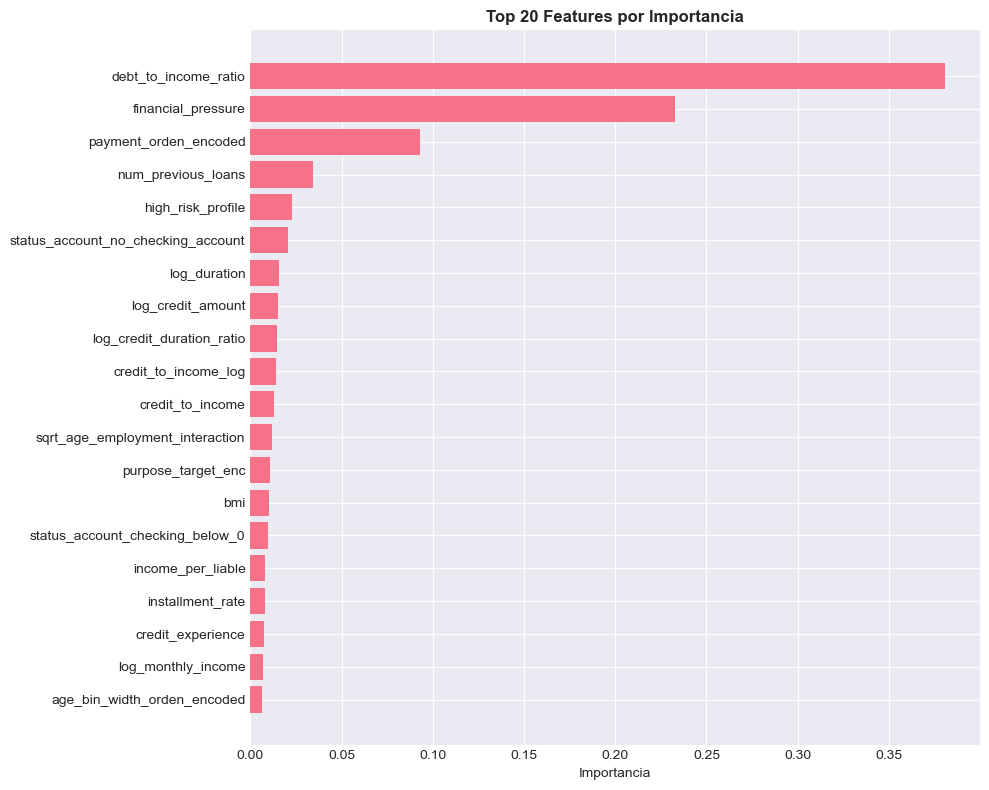

In [4134]:
# Feature importance de Random Forest
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X_train, y_train)

# Obtener importancias
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print('EMBEDDED METHOD: Feature Importance (Random Forest)')
print('='*60)
print('\nTop 15 features más importantes:')
print(importances.head(15))

# Visualización
plt.figure(figsize=(10, 8))
top_n = 20
plt.barh(range(top_n), importances['Importance'].head(top_n))
plt.yticks(range(top_n), importances['Feature'].head(top_n))
plt.xlabel('Importancia')
plt.title(f'Top {top_n} Features por Importancia', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### 5.4.2 SelectFromModel

In [4135]:
# SelectFromModel con Random Forest
selector_tree = SelectFromModel(rf_importance, threshold='median')
X_train_tree = selector_tree.fit_transform(X_train, y_train)
X_test_tree = selector_tree.transform(X_test)

print('EMBEDDED METHOD: SelectFromModel (threshold=median)')
print('='*60)
print(f'Features originales: {X_train.shape[1]}')
print(f'Features seleccionadas: {X_train_tree.shape[1]}')

# Features seleccionadas
selected_features_tree = X_train.columns[selector_tree.get_support()].tolist()
print(f'\nFeatures seleccionadas:')
for i in selected_features_tree:
    print(i)

# Entrenar modelo
model_tree = RandomForestClassifier(n_estimators=100, random_state=42)
model_tree.fit(X_train_tree, y_train)
y_pred_tree = model_tree.predict(X_test_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'\nAccuracy con SelectFromModel: {accuracy_tree:.4f}')

EMBEDDED METHOD: SelectFromModel (threshold=median)
Features originales: 47
Features seleccionadas: 24

Features seleccionadas:
log_duration
log_credit_amount
debt_to_income_ratio
log_monthly_income
log_credit_duration_ratio
sqrt_age_employment_interaction
bmi
age_bin_width_orden_encoded
installment_rate
num_previous_loans
status_account_checking_below_0
status_account_no_checking_account
credit_history_critical_account
purpose_target_enc
savings_orden_encoded
employment_orden_encoded
payment_orden_encoded
income_per_liable
credit_to_income
credit_to_income_log
overall_stability
financial_pressure
high_risk_profile
credit_experience

Accuracy con SelectFromModel: 0.9918


#### 5.4.3 L1 Regularization (Lasso)

In [4136]:
# Lasso para selección
# Estandarizar primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Features con coeficiente != 0
lasso_coefs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_
})
lasso_coefs['Abs_Coefficient'] = np.abs(lasso_coefs['Coefficient'])
lasso_coefs = lasso_coefs.sort_values('Abs_Coefficient', ascending=False)

print('EMBEDDED METHOD: Lasso (L1 Regularization)')
print('='*60)
print(f'Features con coef != 0: {(lasso.coef_ != 0).sum()}')
print(f'Features con coef == 0: {(lasso.coef_ == 0).sum()}')
print('\nTop features por coeficiente absoluto:')
print(lasso_coefs.head(15))

EMBEDDED METHOD: Lasso (L1 Regularization)
Features con coef != 0: 39
Features con coef == 0: 8

Top features por coeficiente absoluto:
                               Feature  Coefficient  Abs_Coefficient
2                 debt_to_income_ratio    -0.350948         0.350948
38               payment_orden_encoded     0.055680         0.055680
20                  purpose_target_enc     0.024495         0.024495
15  status_account_no_checking_account     0.024208         0.024208
9                   num_previous_loans     0.020544         0.020544
36                           telephone     0.017780         0.017780
46                   credit_experience     0.014829         0.014829
32   other_installments_no_installment     0.014390         0.014390
16     credit_history_critical_account     0.014389         0.014389
14     status_account_checking_below_0    -0.013823         0.013823
11                         num_credits    -0.013096         0.013096
35                   job_orden_encod

### 5.5 Reducción de Dimensionalidad: PCA

In [4137]:
# PCA
n_components = 15
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('DIMENSIONALITY REDUCTION: PCA')
print('='*60)
print(f'Componentes: {n_components}')
print(f'Varianza explicada por cada componente:')
for i, var in enumerate(pca.explained_variance_ratio_[:10]):
    print(f'  PC{i+1}: {var*100:.2f}%')
print(f'\nVarianza total explicada: {pca.explained_variance_ratio_.sum()*100:.2f}%')

# Entrenar modelo
model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'\nAccuracy con PCA: {accuracy_pca:.4f}')

DIMENSIONALITY REDUCTION: PCA
Componentes: 15
Varianza explicada por cada componente:
  PC1: 11.20%
  PC2: 8.26%
  PC3: 7.25%
  PC4: 5.02%
  PC5: 4.46%
  PC6: 3.98%
  PC7: 3.57%
  PC8: 3.41%
  PC9: 3.11%
  PC10: 3.01%

Varianza total explicada: 66.16%

Accuracy con PCA: 0.9313


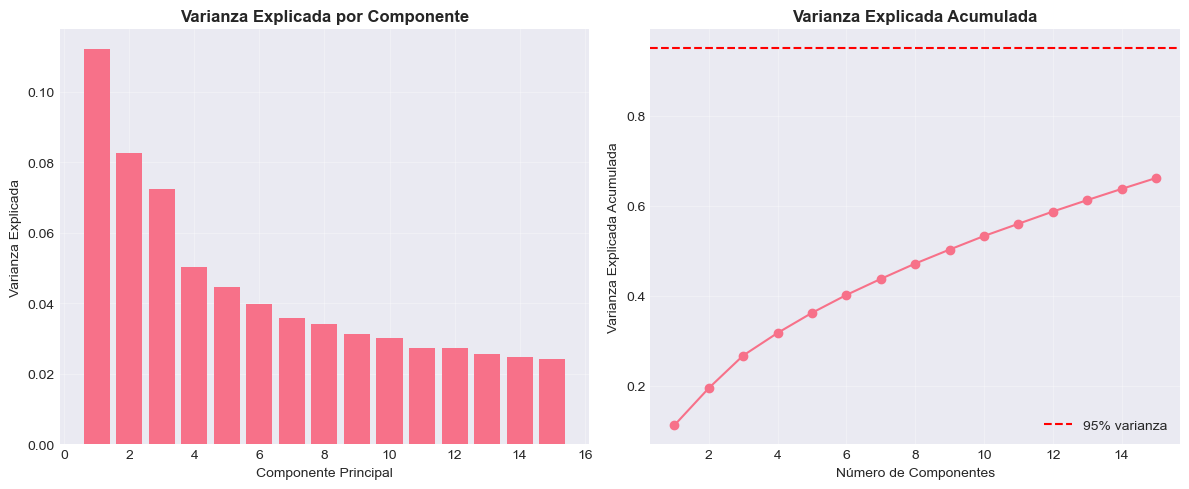

In [4138]:
# Visualización de varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente', fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada', fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.legend()

plt.tight_layout()
plt.show()

## 6. Comparación de Métodos de Selección

In [4139]:
# Resumen de resultados
resultados = pd.DataFrame({
    'Método': [
        'Baseline (Todas)',
        'SelectKBest (ANOVA)',
        'Mutual Information',
        'RFE',
        'Feature Importance',
        'PCA'
    ],
    'N_Features': [
        X_train.shape[1],
        X_train_kbest.shape[1],
        X_train_mi.shape[1],
        X_train_rfe.shape[1],
        X_train_tree.shape[1],
        X_train_pca.shape[1]
    ],
    'Accuracy': [
        accuracy_baseline,
        accuracy_kbest,
        accuracy_mi,
        accuracy_rfe,
        accuracy_tree,
        accuracy_pca
    ]
})

print('COMPARACIÓN DE MÉTODOS DE SELECCIÓN')
print('='*70)
print(resultados.to_string(index=False))
print('\nMejor método:')
best_idx = resultados['Accuracy'].idxmax()
print(f"{resultados.loc[best_idx, 'Método']} con accuracy de {resultados.loc[best_idx, 'Accuracy']:.4f}")

COMPARACIÓN DE MÉTODOS DE SELECCIÓN
             Método  N_Features  Accuracy
   Baseline (Todas)          47  0.991758
SelectKBest (ANOVA)          15  0.994505
 Mutual Information          15  0.991758
                RFE          15  0.989011
 Feature Importance          24  0.991758
                PCA          15  0.931319

Mejor método:
SelectKBest (ANOVA) con accuracy de 0.9945


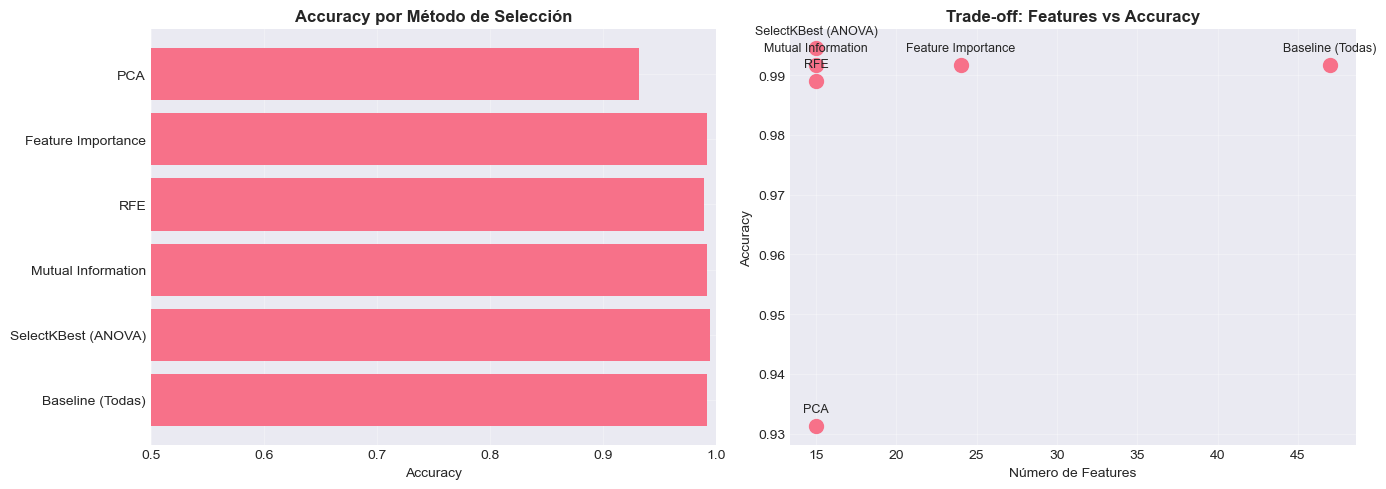

In [4140]:
# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy por método
axes[0].barh(resultados['Método'], resultados['Accuracy'])
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Accuracy por Método de Selección', fontweight='bold')
axes[0].set_xlim([0.5, 1.0])
axes[0].grid(alpha=0.3)

# Número de features vs Accuracy
axes[1].scatter(resultados['N_Features'], resultados['Accuracy'], s=100)
for idx, row in resultados.iterrows():
    axes[1].annotate(row['Método'],
                    (row['N_Features'], row['Accuracy']),
                    textcoords='offset points',
                    xytext=(0, 10),
                    ha='center',
                    fontsize=9)
axes[1].set_xlabel('Número de Features')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Trade-off: Features vs Accuracy', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Análisis de Features Seleccionadas

In [4141]:
# Comparar features seleccionadas por diferentes métodos
features_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'SelectKBest': selector_kbest.get_support(),
    'MutualInfo': selector_mi.get_support(),
    'RFE': selector_rfe.support_,
    'TreeBased': selector_tree.get_support()
})

# Contar en cuántos métodos aparece cada feature
features_comparison['Count'] = features_comparison[['SelectKBest', 'MutualInfo', 'RFE', 'TreeBased']].sum(axis=1)
features_comparison = features_comparison.sort_values('Count', ascending=False)

print('ANÁLISIS DE CONSISTENCIA DE FEATURES')
print('='*70)
print('\nFeatures seleccionadas por TODOS los métodos:')
all_methods = features_comparison[features_comparison['Count'] == 4]

for feat in all_methods['Feature']:
    print(feat)
print(f'\nTotal: {len(all_methods)} features')

print('\nFeatures seleccionadas por AL MENOS 3 métodos:')
most_methods = features_comparison[features_comparison['Count'] >= 3]
for feat in most_methods['Feature']:
    print(feat)
print(f'\nTotal: {len(most_methods)} features')

ANÁLISIS DE CONSISTENCIA DE FEATURES

Features seleccionadas por TODOS los métodos:
debt_to_income_ratio
financial_pressure
payment_orden_encoded
credit_history_critical_account
status_account_no_checking_account

Total: 5 features

Features seleccionadas por AL MENOS 3 métodos:
debt_to_income_ratio
financial_pressure
payment_orden_encoded
credit_history_critical_account
status_account_no_checking_account
credit_experience
status_account_checking_below_0
high_risk_profile
age_bin_width_orden_encoded
num_previous_loans
purpose_target_enc

Total: 11 features


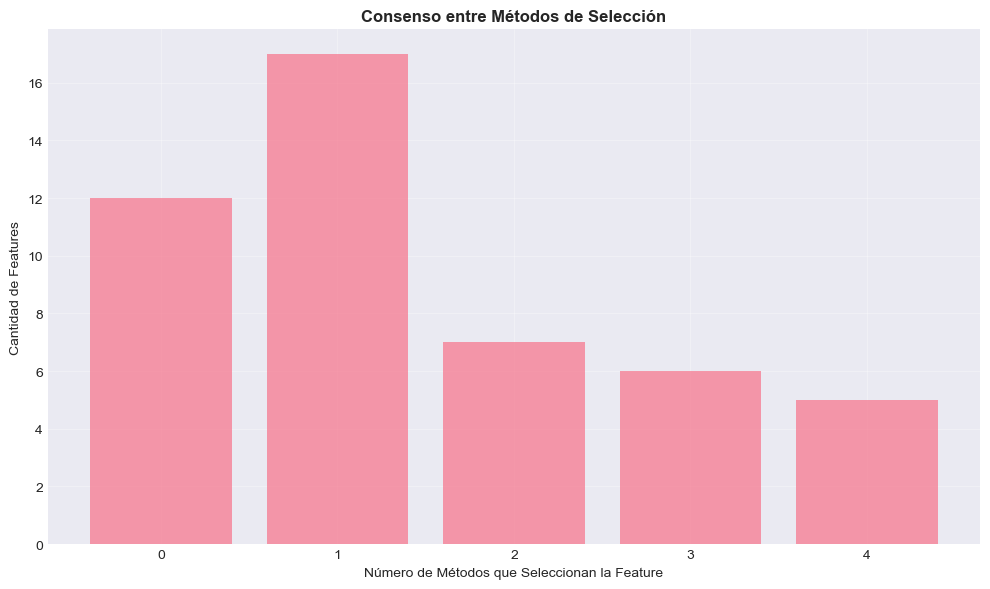

In [4142]:
# Visualización de consenso
plt.figure(figsize=(10, 6))
counts = features_comparison['Count'].value_counts().sort_index(ascending=False)
plt.bar(counts.index, counts.values, alpha=0.7)
plt.xlabel('Número de Métodos que Seleccionan la Feature')
plt.ylabel('Cantidad de Features')
plt.title('Consenso entre Métodos de Selección', fontweight='bold')
plt.xticks([0, 1, 2, 3, 4])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Nos quedamos con features seleccionadas por al menos 3 metodos (≥ 3)

In [4154]:
final_features = features_comparison.loc[
    features_comparison['Count'] >= 3, 'Feature'
].tolist()

In [4144]:
print(final_features)
print(f"Total features finales: {len(final_features)}")

['debt_to_income_ratio', 'financial_pressure', 'payment_orden_encoded', 'credit_history_critical_account', 'status_account_no_checking_account', 'credit_experience', 'status_account_checking_below_0', 'high_risk_profile', 'age_bin_width_orden_encoded', 'num_previous_loans', 'purpose_target_enc']
Total features finales: 11


In [4145]:
X_train_final = X_train[final_features]
X_test_final  = X_test[final_features]

In [4146]:
X_train_final


,debt_to_income_ratio,financial_pressure,payment_orden_encoded,credit_history_critical_account,status_account_no_checking_account,credit_experience,status_account_checking_below_0,high_risk_profile,age_bin_width_orden_encoded,num_previous_loans,purpose_target_enc
950,0.104,0.312,1.0,True,False,1,False,1,1.0,2.0,0.670964
1177,0.618,2.472,0.0,True,False,1,False,1,1.0,2.0,0.591928
868,0.124,0.372,3.0,False,True,1,False,0,1.0,4.0,0.670964
1202,0.296,1.184,3.0,False,False,1,True,0,0.0,7.0,0.802632
557,0.560,0.560,3.0,False,True,1,False,0,0.0,2.0,0.591928
...,...,...,...,...,...,...,...,...,...,...,...
81,0.182,0.728,1.0,False,True,1,False,1,1.0,4.0,0.802632
603,0.624,2.496,1.0,False,True,1,False,1,0.0,3.0,0.647059
1093,0.555,2.220,0.0,False,False,1,True,1,0.0,2.0,0.591928
251,0.061,0.061,3.0,False,False,1,False,0,2.0,5.0,0.647059


In [4147]:
#Definir pipeline para la validación cruzada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("scaler", StandardScaler()),          # se ajusta DENTRO de cada fold
    ("model", LogisticRegression(
        max_iter=1000,
        solver="liblinear"
    ))
])

In [4148]:
#Aplicar validación cruzada
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    pipe,
    X_train_final,
    y_train,
    cv=5,
    scoring="roc_auc"
)

In [4149]:
print(f"ROC-AUC CV promedio: {scores.mean():.3f}")
print(f"Desviación estándar: {scores.std():.3f}")

ROC-AUC CV promedio: 0.997
Desviación estándar: 0.003


In [4150]:
# Comparamos contra el modelo con todas las variables 

scores_full = cross_val_score(pipe, X_train, y_train, cv=5, scoring="roc_auc")

In [4151]:
print(f"ROC-AUC CV promedio: {scores_full.mean():.3f}")
print(f"Desviación estándar: {scores_full.std():.3f}")

ROC-AUC CV promedio: 0.995
Desviación estándar: 0.002
